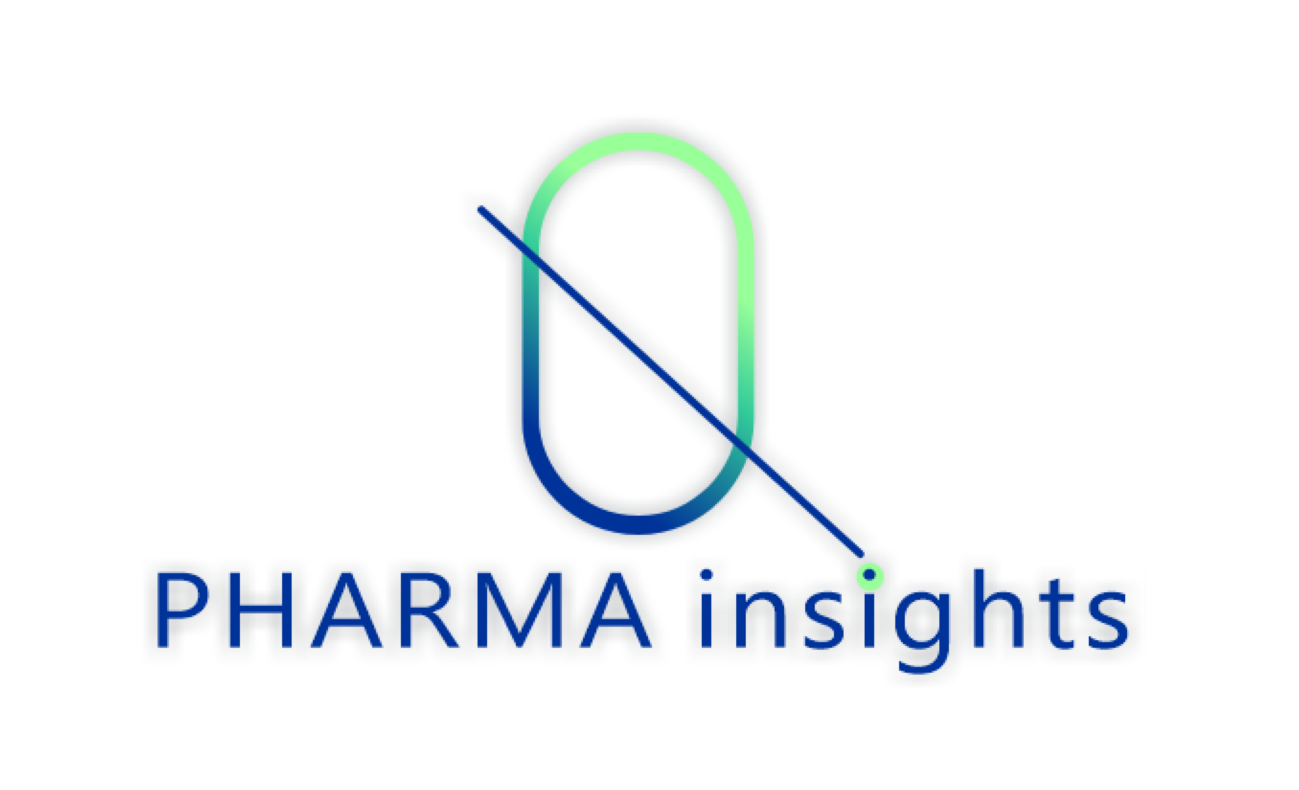

In [ ]:
# r.Imagen('../Pi.png', (20,10))

### si trabajamos en entorno de colab..

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importaciones e instancia de datos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import os

os.chdir('/content/drive/MyDrive/S17-19-N-DATA-BI') # en el caso de que se trabaje en google colab

import resources as r # modulo propio con funciones construidas para una mejor visualizacion del informe sin contaminacion de codigo
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action= 'ignore')

# Este codigo Pone un limite grande para el ancho y sin limite para el largo de un output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.width', 1000)

<h1>Instanciamos los datos</h1>

In [4]:
# df_data = pd.read_parquet('../Data/Data.parquet')
df_data = pd.read_parquet('Data/Data.parquet') # colab

In [5]:
# df_productos = pd.read_parquet('../Data/Productos.parquet')
df_productos = pd.read_parquet('Data/Productos.parquet') # colab

In [6]:
# df_sucursales = pd.read_parquet('../Data/Sucursales.parquet')
df_sucursales = pd.read_parquet('Data/Sucursales.parquet') # colab

In [7]:
# df_usuarios = pd.read_parquet('../Data/Usuarios.parquet')
df_usuarios = pd.read_parquet('Data/Usuarios.parquet') # colab

# Introducción

# <h1 align= 'center'><strong>Desarrollo</strong></h1>

## <h2 align= 'center'><strong>Análisis Descriptivo</strong></h2>

Observaciones generales

*   La inexistencia de un diccionario de datos complica la traduccion de nomenclatura de algunos valores y por lo tanto la interpretacion de los datos y/o campos
*   Se da por sentado que todos los ficheros tienen un mismo origen/fuente de datos, esto es importante para realizar una adecuada construccion de relaciones entre las tablas


### Data

In [ ]:
df_data.head()

fecha_transaccion  periodo      id_transaccion  id_sucursal linea_dispensacion id_paciente        id_pactprdo    skuagr_2  cantidad_dispensada  costcomp_unit  valorventa_unit_sl                                         first_spend id_factura
0        2024-02-01   202402  281819_281819_1010         1010             CAPITA  1002023082  1002023082_202402  61073475G5                 60.0         32.384           40.000000  CONCURRENT                                                  0
1        2024-04-26   202404  633315_633315_1017         1017             CAPITA    72158665    72158665_202404  16136775G5                 30.0         39.468           55.384615  CONCURRENT                                                  0
2        2024-02-28   202402  286272_286272_1010         1010             CAPITA    23183093    23183093_202402  35724945G5                  2.0       4169.440         5340.000000  CONCURRENT                                                  0
3        2024-01-05   202401  251437_251437_1012         1012             CAPITA  1043586626  1043586626_202401  13854875G5                  6.0        217.580          335.384615  FIRST SPEND                                                 0
4        2024-01-17   202401  253375_253375_1012         1012             CAPITA    72073242    72073242_202401  13854875G5                  4.0        217.580          335.384615  CONCURRENT                                                  0

Observaciones

*   Etiquetas de columnas no estan estandarizadas (algunas en ingles otras en español)
*   Presencia de valores nan y None en columnas "skuagr_2", "cantidad_dispensada", "costcomp_unit", "valorventa_unit_sl"
*   Columna "fecha_transacción" debe tener tipo de dato fecha
*   Columna "periodo" se vuelve innecesaria ya teniendo la columna "fecha_transaccion"
*   Etiquetas de los datos en la columna "first_spend" estan en ingles
*   Evaluar la utilidad de las columnas con prefijo "id" (cuales son utiles como foreign key y cuales no a causa de la inexistencia de sus tablas o su falta de utilidad).






#### Informe General

In [ ]:
r.informe_dataframe(df_data)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 585927
Columnas: 13

--Numero de datos--
7613844

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 585926
Columnas: ['fecha_transaccion', 'periodo', 'id_transaccion', 'id_sucursal', 'linea_dispensacion', 'id_paciente', 'id_pactprdo', 'skuagr_2', 'cantidad_dispensada', 'costcomp_unit', 'valorventa_unit_sl', 'first_spend', 'id_factura']

--Tipo de columnas--
fecha_transaccion       object
periodo                  int64
id_transaccion          object
id_sucursal              int64
linea_dispensacion      object
id_paciente             object
id_pactprdo             object
skuagr_2                object
cantidad_dispensada    float64
costcomp_unit          float64
valorventa_unit_sl     float64
first_spend             object
id_factura              object
dtype: object
--Cantidad de registros duplicados--
1970



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [ ]:
r.verificar_tipo_datos(df_data)

nombre_campo                           tipo_datos  no_nulos_%  nulos_%  nulos
0     fecha_transaccion                      [<class 'str'>]      100.00     0.00      0
1               periodo                      [<class 'int'>]      100.00     0.00      0
2        id_transaccion                      [<class 'str'>]      100.00     0.00      0
3           id_sucursal                      [<class 'int'>]      100.00     0.00      0
4    linea_dispensacion                      [<class 'str'>]      100.00     0.00      0
5           id_paciente                      [<class 'str'>]      100.00     0.00      0
6           id_pactprdo                      [<class 'str'>]      100.00     0.00      0
7              skuagr_2  [<class 'str'>, <class 'NoneType'>]       99.86     0.14    807
8   cantidad_dispensada                    [<class 'float'>]       99.86     0.14    800
9         costcomp_unit                    [<class 'float'>]       99.86     0.14    800
10   valorventa_unit_sl                    [<class 'float'>]       99.86     0.14    800
11          first_spend                      [<class 'str'>]      100.00     0.00      0
12           id_factura                      [<class 'str'>]      100.00     0.00      0

borramos los registros que presentan valores None o nan


In [ ]:
df_data = df_data.dropna().reset_index(drop= True)

#### Informe Particular

In [ ]:
for column in df_data.columns:
    r.informe_columna(df_data, column)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha_transaccion:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
120

--Valores unicos en la columna (Primeros 5 valores)--
['2024-02-01' '2024-04-26' '2024-02-28' '2024-01-05' '2024-01-17']

--Moda de la columna especificada--
Valor modal -----> 2024-05-14
Frecuencia acumulada ------> 7995

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha_transaccion
2024-05-14    7995
2024-04-01    7733
2024-05-20    7441
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE periodo:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [202402 202404 202401 202405 202403]  -----> Desde 202402  Hasta 202403

--Estadisti

#### Informe Descriptivo

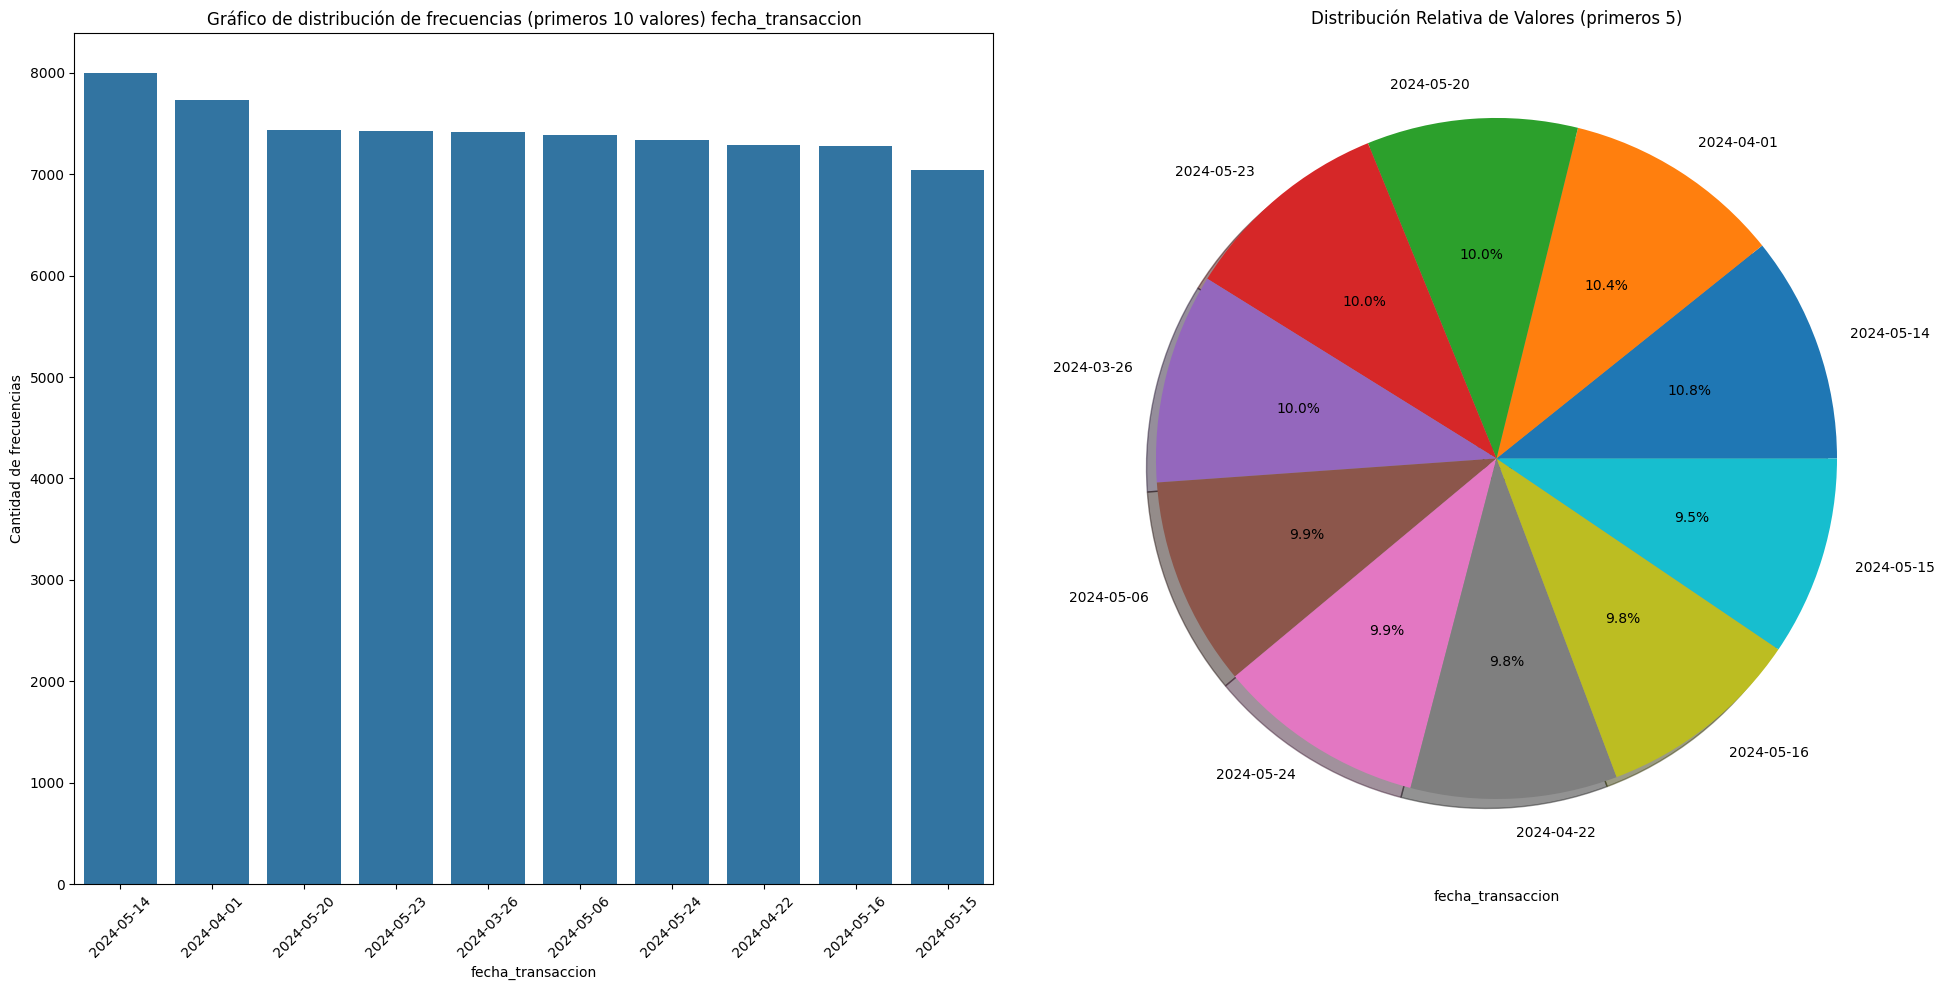



Estadísticas Básicas


count         585927
unique           120
top       2024-05-14
freq            7995
Name: fecha_transaccion, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




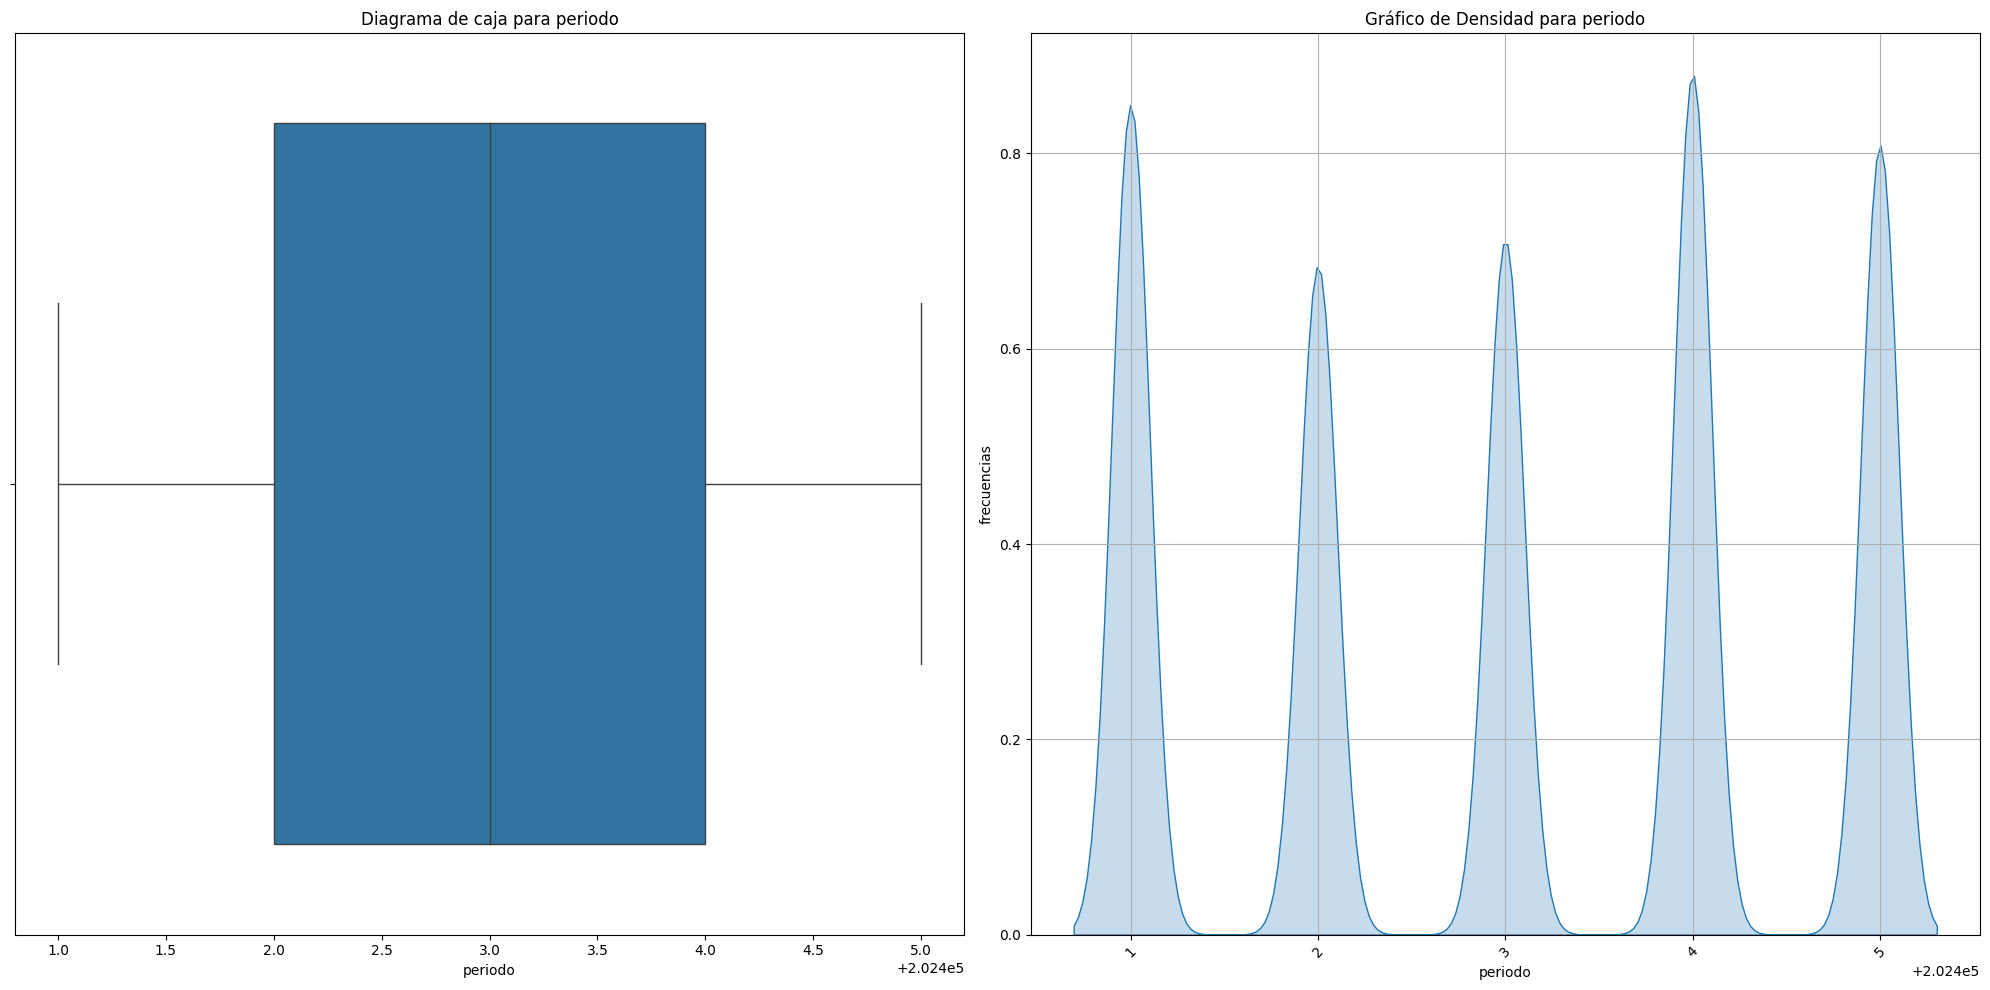



Estadísticas Básicas


count    585927.000000
mean     202403.029041
std           1.442969
min      202401.000000
25%      202402.000000
50%      202403.000000
75%      202404.000000
max      202405.000000
Name: periodo, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




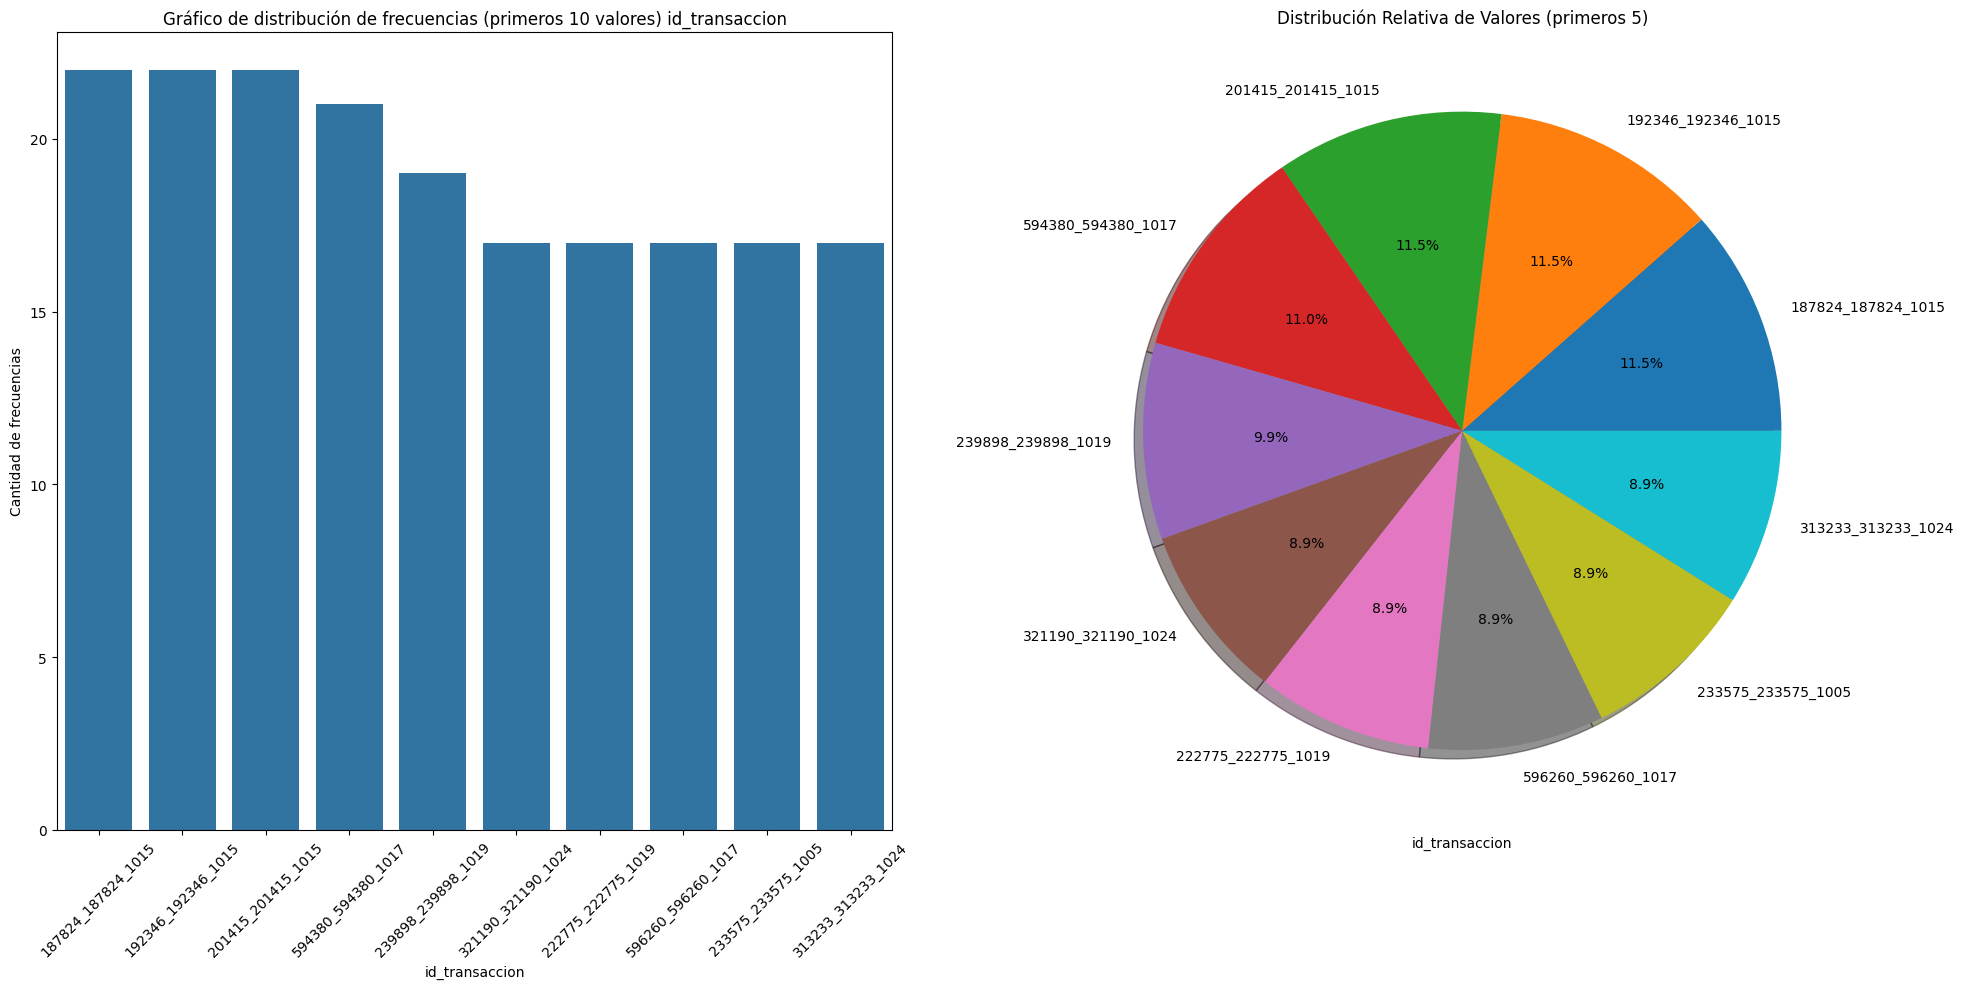



Estadísticas Básicas


count                 585927
unique                226817
top       187824_187824_1015
freq                      22
Name: id_transaccion, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




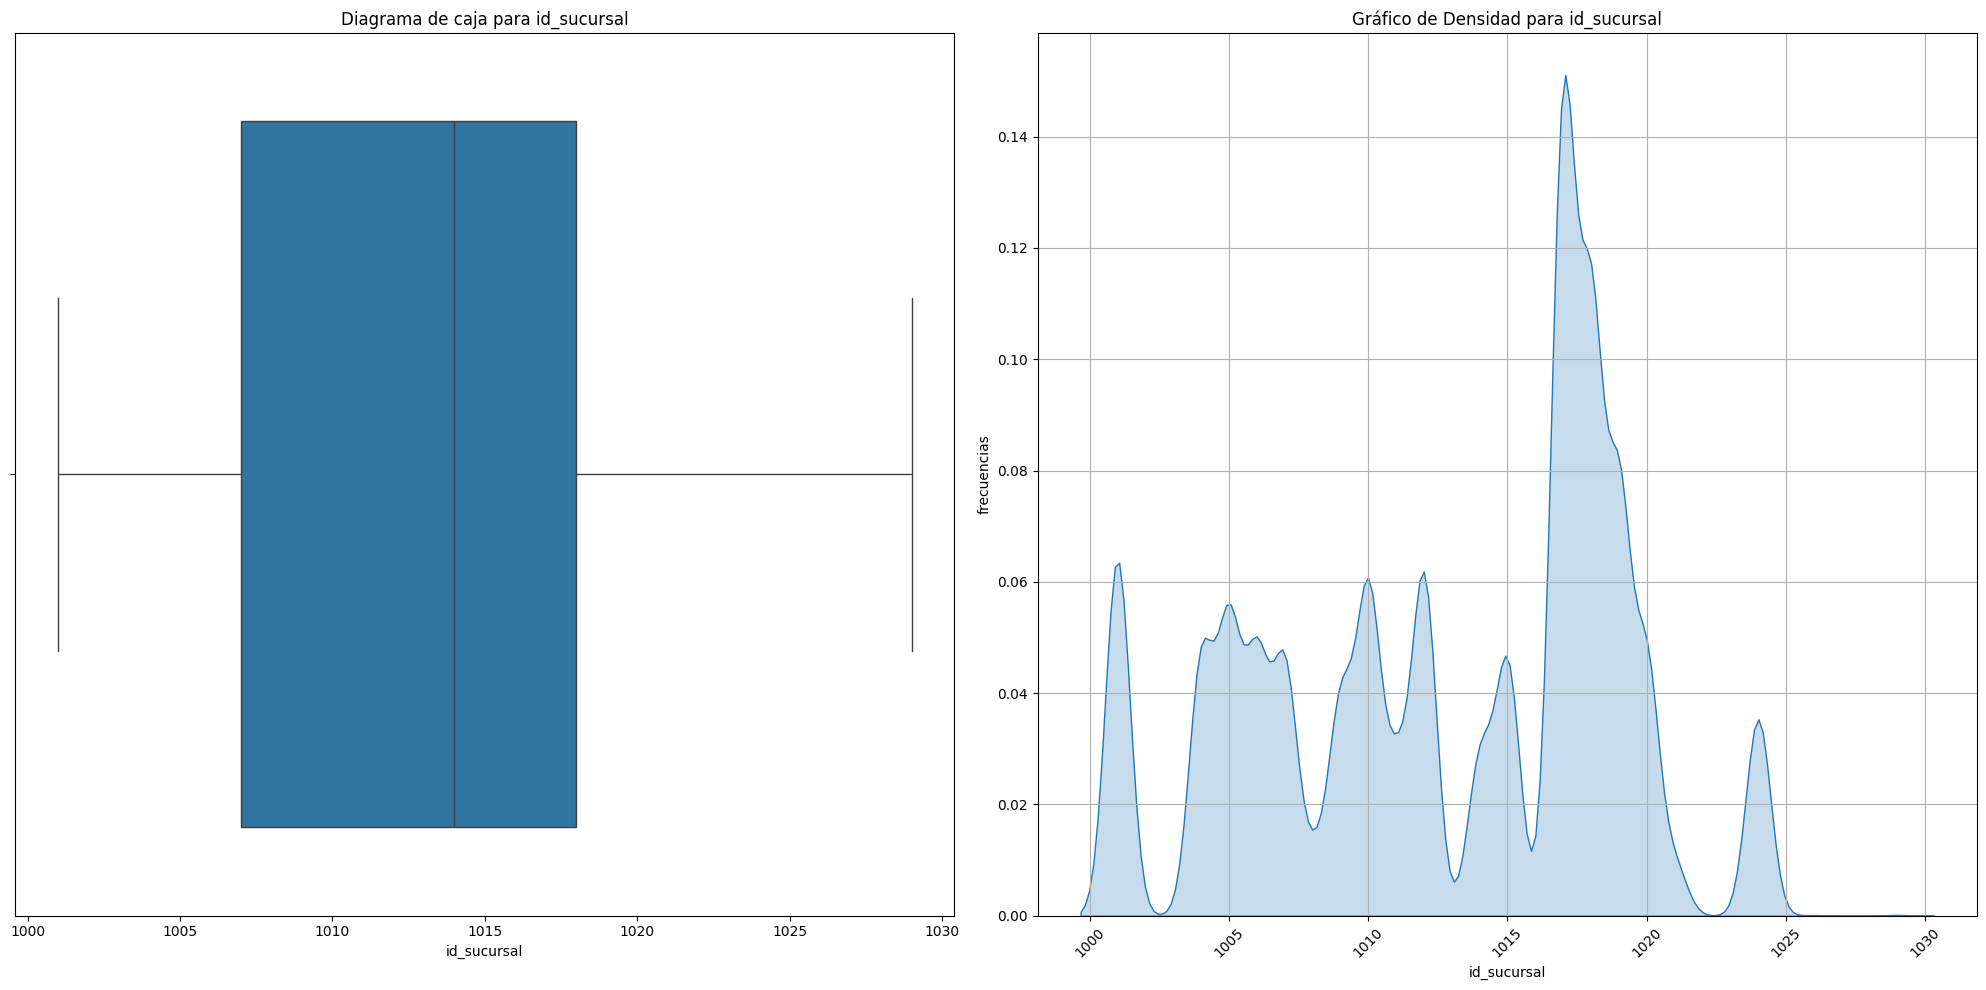



Estadísticas Básicas


count    585927.000000
mean       1012.762561
std           6.283510
min        1001.000000
25%        1007.000000
50%        1014.000000
75%        1018.000000
max        1029.000000
Name: id_sucursal, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




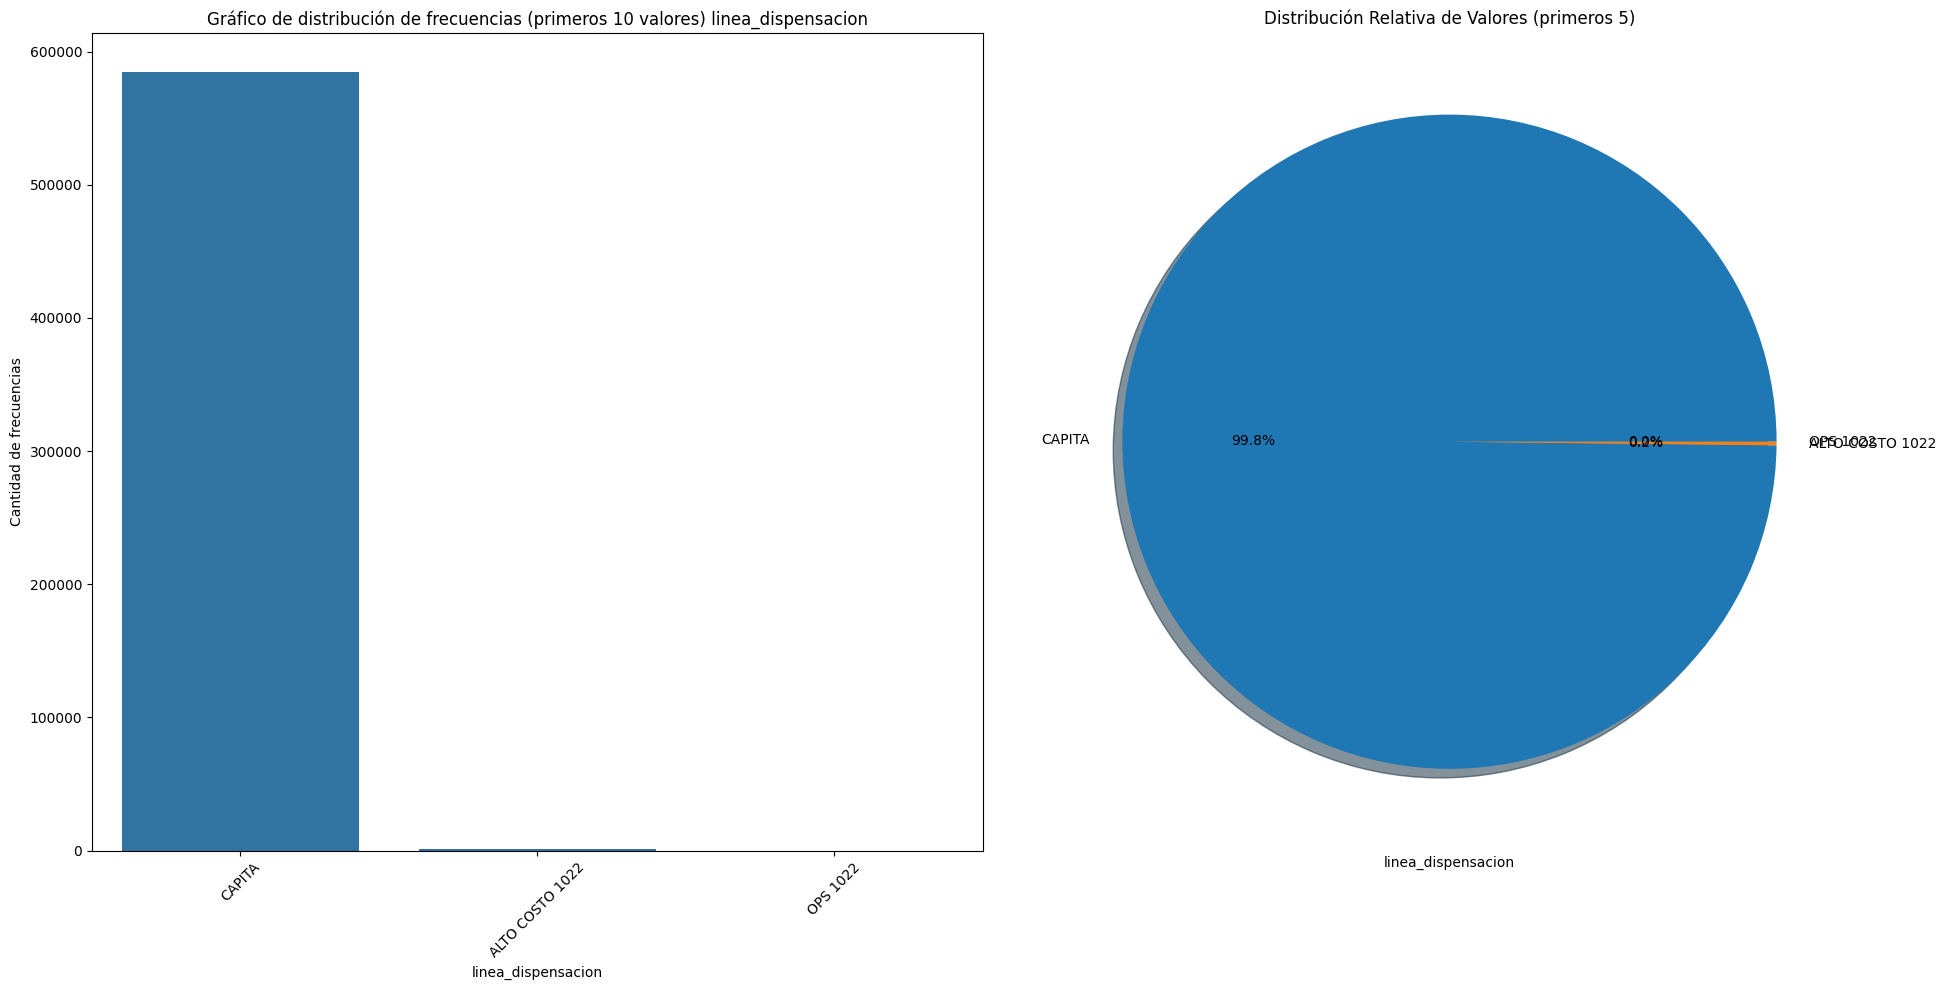



Estadísticas Básicas


count     585927
unique         3
top       CAPITA
freq      584903
Name: linea_dispensacion, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




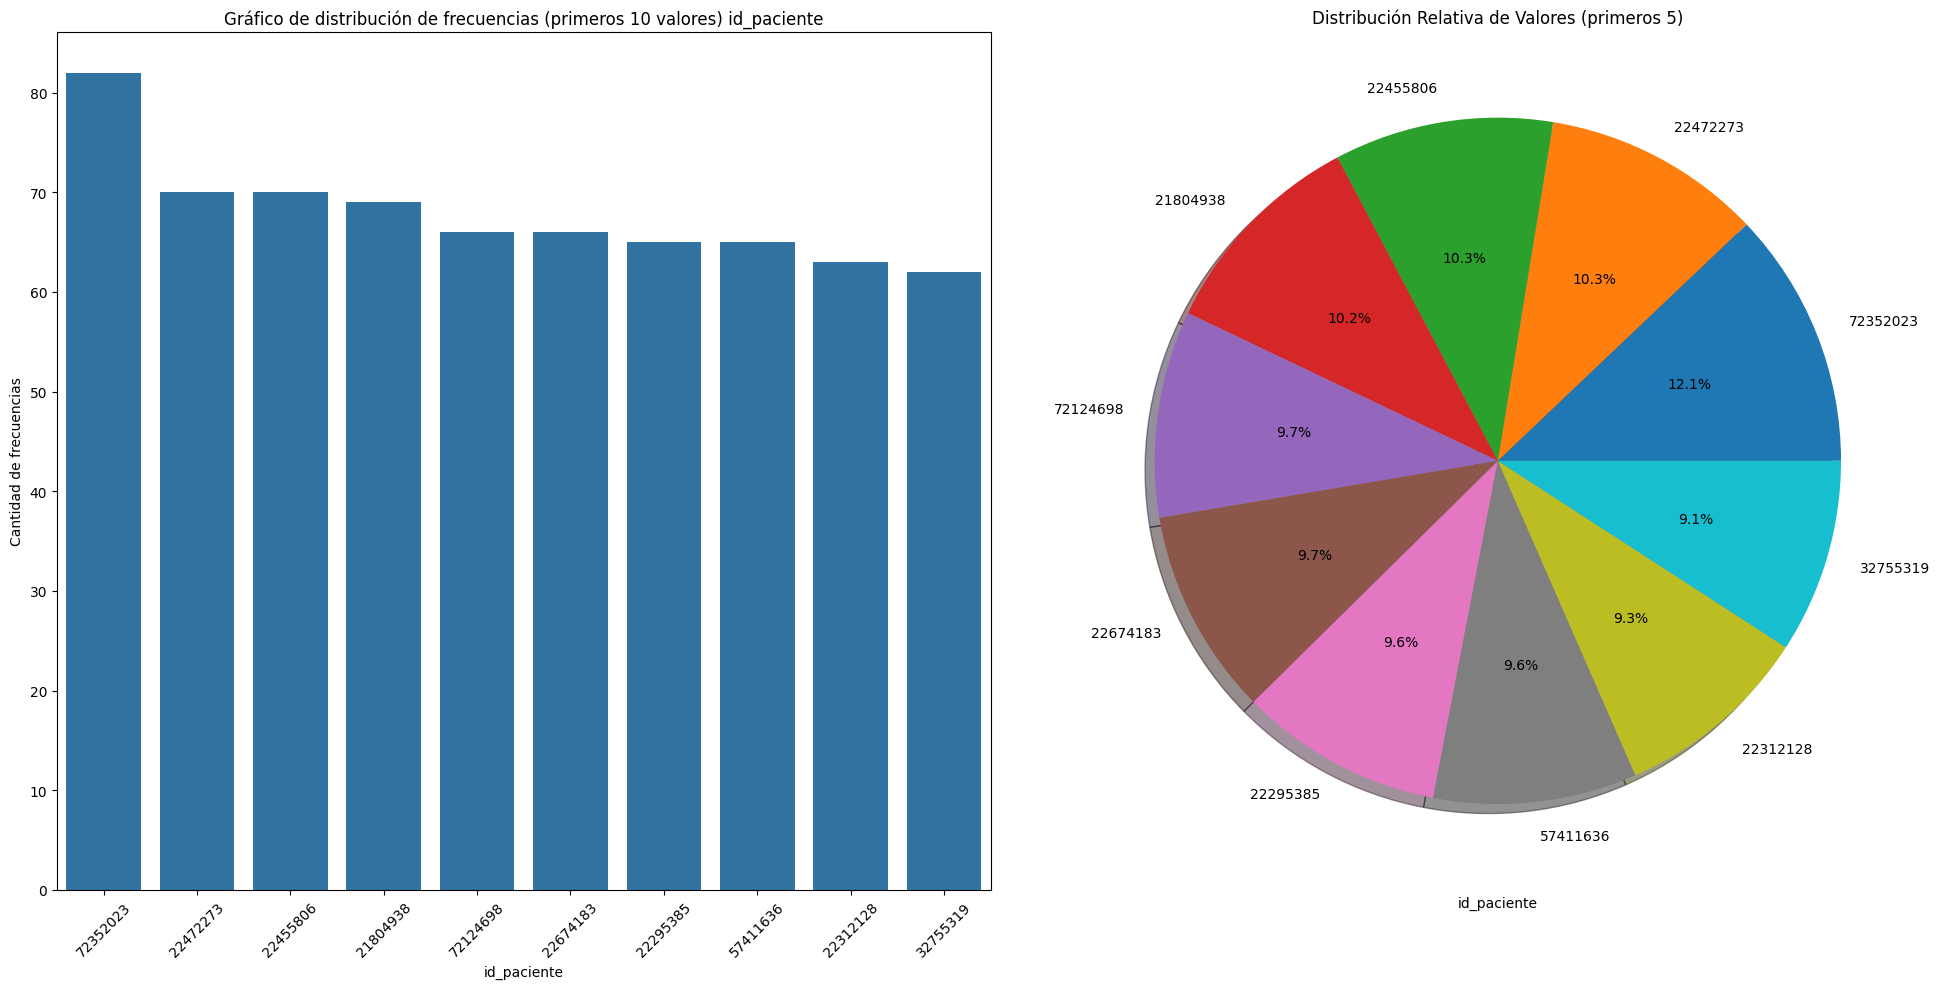



Estadísticas Básicas


count       585927
unique       91646
top       72352023
freq            82
Name: id_paciente, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




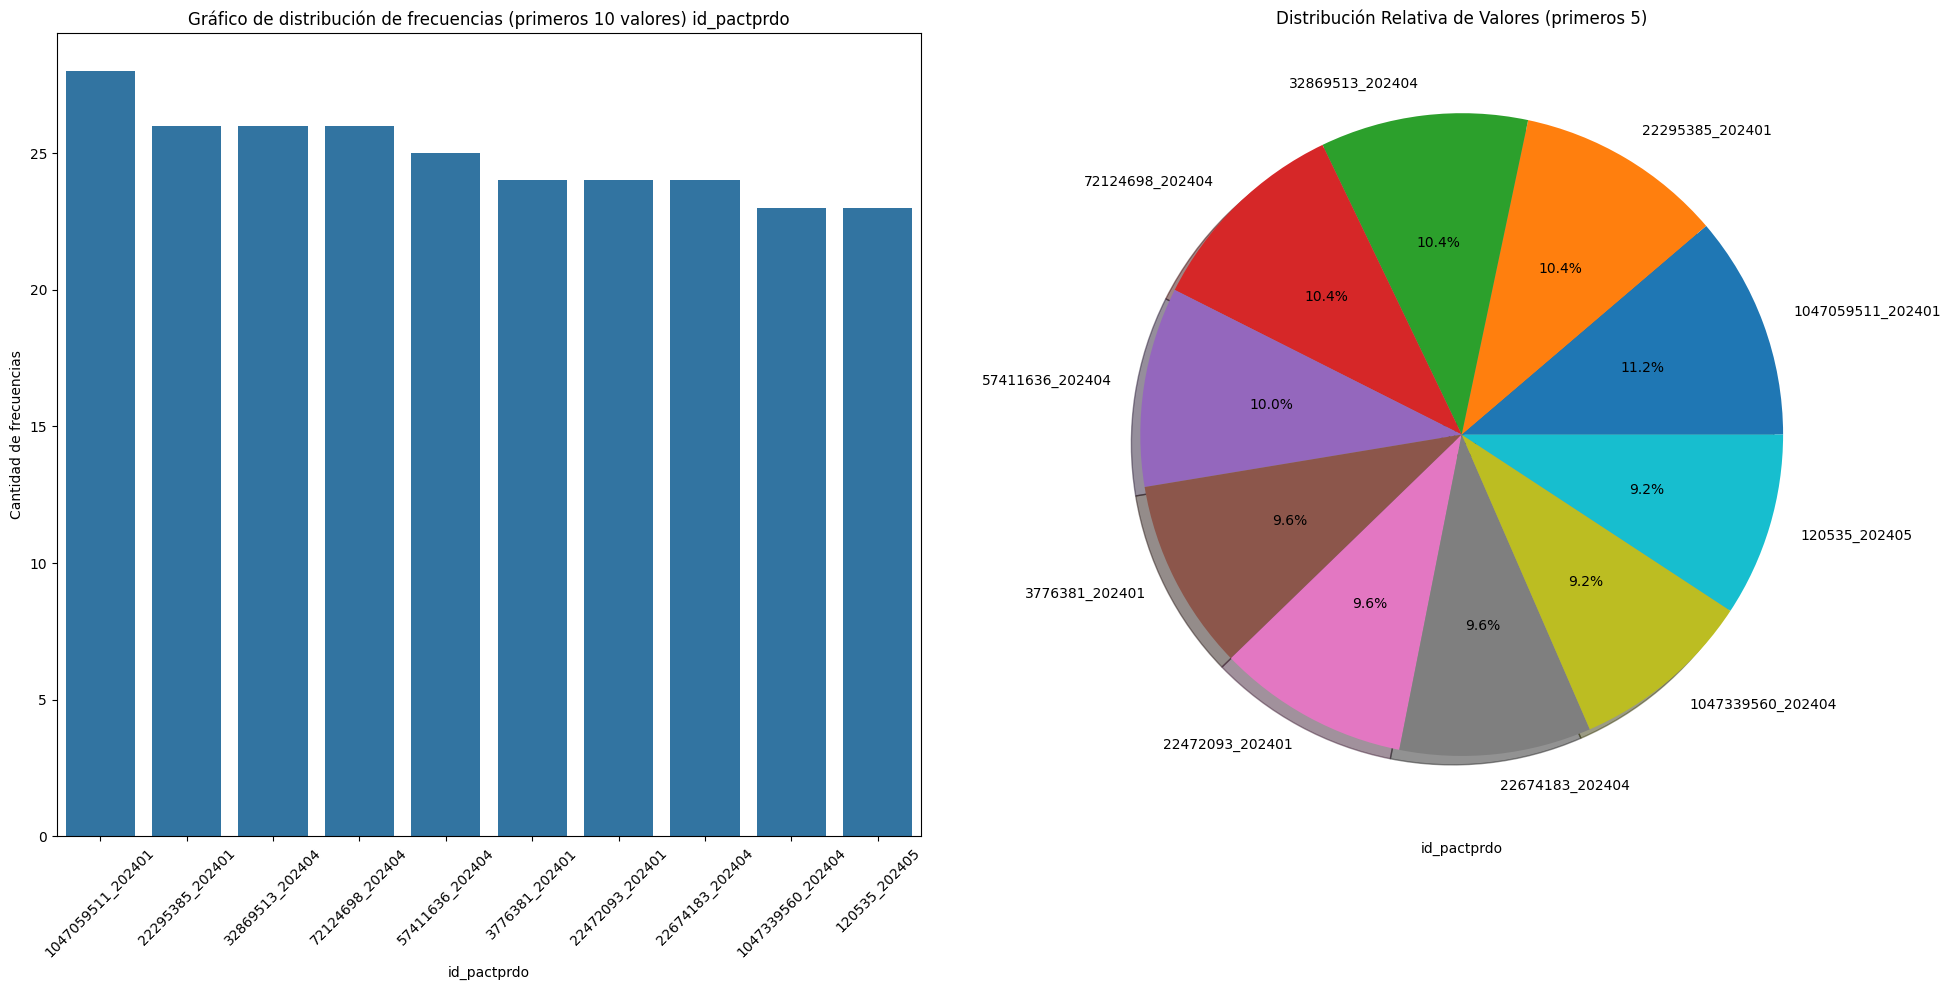



Estadísticas Básicas


count                585927
unique               176349
top       1047059511_202401
freq                     28
Name: id_pactprdo, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




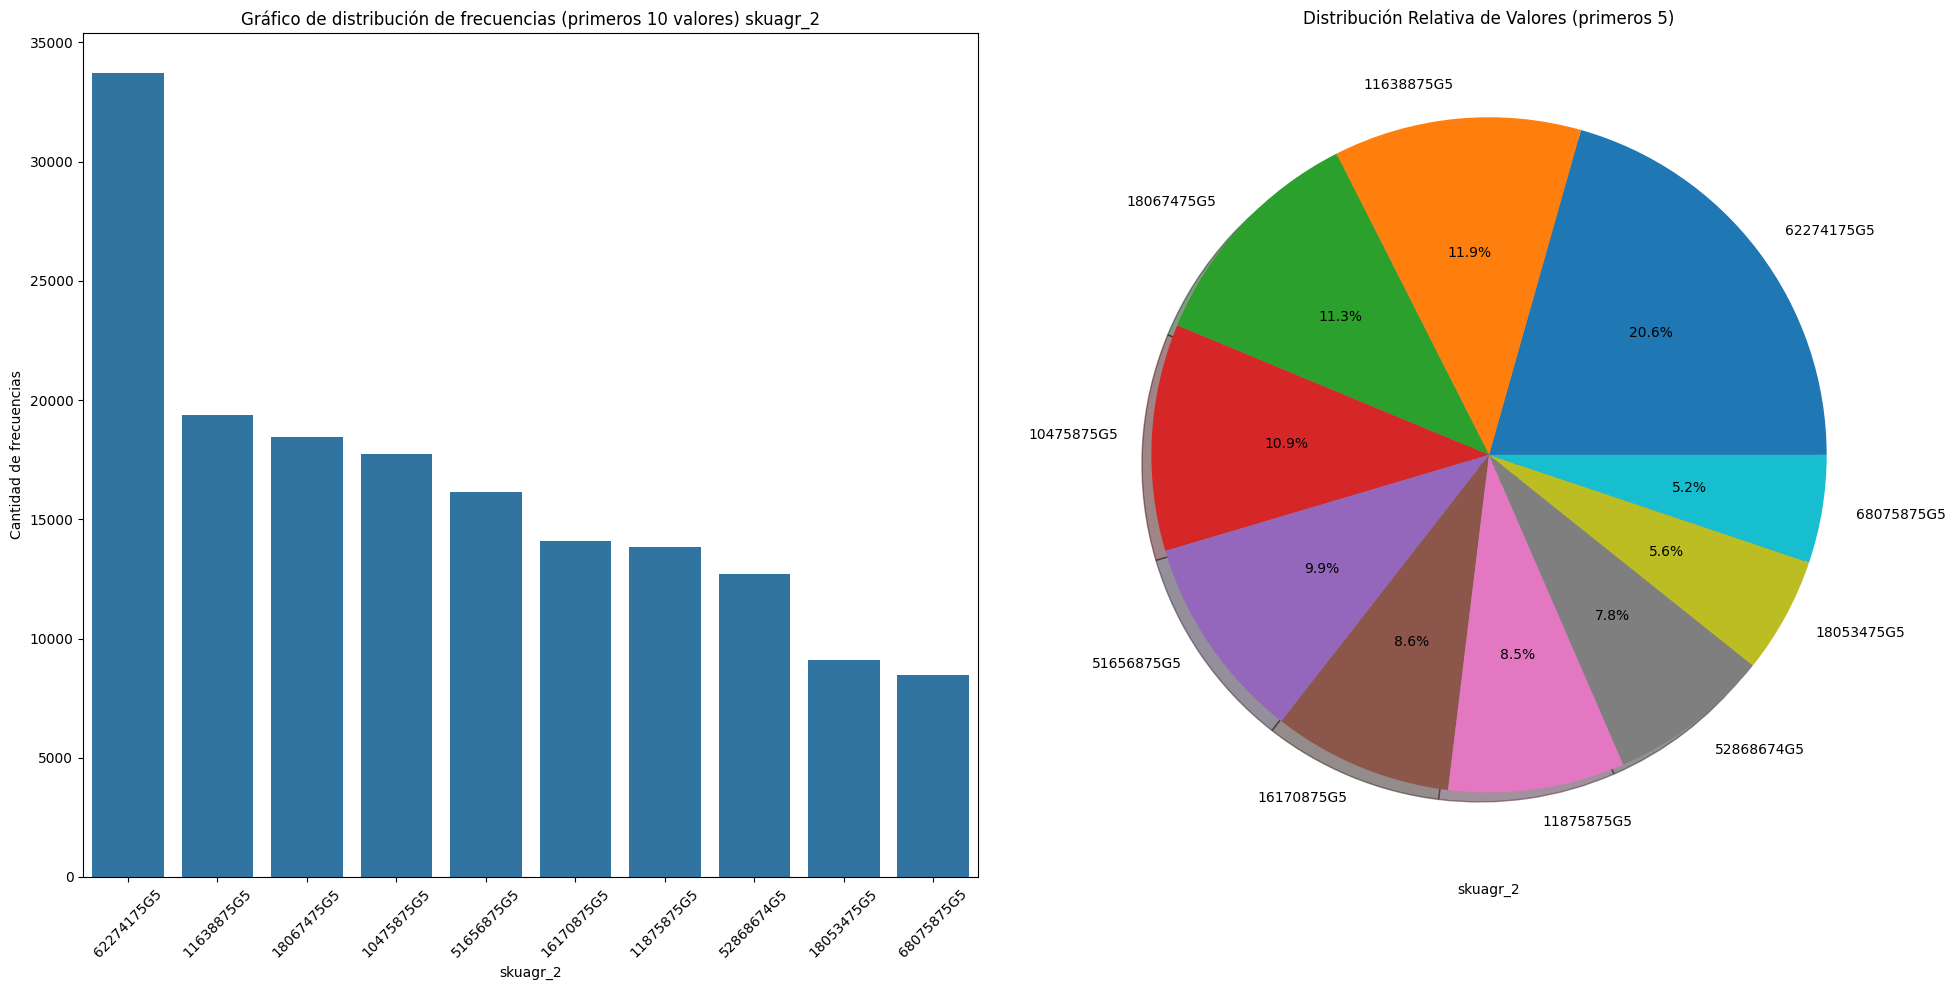



Estadísticas Básicas


count         585120
unique           965
top       62274175G5
freq           33715
Name: skuagr_2, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




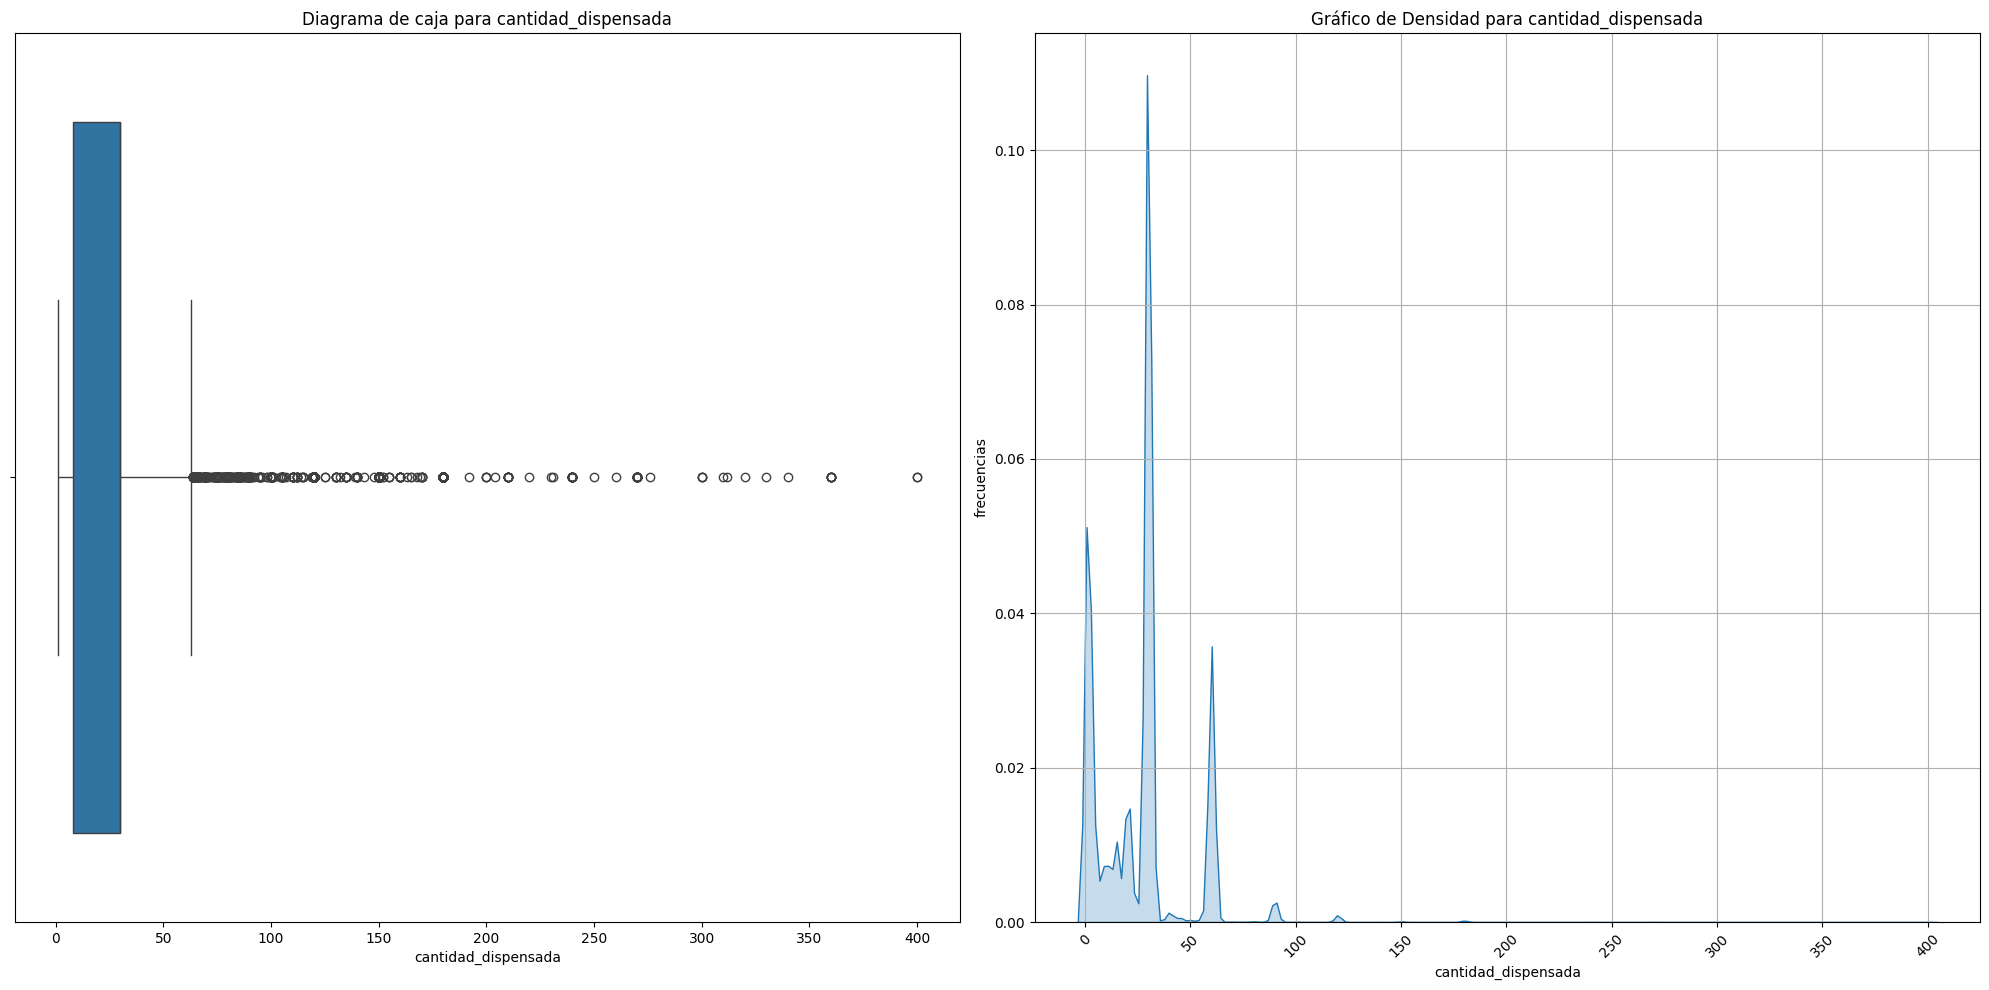



Estadísticas Básicas


count    585127.000000
mean         26.300630
std          20.883719
min           1.000000
25%           8.000000
50%          30.000000
75%          30.000000
max         400.000000
Name: cantidad_dispensada, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




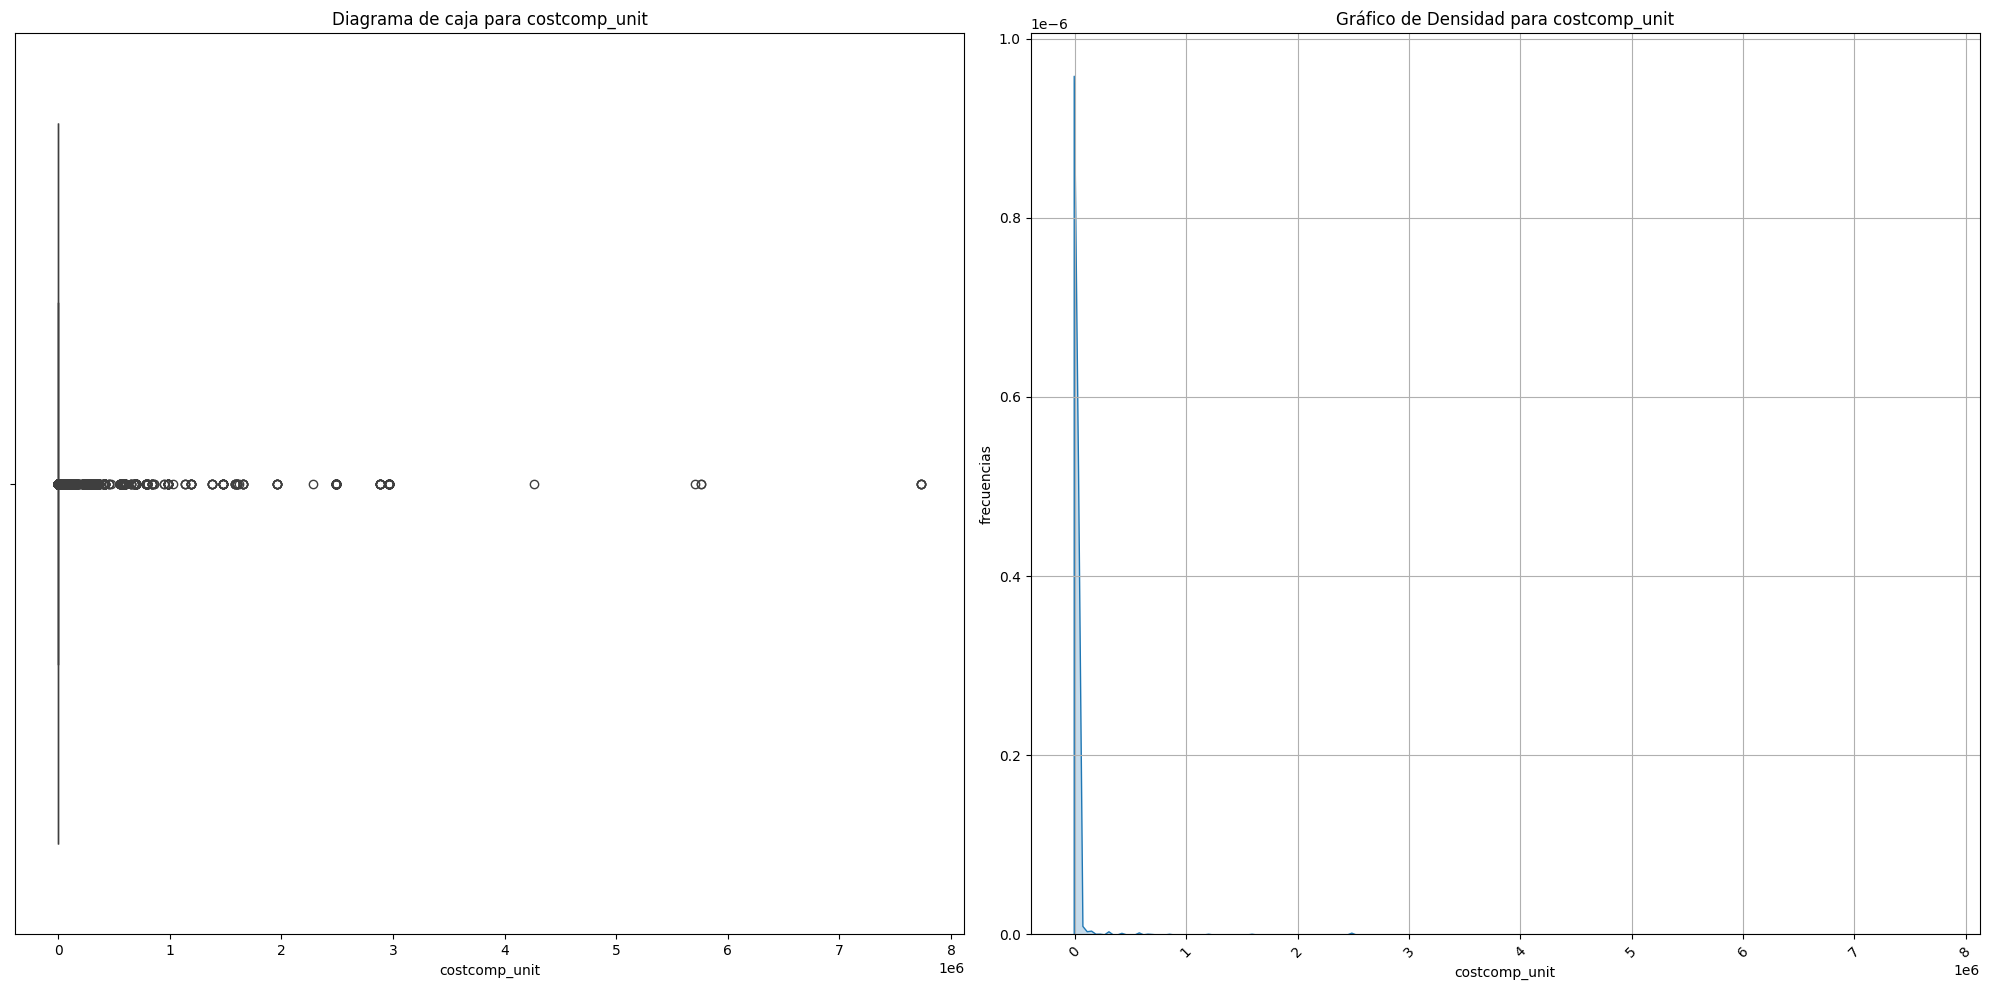



Estadísticas Básicas


count    5.851270e+05
mean     2.630121e+03
std      4.555067e+04
min      0.000000e+00
25%      4.351600e+01
50%      1.123320e+02
75%      7.600120e+02
max      7.731818e+06
Name: costcomp_unit, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




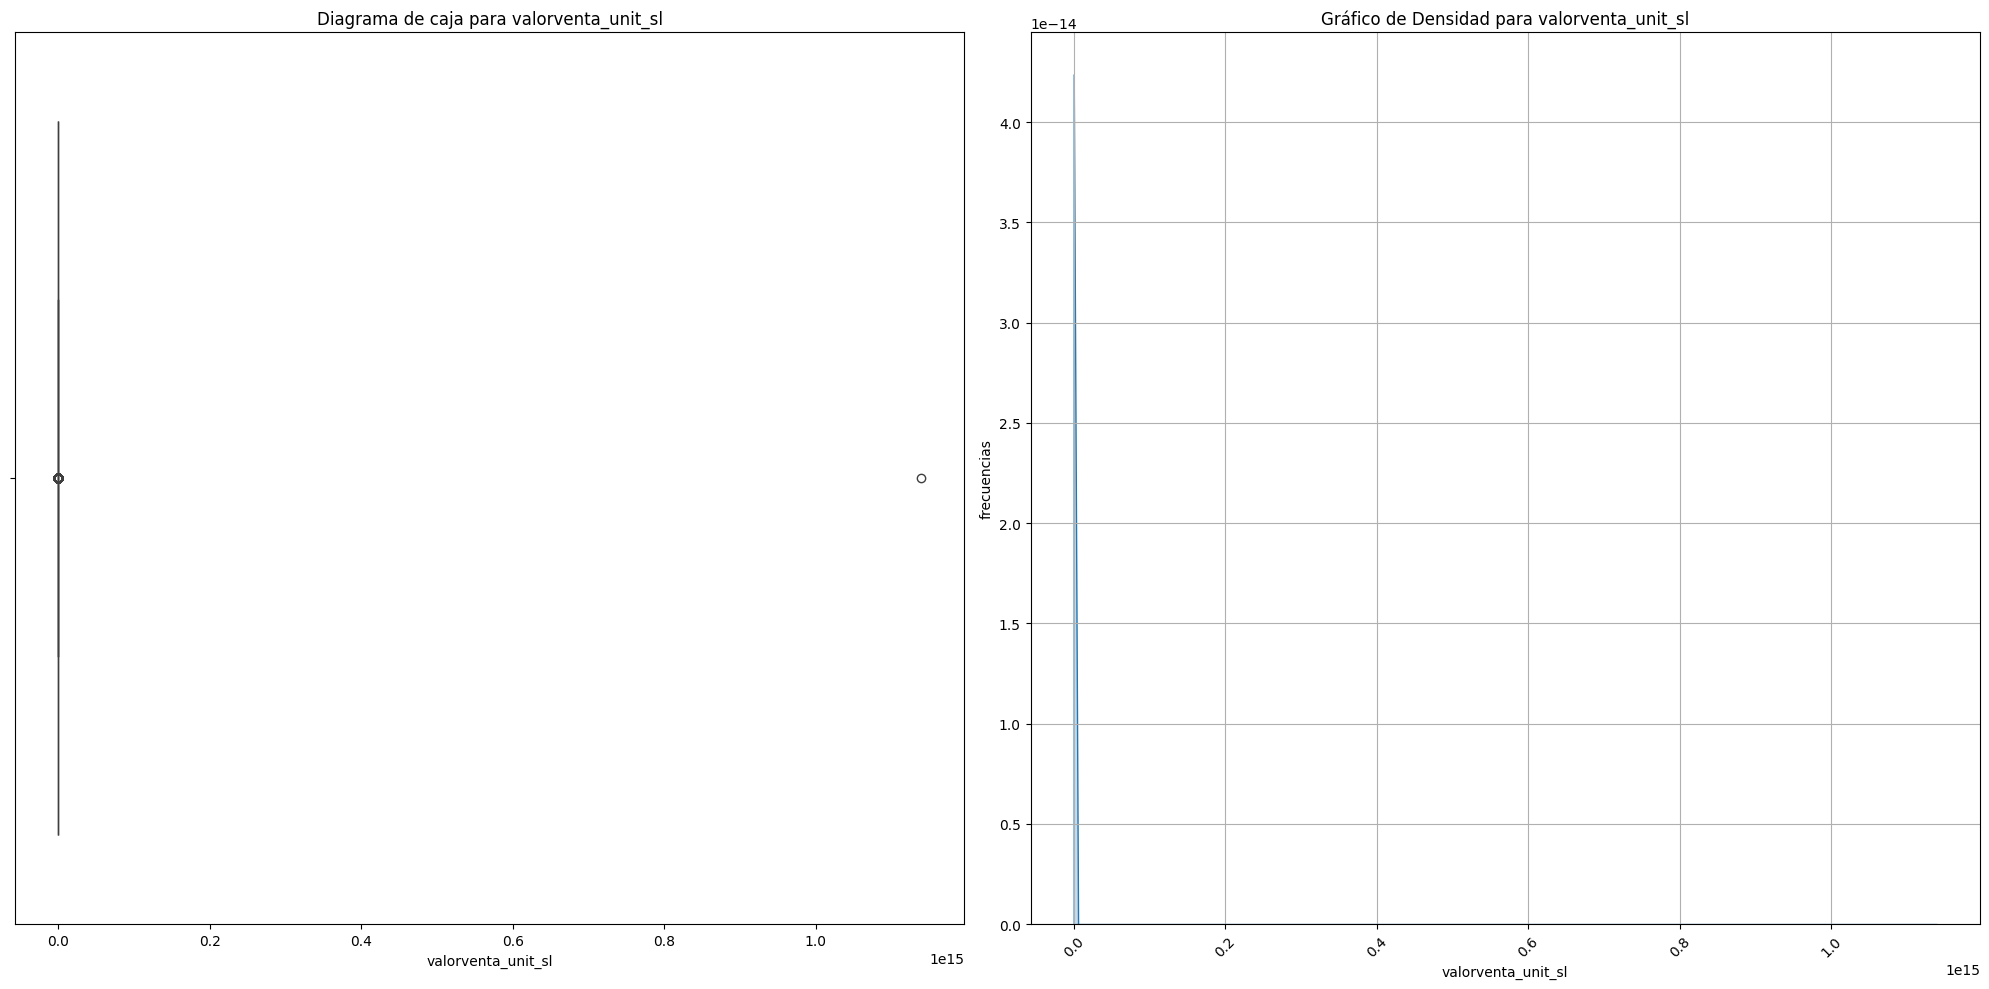



Estadísticas Básicas


count    5.851270e+05
mean     1.946546e+09
std      1.488980e+12
min      0.000000e+00
25%      6.153846e+01
50%      1.415385e+02
75%      9.000000e+02
max      1.138974e+15
Name: valorventa_unit_sl, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




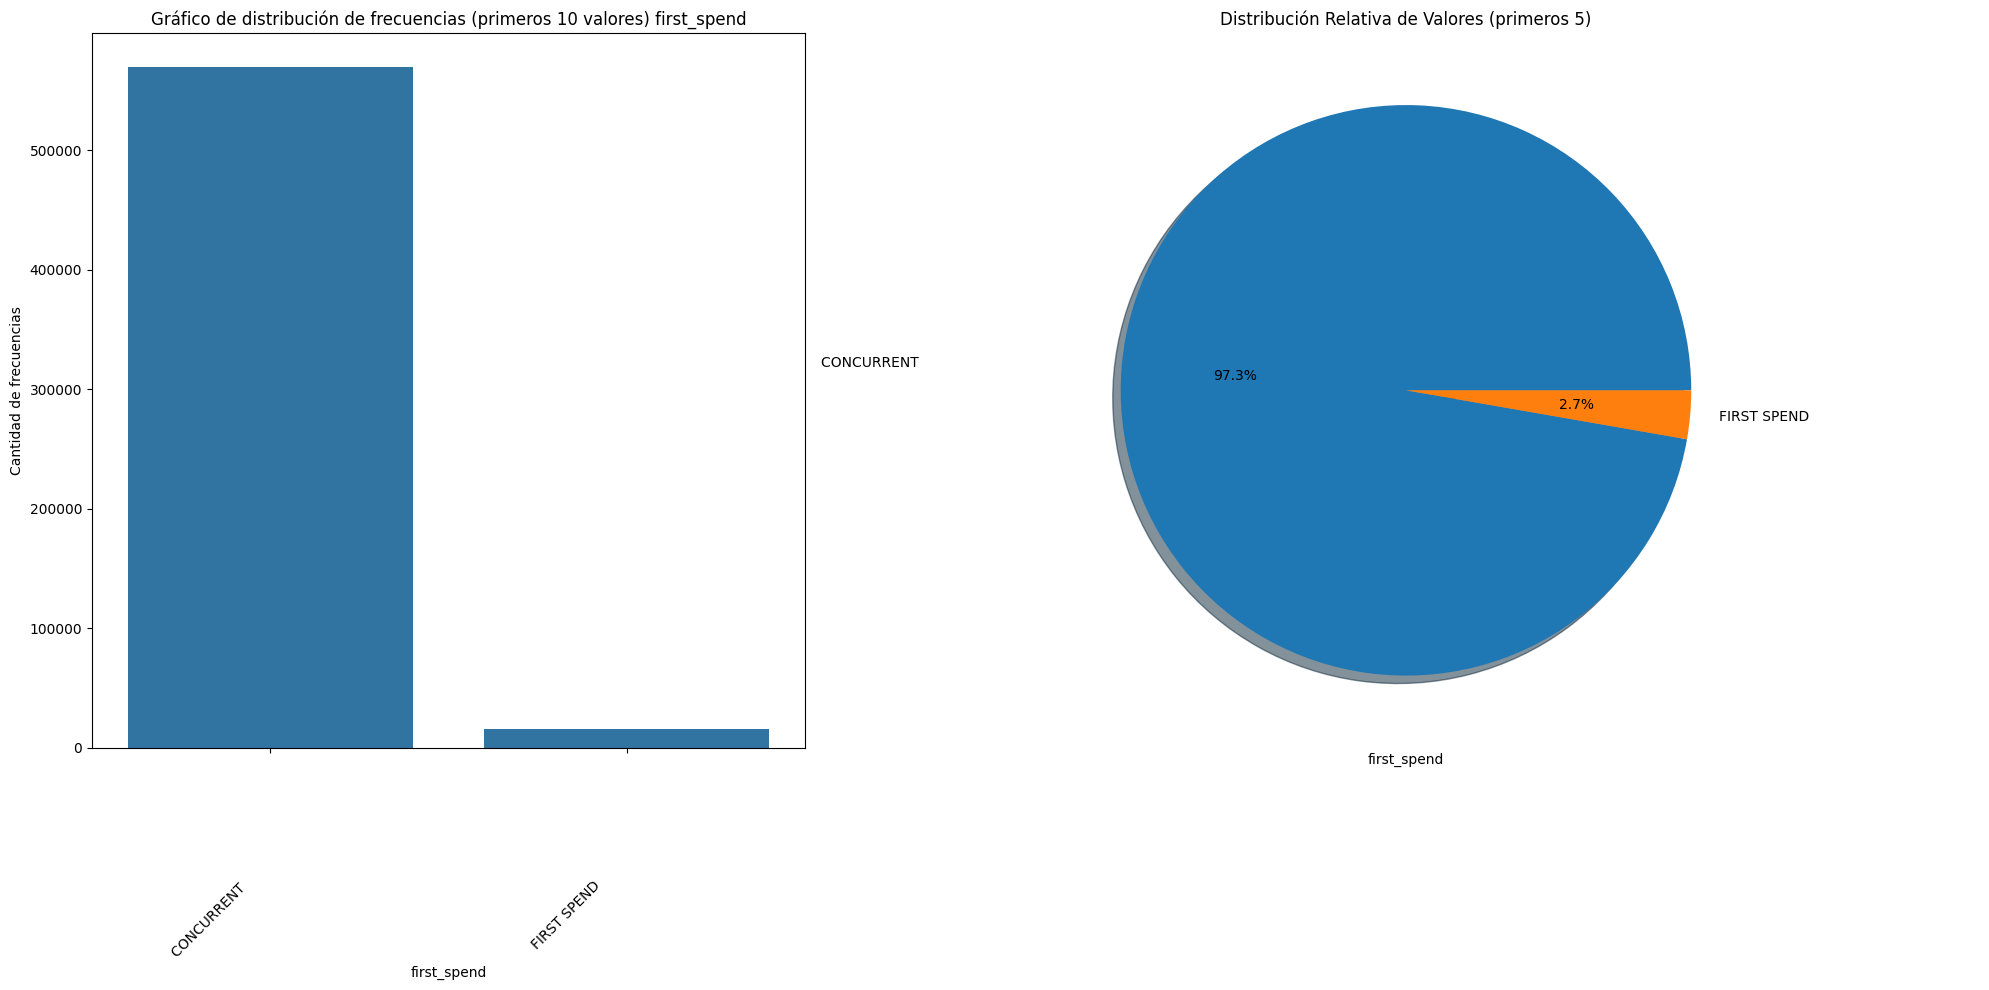



Estadísticas Básicas


count                                                 585927
unique                                                     2
top       CONCURRENT                                        
freq                                                  569834
Name: first_spend, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




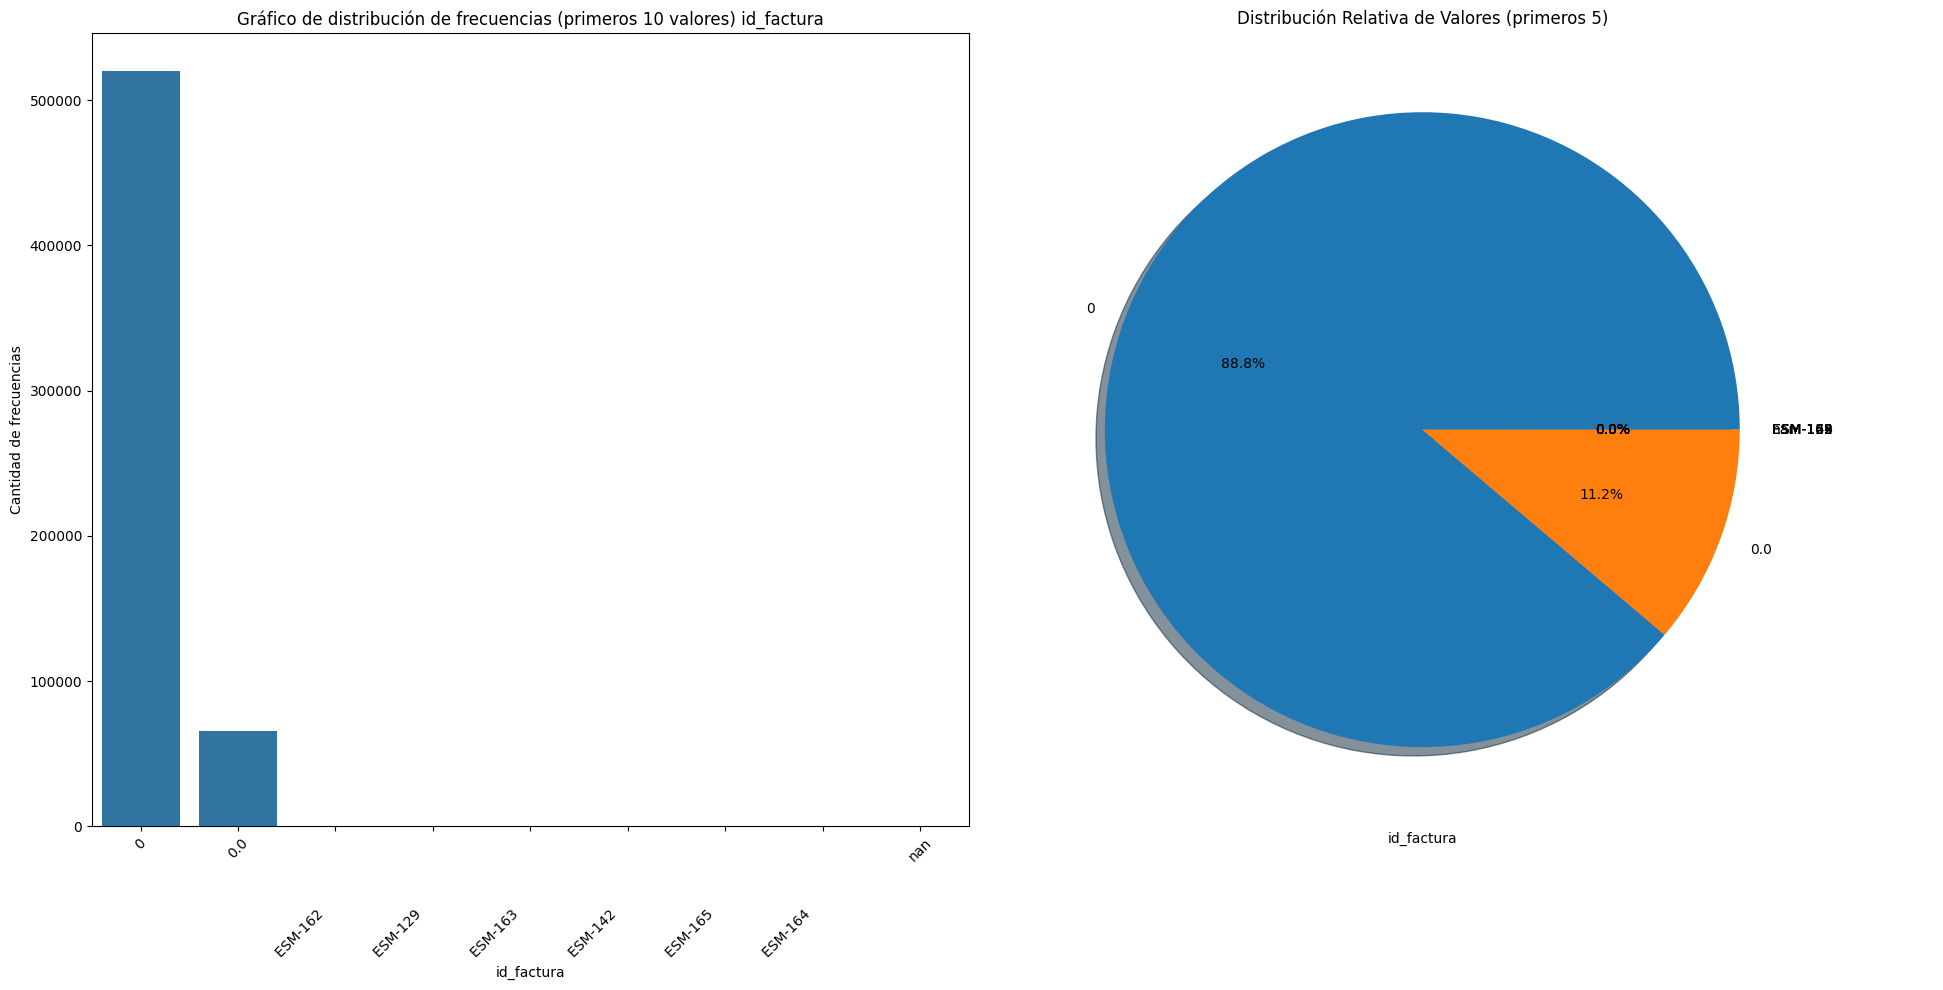



Estadísticas Básicas


count     585927
unique         9
top            0
freq      520385
Name: id_factura, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
r.descripcion_distribucion(df_data)

### Productos

In [ ]:
df_productos.head()

skuagr_2                                           descriprod_agrp2 lineaproducto grupo_producto sub_grupo_1         sub_grupo_2 cobertura_contrato perfil_terapeutico      atc        base_pbs  grupo_riesgo
0  100094545G5                ADAPALENO (0.1%) 0.1 GR /100 GR  GEL TOPICO     GENERICOS     ALTO COSTO  MX_NIVEL_2      TERAPIA TOPICA              P B S     DERMATOLOGICOS  D10AD03  INCLUSION 2022           199
1  100095245G5                ADAPALENO (0.3%) 0.3 GR /100 GR  GEL TOPICO     GENERICOS     ALTO COSTO  MX_NIVEL_2      TERAPIA TOPICA              P B S     DERMATOLOGICOS  D10AD03  INCLUSION 2022           199
2  100122237G5              DESONIDA (0.05%) 0.05 GR/100 GR  CREMA TOPICA     GENERICOS     ALTO COSTO  MX_NIVEL_2      TERAPIA TOPICA              P B S     DERMATOLOGICOS  D07AB08  INCLUSION 2022           199
3  100192837G5              DESONIDA (0.01%) 0.01 GR/100 GR  CREMA TOPICA     GENERICOS     ALTO COSTO  MX_NIVEL_2      TERAPIA TOPICA              P B S     DERMATOLOGICOS  D07AB08  INCLUSION 2022           199
4  100274158G5  ALGLUCOSIDASA ALFA 50 MG  POLVO PARA RECONSTIT INYECTABLE     GENERICOS     ALTO COSTO   MX_AP_ESP  TERAPIA INYECTABLE             NO PBS     ENF. HUERFANAS  A16AB07          NO PBS           199

Observaciones


*   Existen algunos valores None en la columna "atc"
*   Examinar y corroborar que la asignacion de tipo de dato en el campo "grupo_riesgo" como int sea correcta (se vislumbra que los numeros son etiquetas mas que mediciones o contadores)



#### Informe General

In [ ]:
r.informe_dataframe(df_productos)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 1995
Columnas: 11

--Numero de datos--
21943

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 1994
Columnas: ['skuagr_2', 'descriprod_agrp2', 'lineaproducto', 'grupo_producto', 'sub_grupo_1', 'sub_grupo_2', 'cobertura_contrato', 'perfil_terapeutico', 'atc', 'base_pbs', 'grupo_riesgo']

--Tipo de columnas--
skuagr_2              object
descriprod_agrp2      object
lineaproducto         object
grupo_producto        object
sub_grupo_1           object
sub_grupo_2           object
cobertura_contrato    object
perfil_terapeutico    object
atc                   object
base_pbs              object
grupo_riesgo           int64
dtype: object
--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [ ]:
r.verificar_tipo_datos(df_productos)

nombre_campo                           tipo_datos  no_nulos_%  nulos_%  nulos
0             skuagr_2                      [<class 'str'>]       100.0      0.0      0
1     descriprod_agrp2                      [<class 'str'>]       100.0      0.0      0
2        lineaproducto                      [<class 'str'>]       100.0      0.0      0
3       grupo_producto                      [<class 'str'>]       100.0      0.0      0
4          sub_grupo_1                      [<class 'str'>]       100.0      0.0      0
5          sub_grupo_2                      [<class 'str'>]       100.0      0.0      0
6   cobertura_contrato                      [<class 'str'>]       100.0      0.0      0
7   perfil_terapeutico                      [<class 'str'>]       100.0      0.0      0
8                  atc  [<class 'str'>, <class 'NoneType'>]        99.9      0.1      2
9             base_pbs                      [<class 'str'>]       100.0      0.0      0
10        grupo_riesgo                      [<class 'int'>]       100.0      0.0      0

#### Informe Particular

In [ ]:
for column in df_productos.columns:
    r.informe_columna(df_productos, column)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE skuagr_2:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
1995

--Valores unicos en la columna (Primeros 5 valores)--
['100094545G5' '100095245G5' '100122237G5' '100192837G5' '100274158G5']

--Moda de la columna especificada--
Valor modal -----> 100094545G5
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 skuagr_2
100094545G5    1
82653475G5     1
83172471G5     1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE descriprod_agrp2:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
1995

--Valores unicos en la columna (Primeros 5 valores)--
['ADAPALENO (0.1%) 0.1 GR /

#### Informe Descriptivo

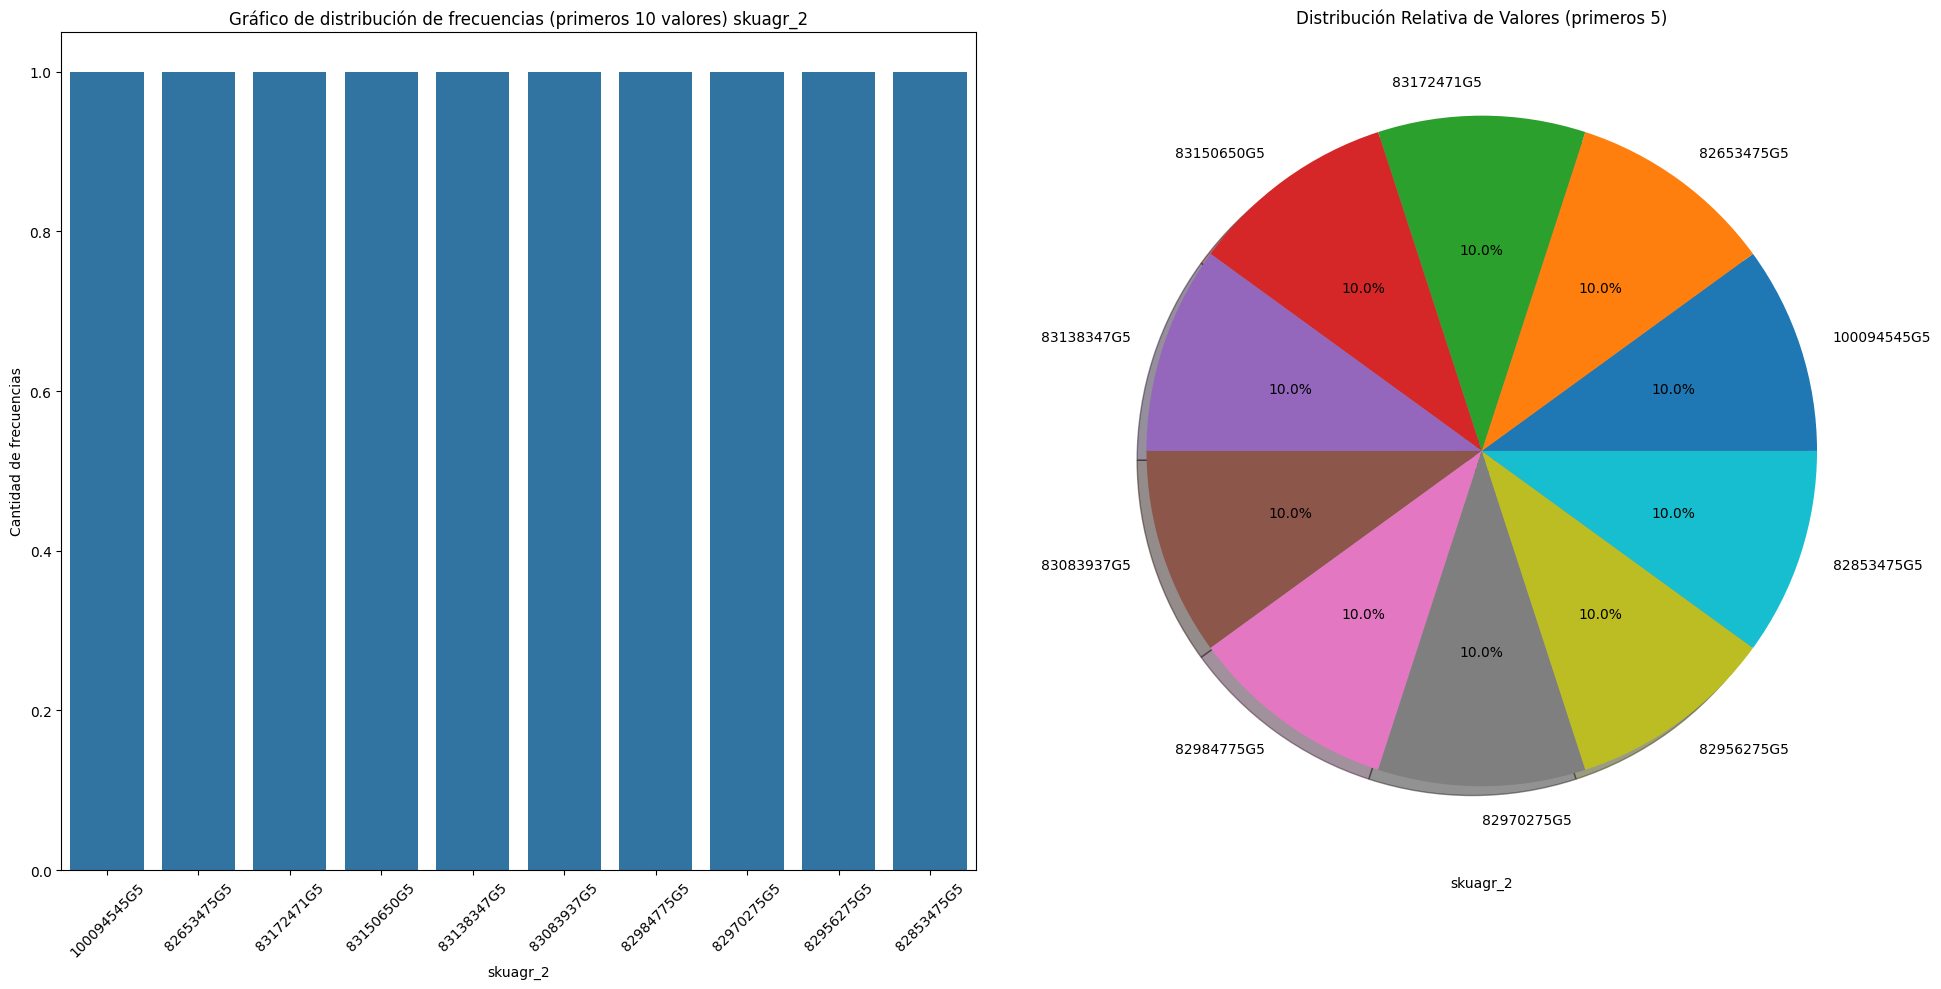



Estadísticas Básicas


count            1995
unique           1995
top       100094545G5
freq                1
Name: skuagr_2, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




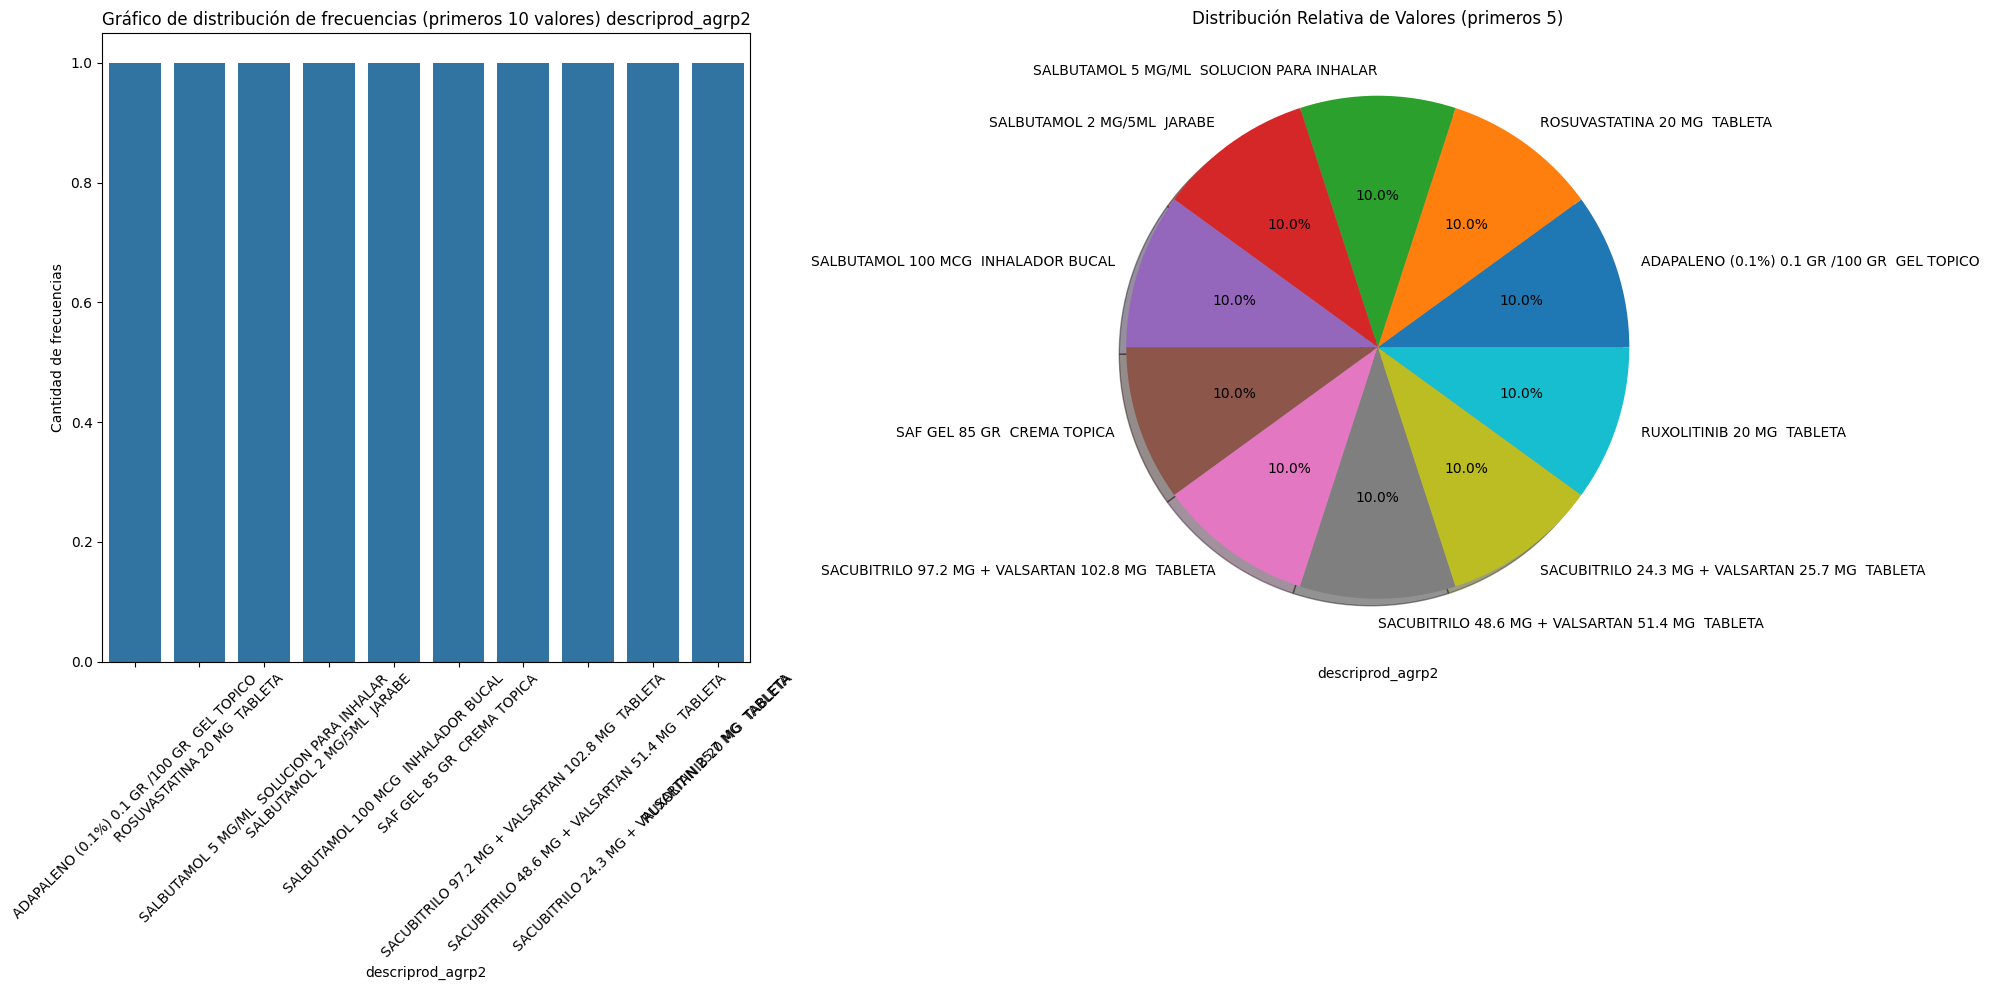



Estadísticas Básicas


count                                            1995
unique                                           1995
top       ADAPALENO (0.1%) 0.1 GR /100 GR  GEL TOPICO
freq                                                1
Name: descriprod_agrp2, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




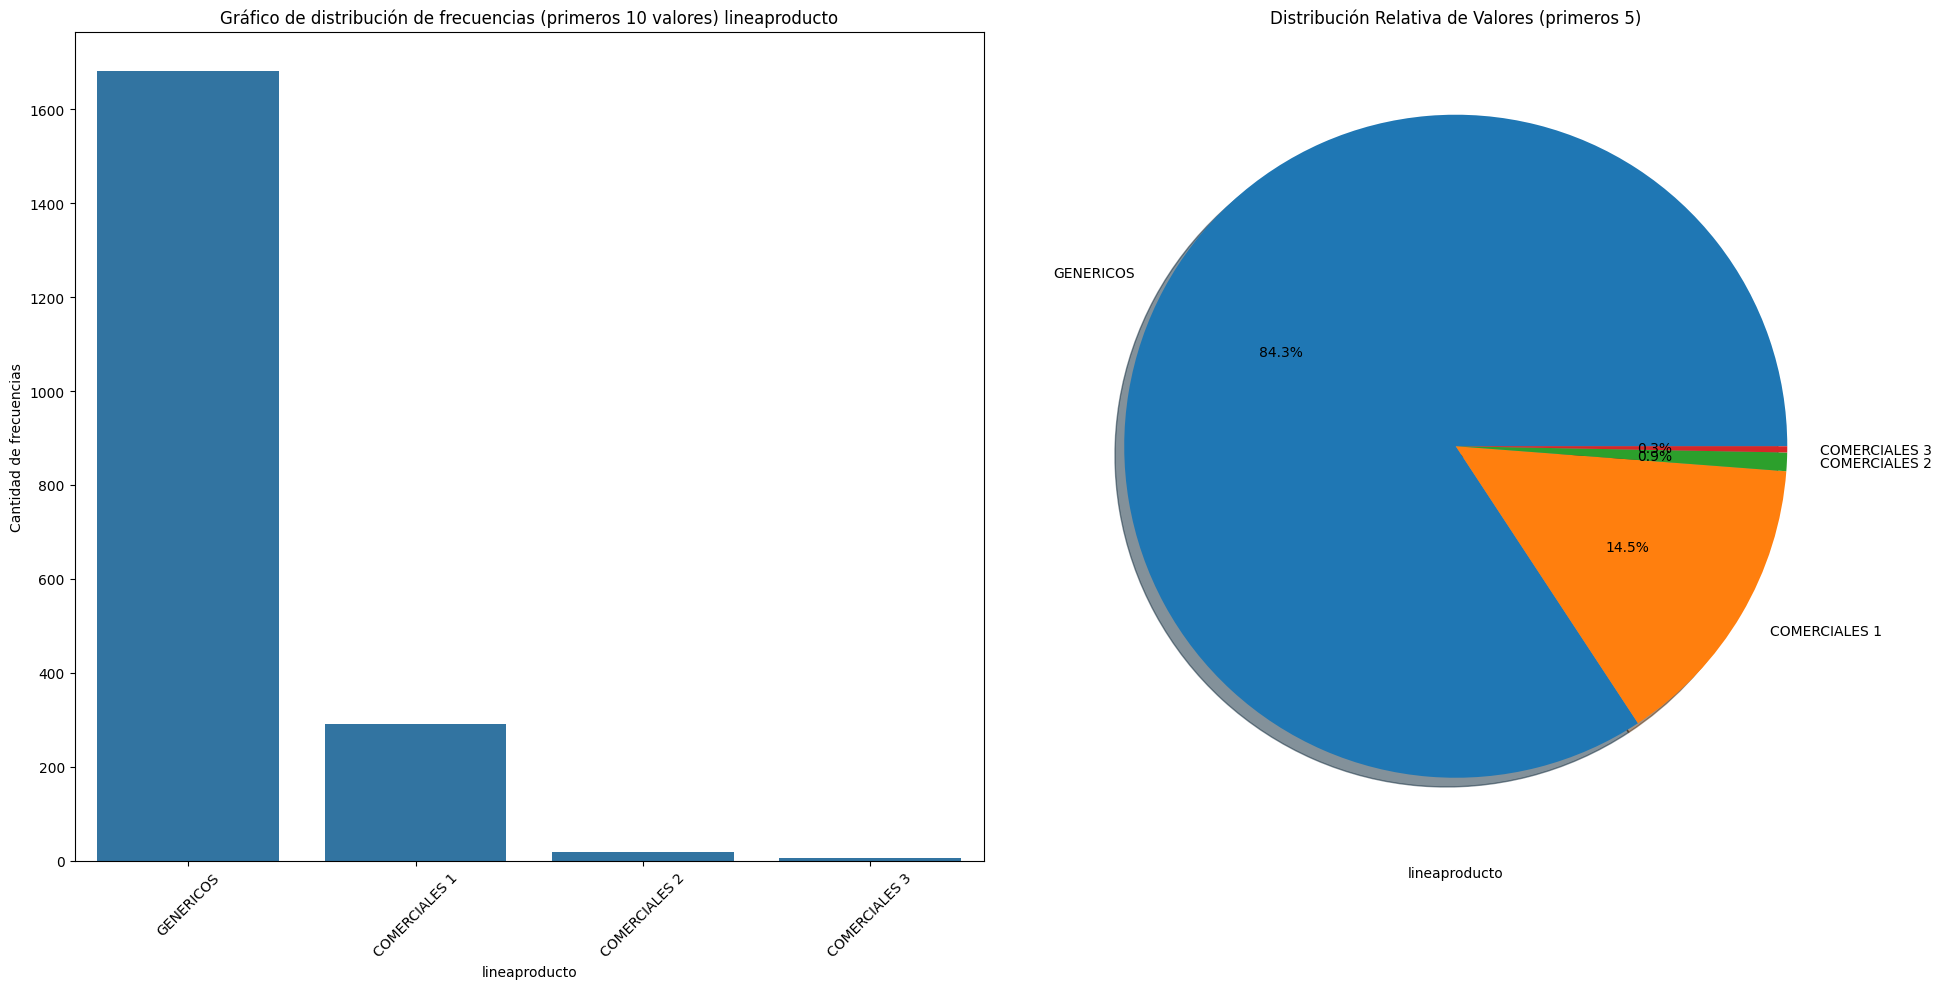



Estadísticas Básicas


count          1995
unique            4
top       GENERICOS
freq           1681
Name: lineaproducto, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




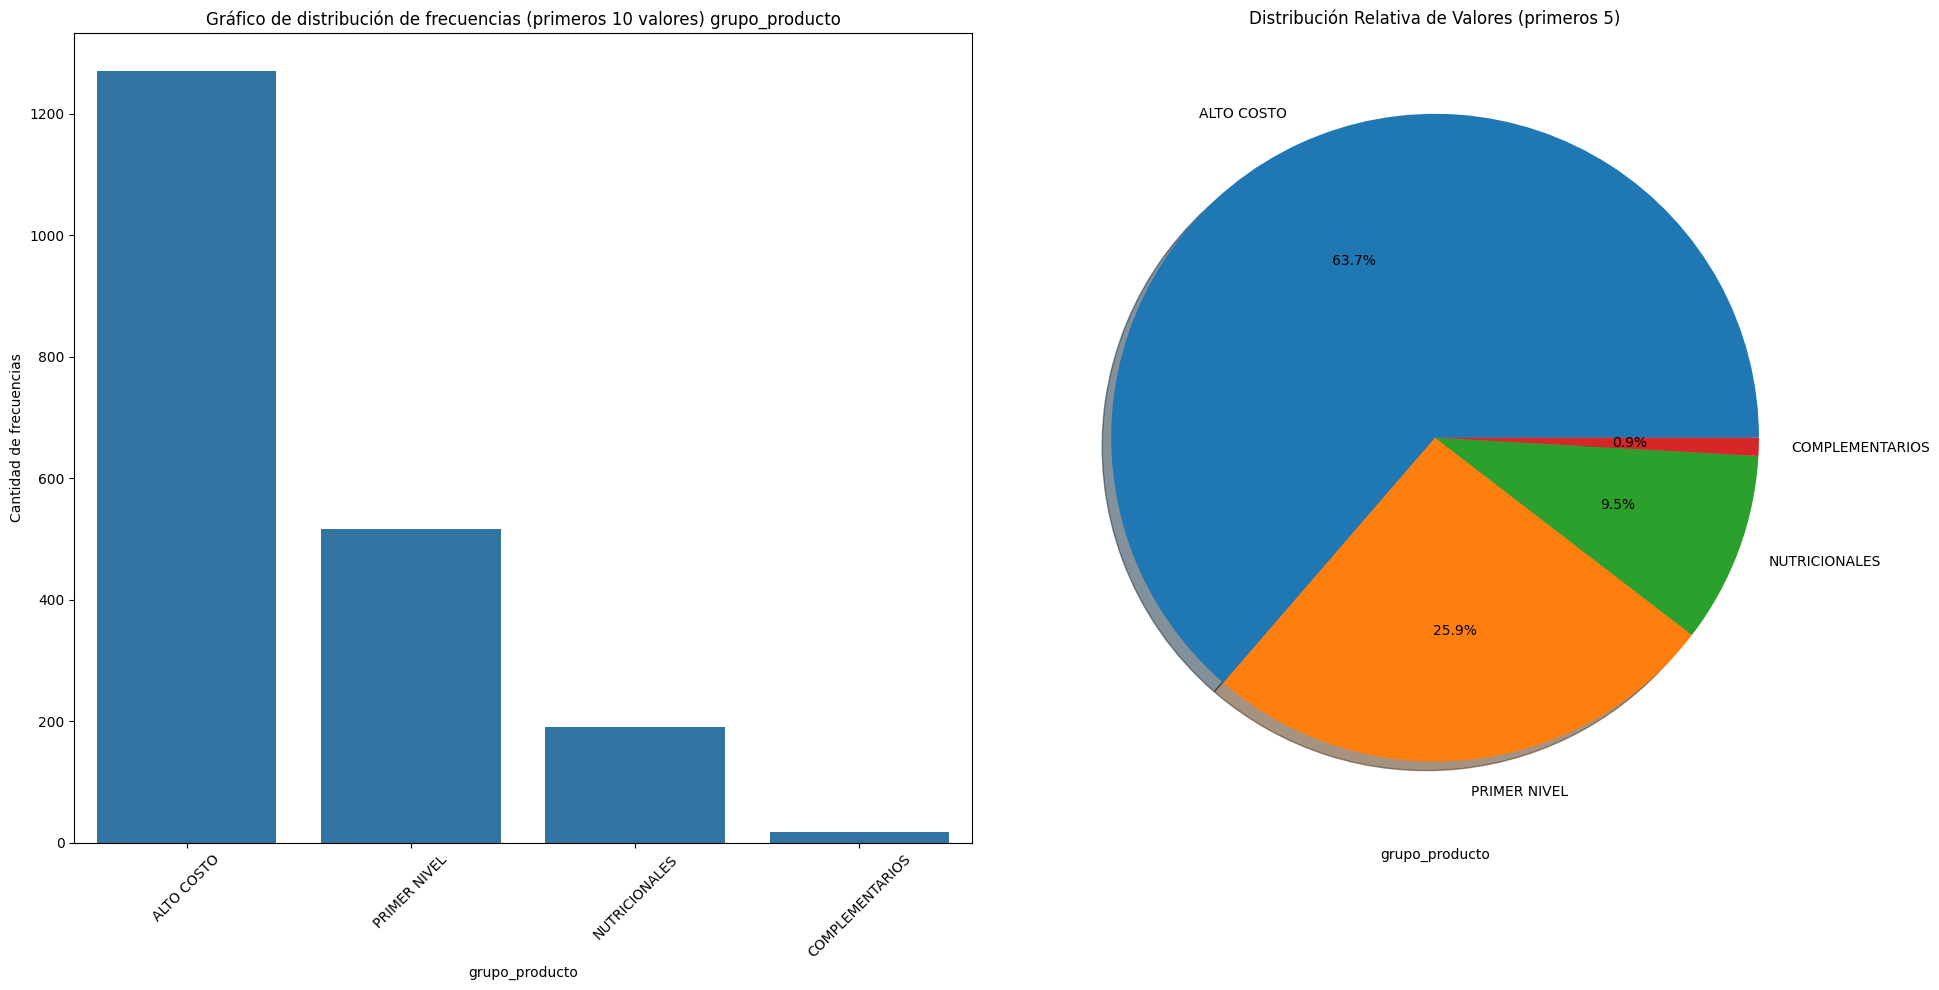



Estadísticas Básicas


count           1995
unique             4
top       ALTO COSTO
freq            1270
Name: grupo_producto, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




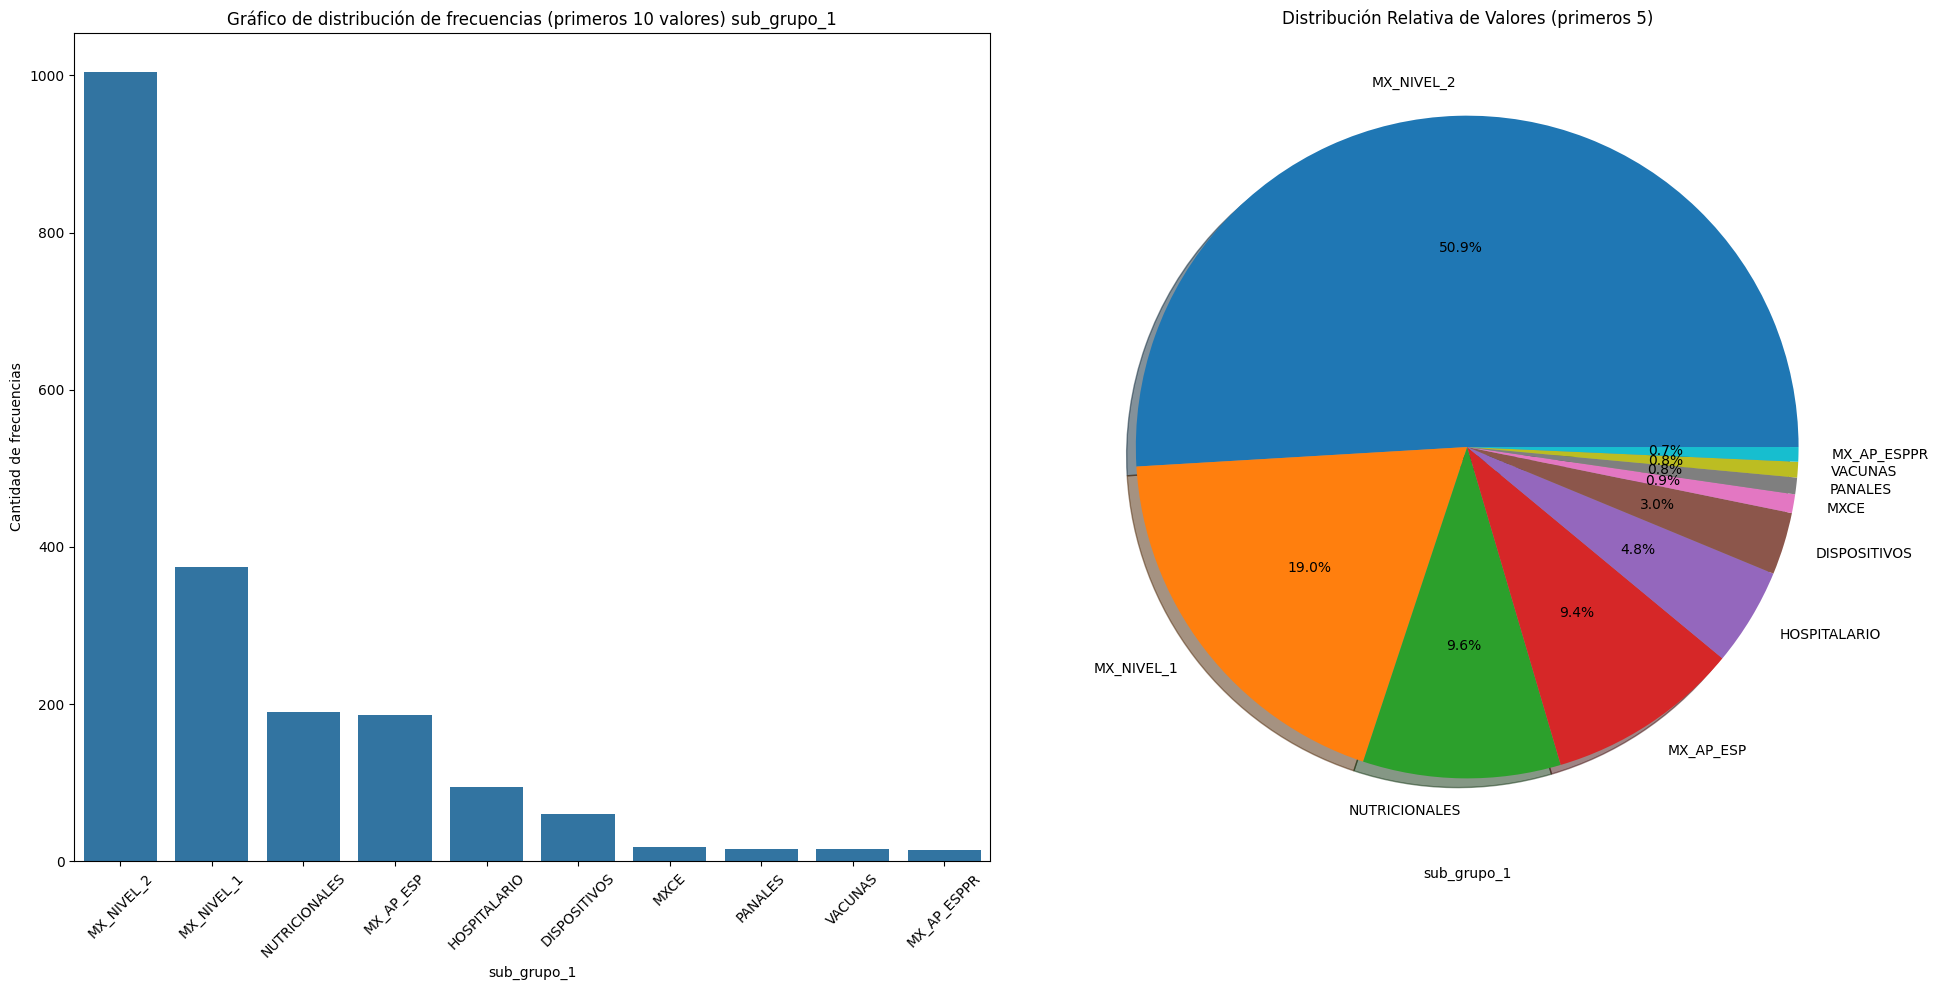



Estadísticas Básicas


count           1995
unique            14
top       MX_NIVEL_2
freq            1004
Name: sub_grupo_1, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




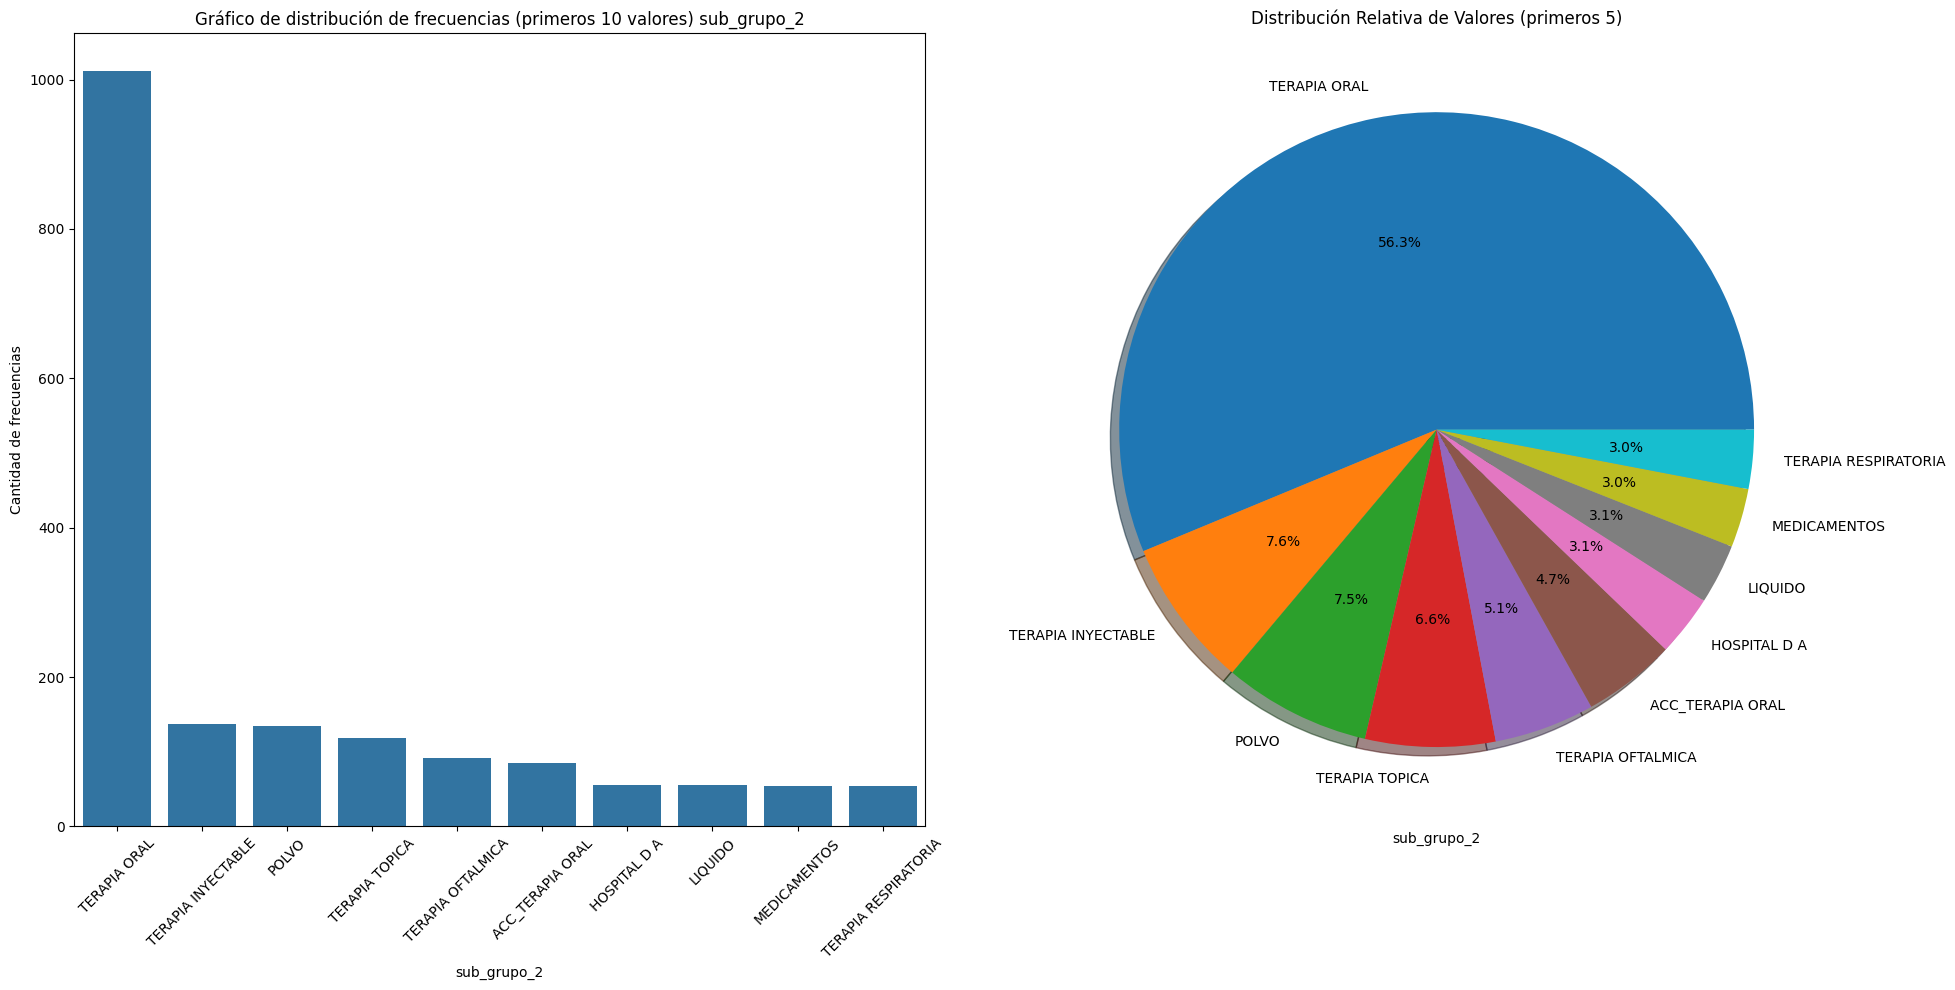



Estadísticas Básicas


count             1995
unique              26
top       TERAPIA ORAL
freq              1012
Name: sub_grupo_2, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




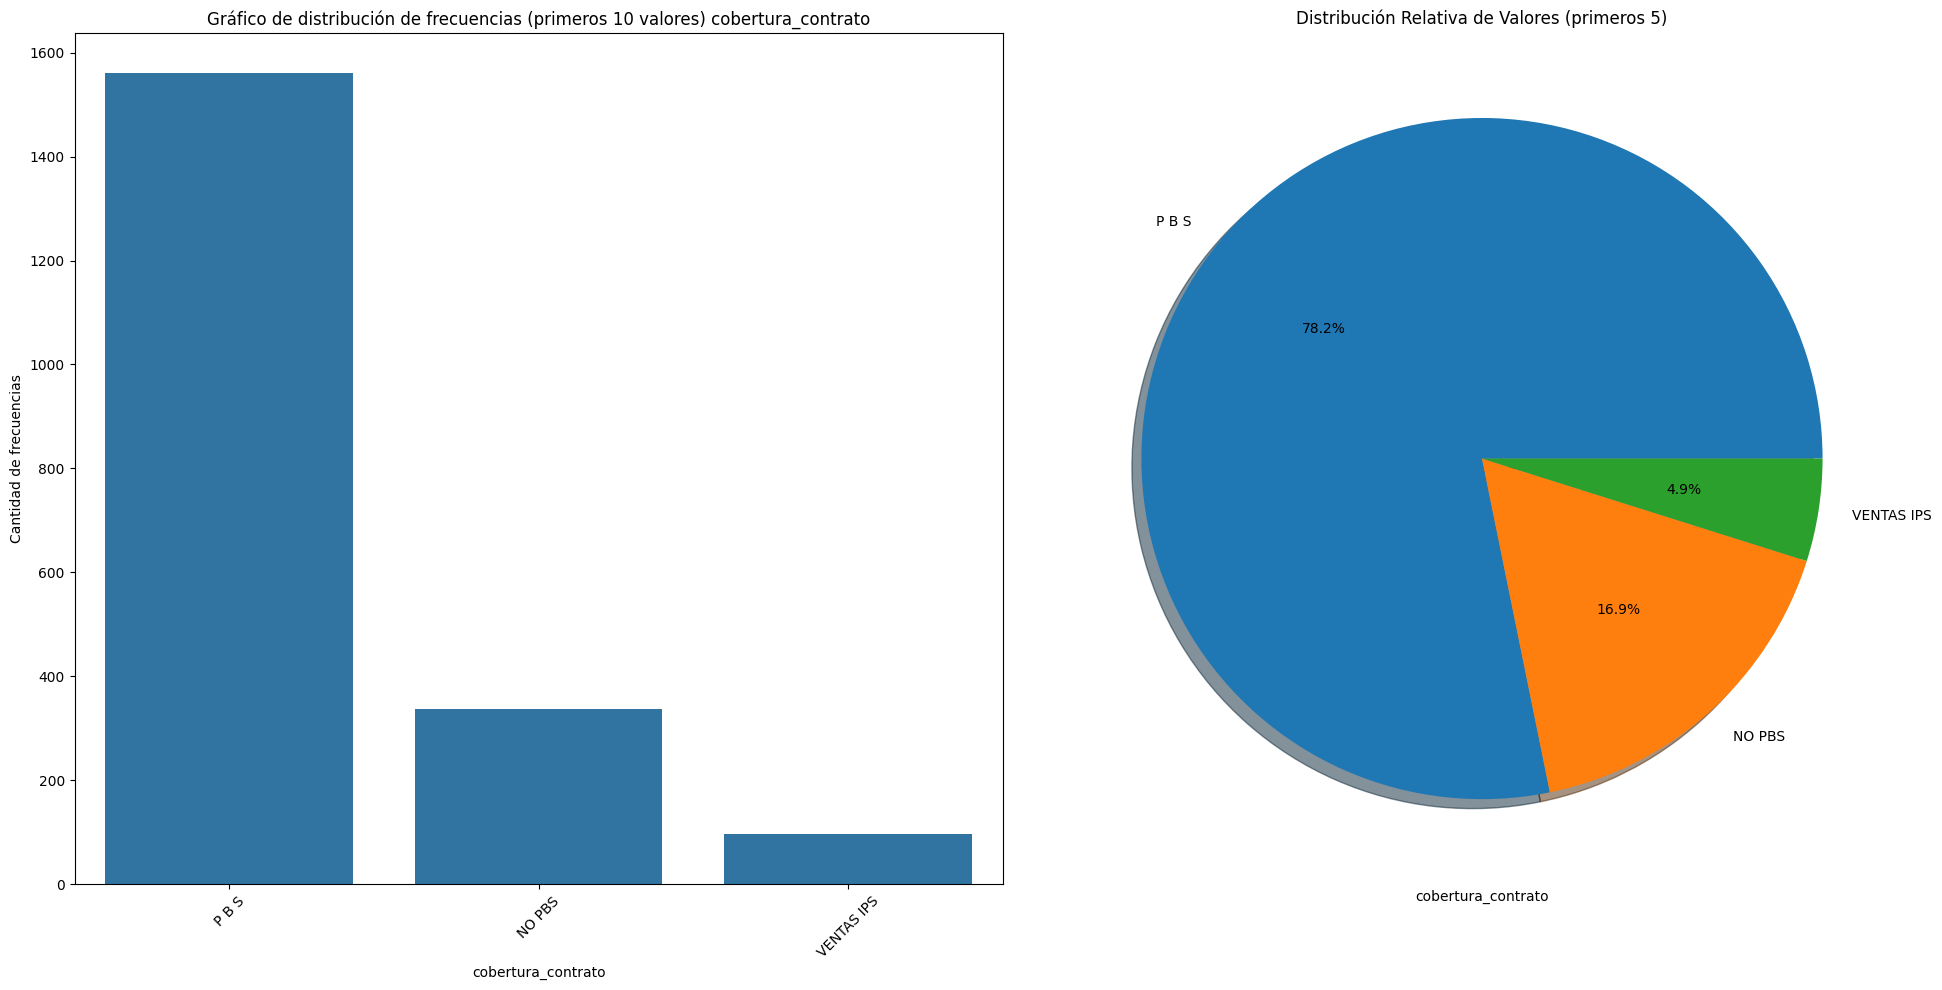



Estadísticas Básicas


count      1995
unique        3
top       P B S
freq       1560
Name: cobertura_contrato, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




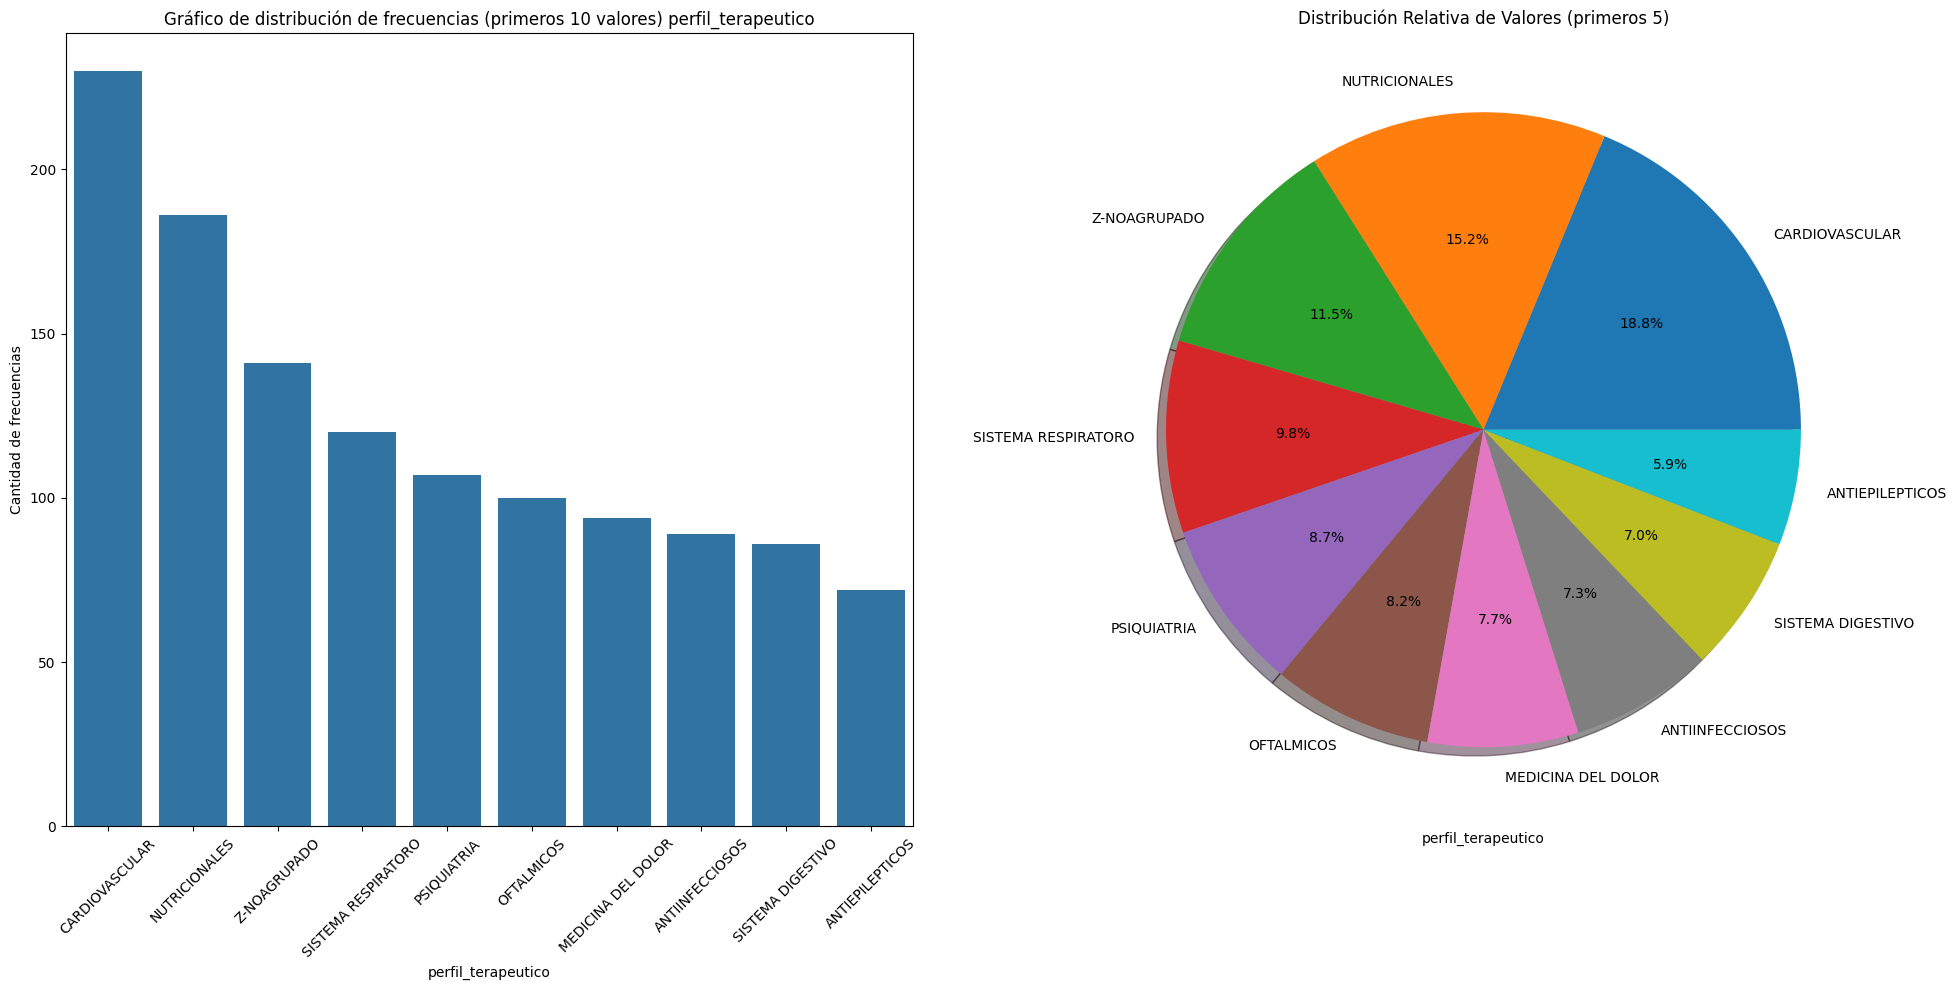



Estadísticas Básicas


count               1995
unique                48
top       CARDIOVASCULAR
freq                 230
Name: perfil_terapeutico, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




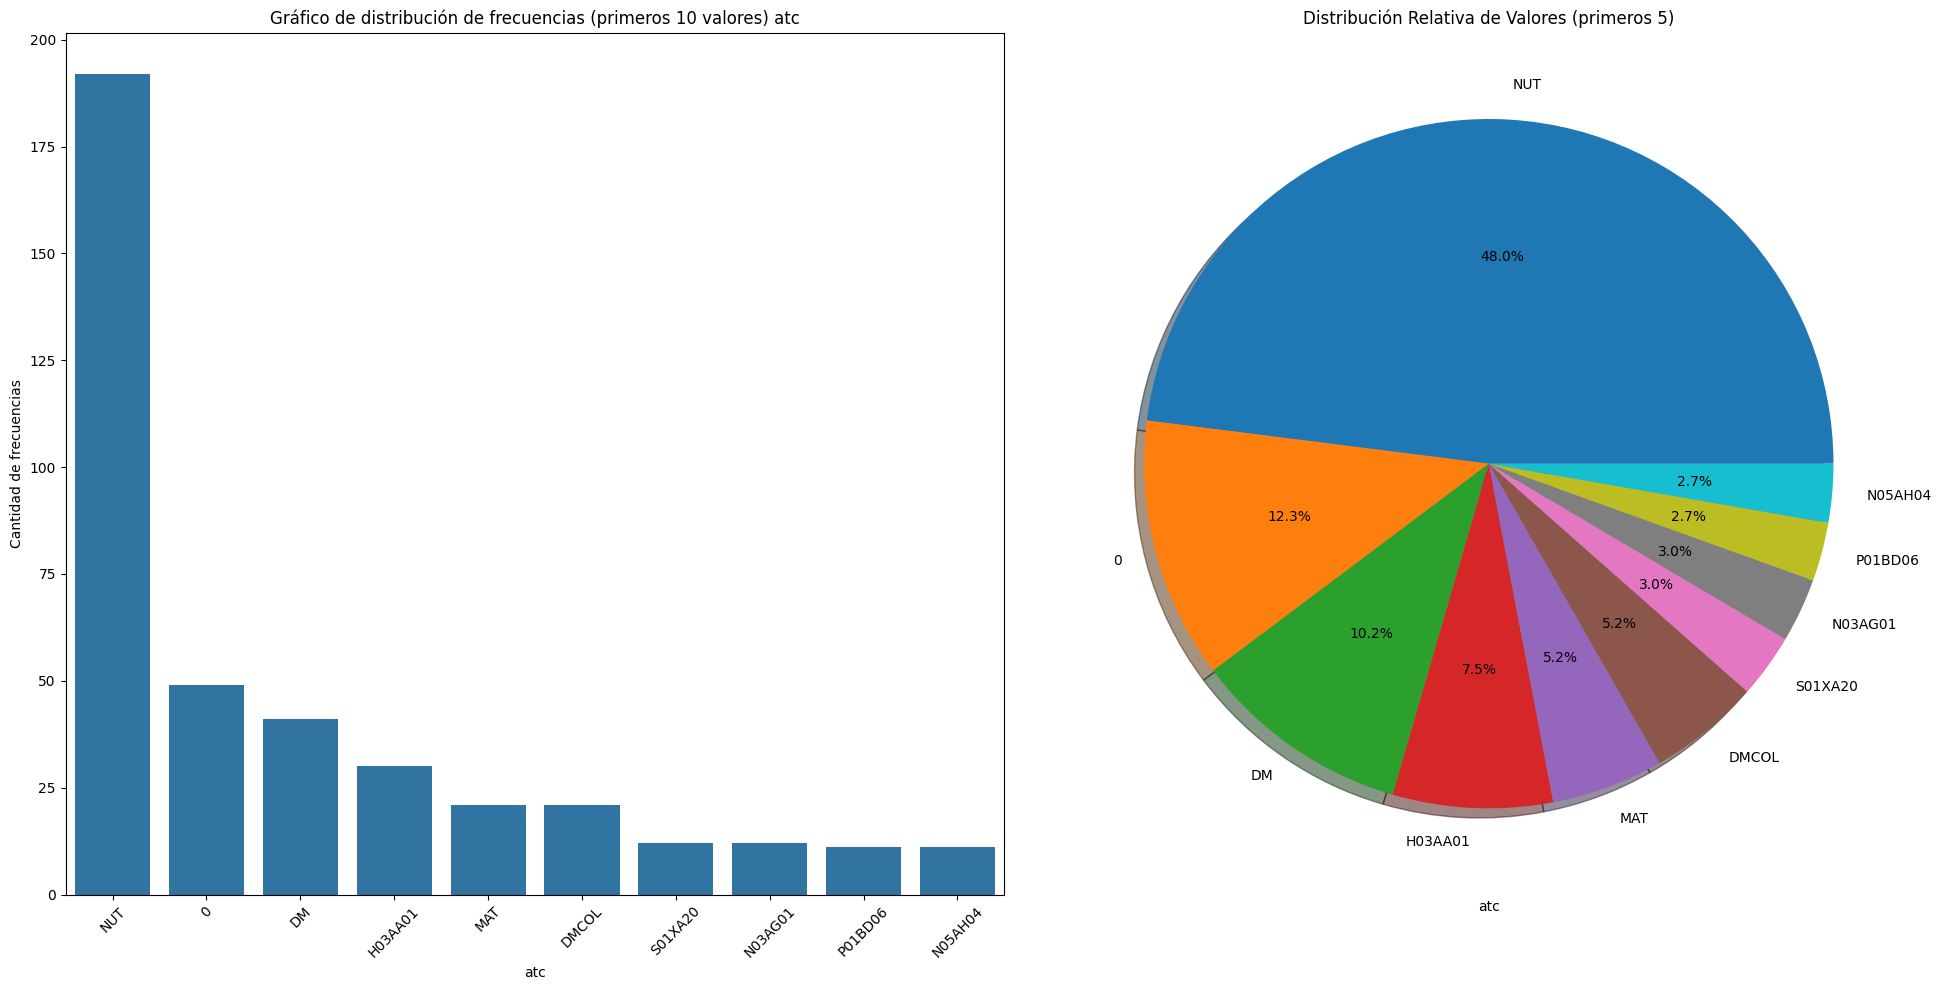



Estadísticas Básicas


count     1993
unique     817
top        NUT
freq       192
Name: atc, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




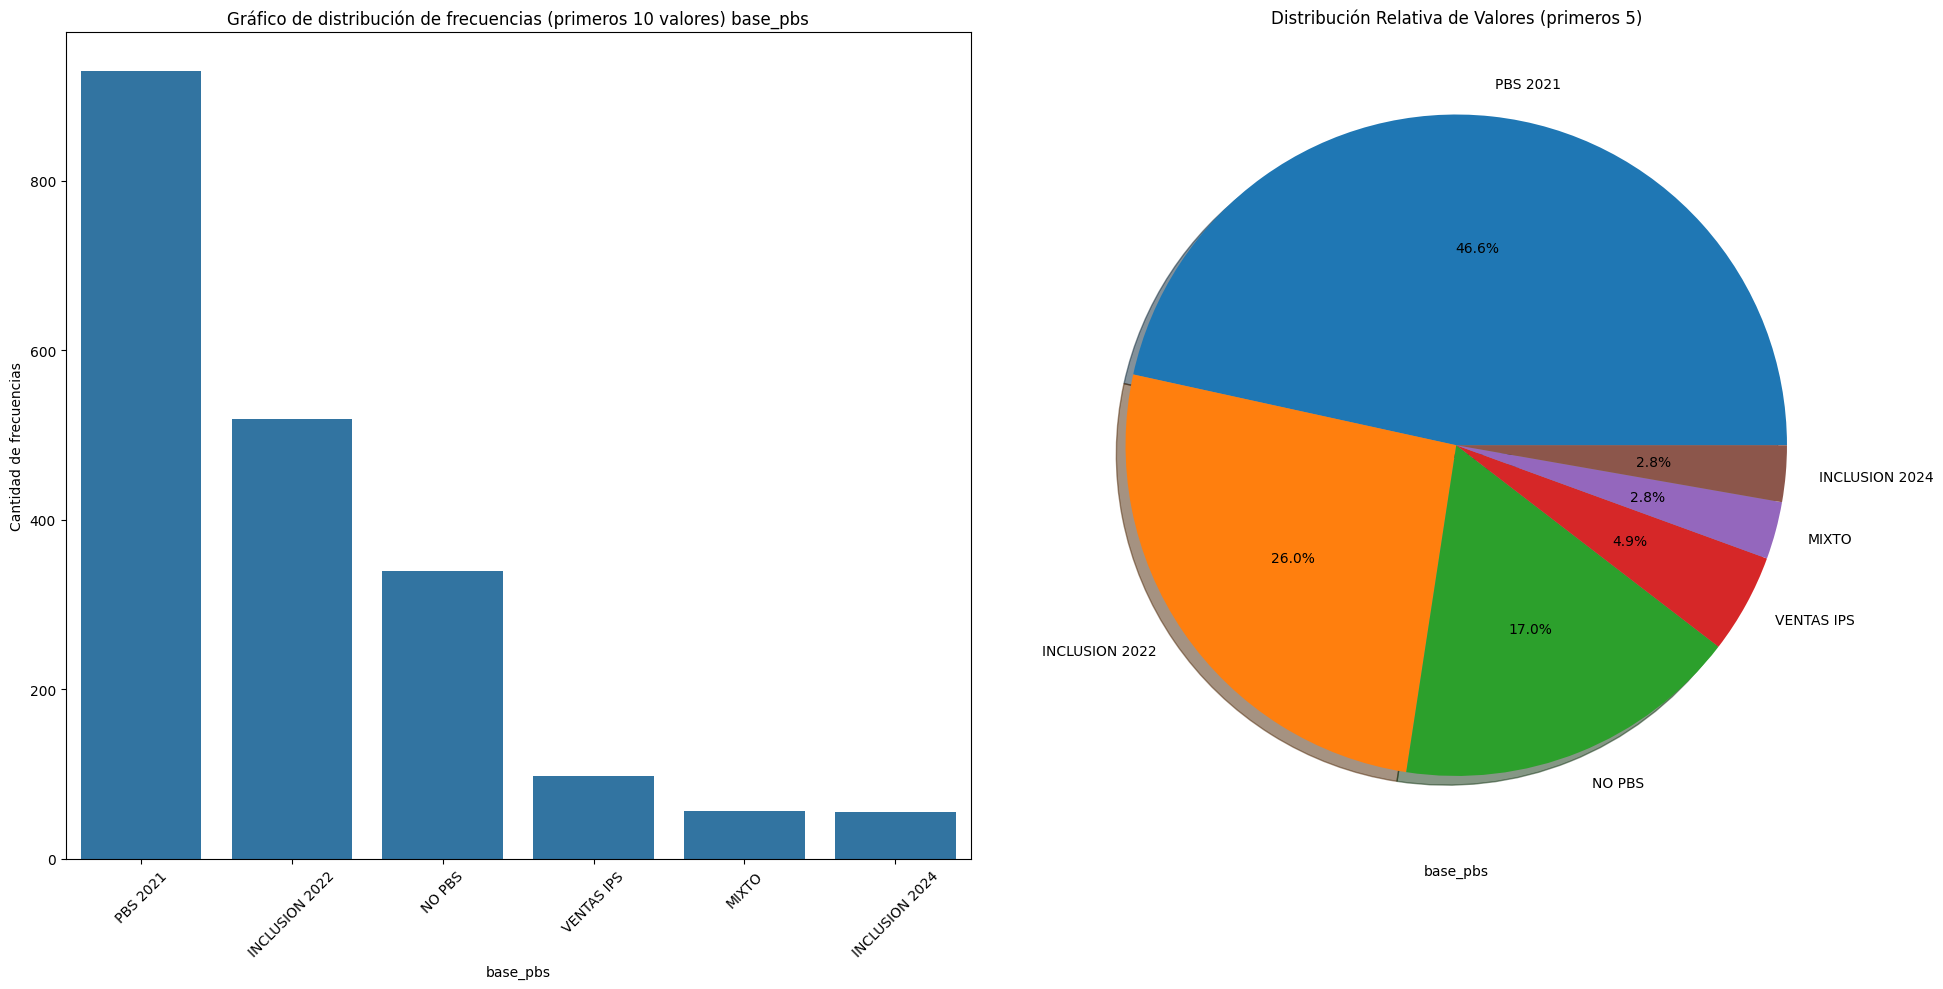



Estadísticas Básicas


count         1995
unique           6
top       PBS 2021
freq           929
Name: base_pbs, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




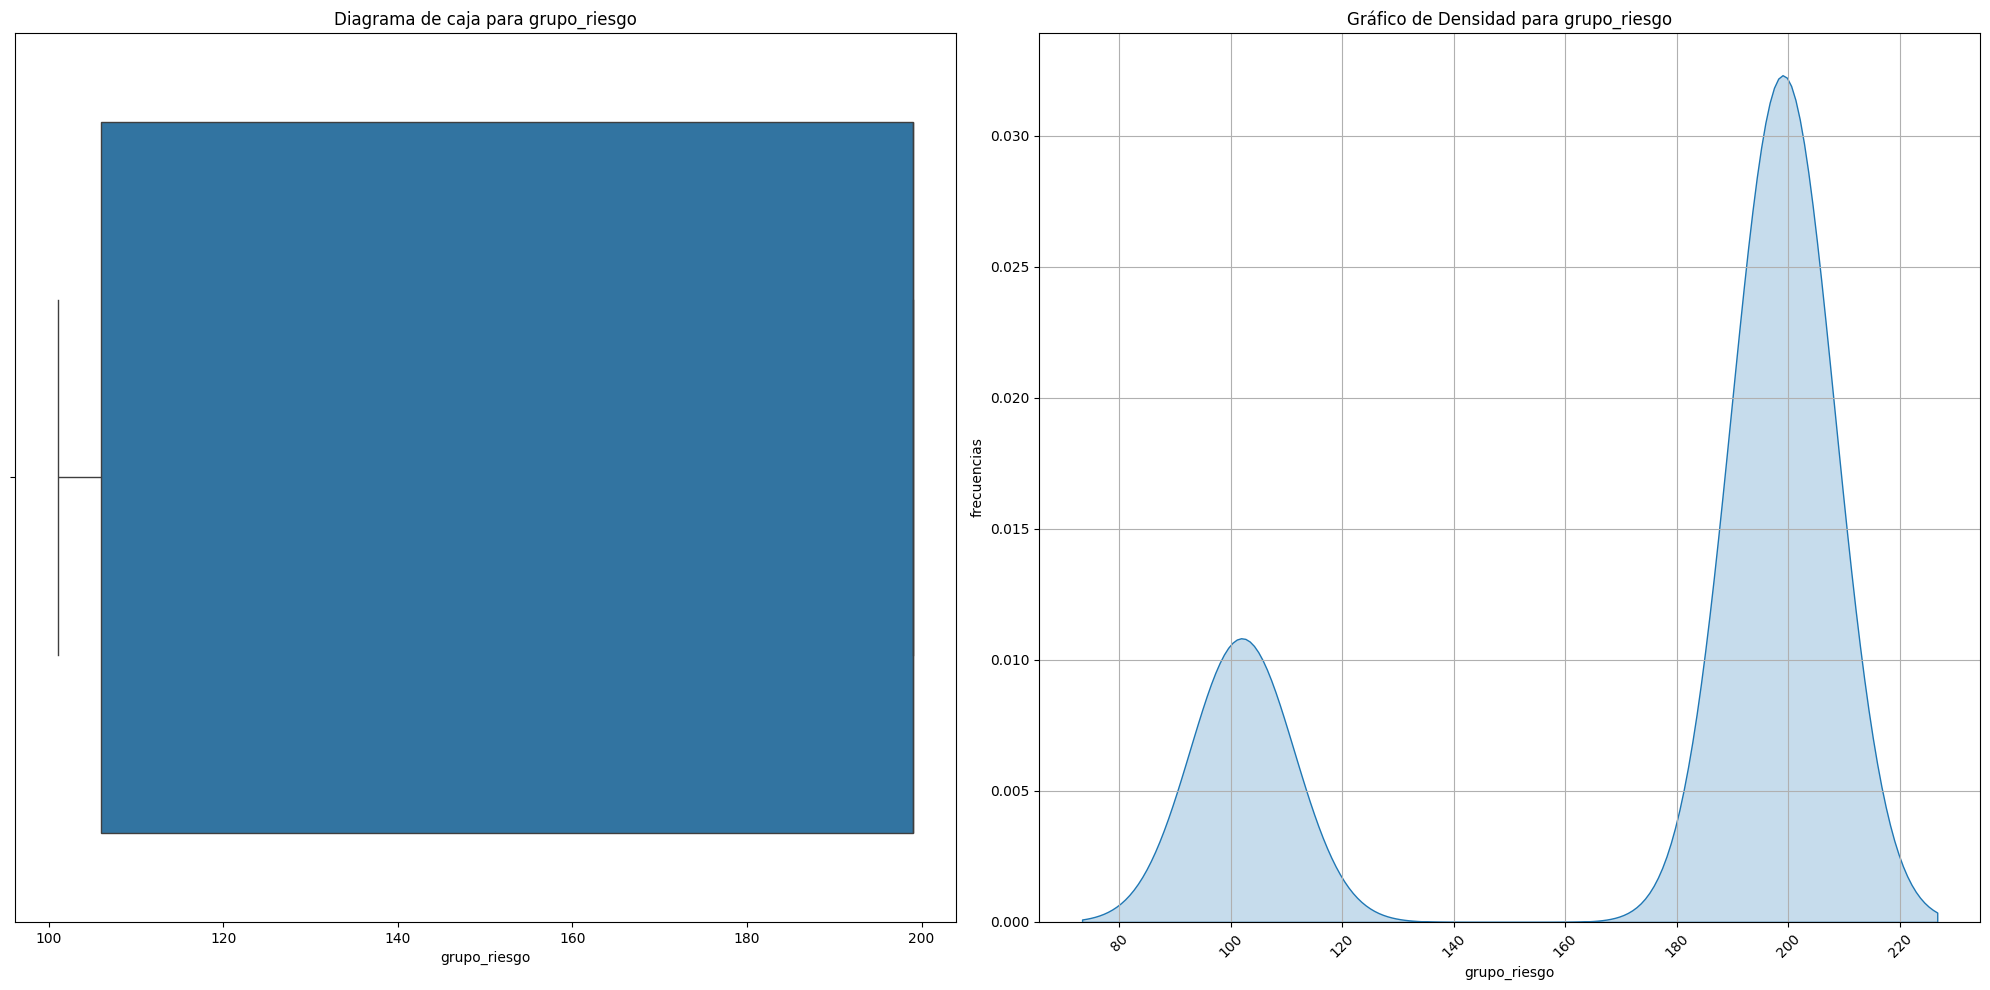



Estadísticas Básicas


count    1995.000000
mean      174.488221
std        42.174903
min       101.000000
25%       106.000000
50%       199.000000
75%       199.000000
max       199.000000
Name: grupo_riesgo, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
r.descripcion_distribucion(df_productos)

### Sucursales

In [ ]:
df_sucursales.head()

id_sucursal nombre_sucursal nombre_operador          zona      ruta  codmunic tiposuc
0         1001         BARANOA       SEMEDICAL    MUNICIPIOS   CORDIAL      8078       A
1         1003          BOSQUE       SEMEDICAL  BARRANQUILLA  B/QUILLA      8001       X
2         1004         LURUACO       SEMEDICAL    MUNICIPIOS   CORDIAL      8421       B
3         1005         MALAMBO       SEMEDICAL    MUNICIPIOS  ORIENTAL      8433       B
4         1006          MANATI       SEMEDICAL    MUNICIPIOS   CORDIAL      8436       C

#### Informe General

In [ ]:
r.informe_dataframe(df_sucursales)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 34
Columnas: 7

--Numero de datos--
238

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 33
Columnas: ['id_sucursal', 'nombre_sucursal', 'nombre_operador', 'zona', 'ruta', 'codmunic', 'tiposuc']

--Tipo de columnas--
id_sucursal         int64
nombre_sucursal    object
nombre_operador    object
zona               object
ruta               object
codmunic            int64
tiposuc            object
dtype: object
--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [ ]:
r.verificar_tipo_datos(df_sucursales)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0      id_sucursal  [<class 'int'>]       100.0      0.0      0
1  nombre_sucursal  [<class 'str'>]       100.0      0.0      0
2  nombre_operador  [<class 'str'>]       100.0      0.0      0
3             zona  [<class 'str'>]       100.0      0.0      0
4             ruta  [<class 'str'>]       100.0      0.0      0
5         codmunic  [<class 'int'>]       100.0      0.0      0
6          tiposuc  [<class 'str'>]       100.0      0.0      0

#### Informe Particular

In [ ]:
for column in df_sucursales.columns:
    r.informe_columna(df_sucursales, column)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE id_sucursal:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [1001 1003 1004 1005 1006]  -----> Desde 1001  Hasta 1023

--Estadisticos Principales de la columna--
Media: 1018.0
Desviacion Estandar: 10.72
Primer cuartil: 1009.25
Mediana: 1017.5
Tercer cuartil: 1025.75

--Valores extremos--
Valor maximo: 1037
Valor minimo: 1001

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 id_sucursal
1001    1
1030    1
1024    1
Name: count, dtype: int64

--Valor maximo y minimo--
Maximo: 1037
Minimo: 1001

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE nombre_sucursal:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
32

--Valores unicos e

#### Informe Descriptivo

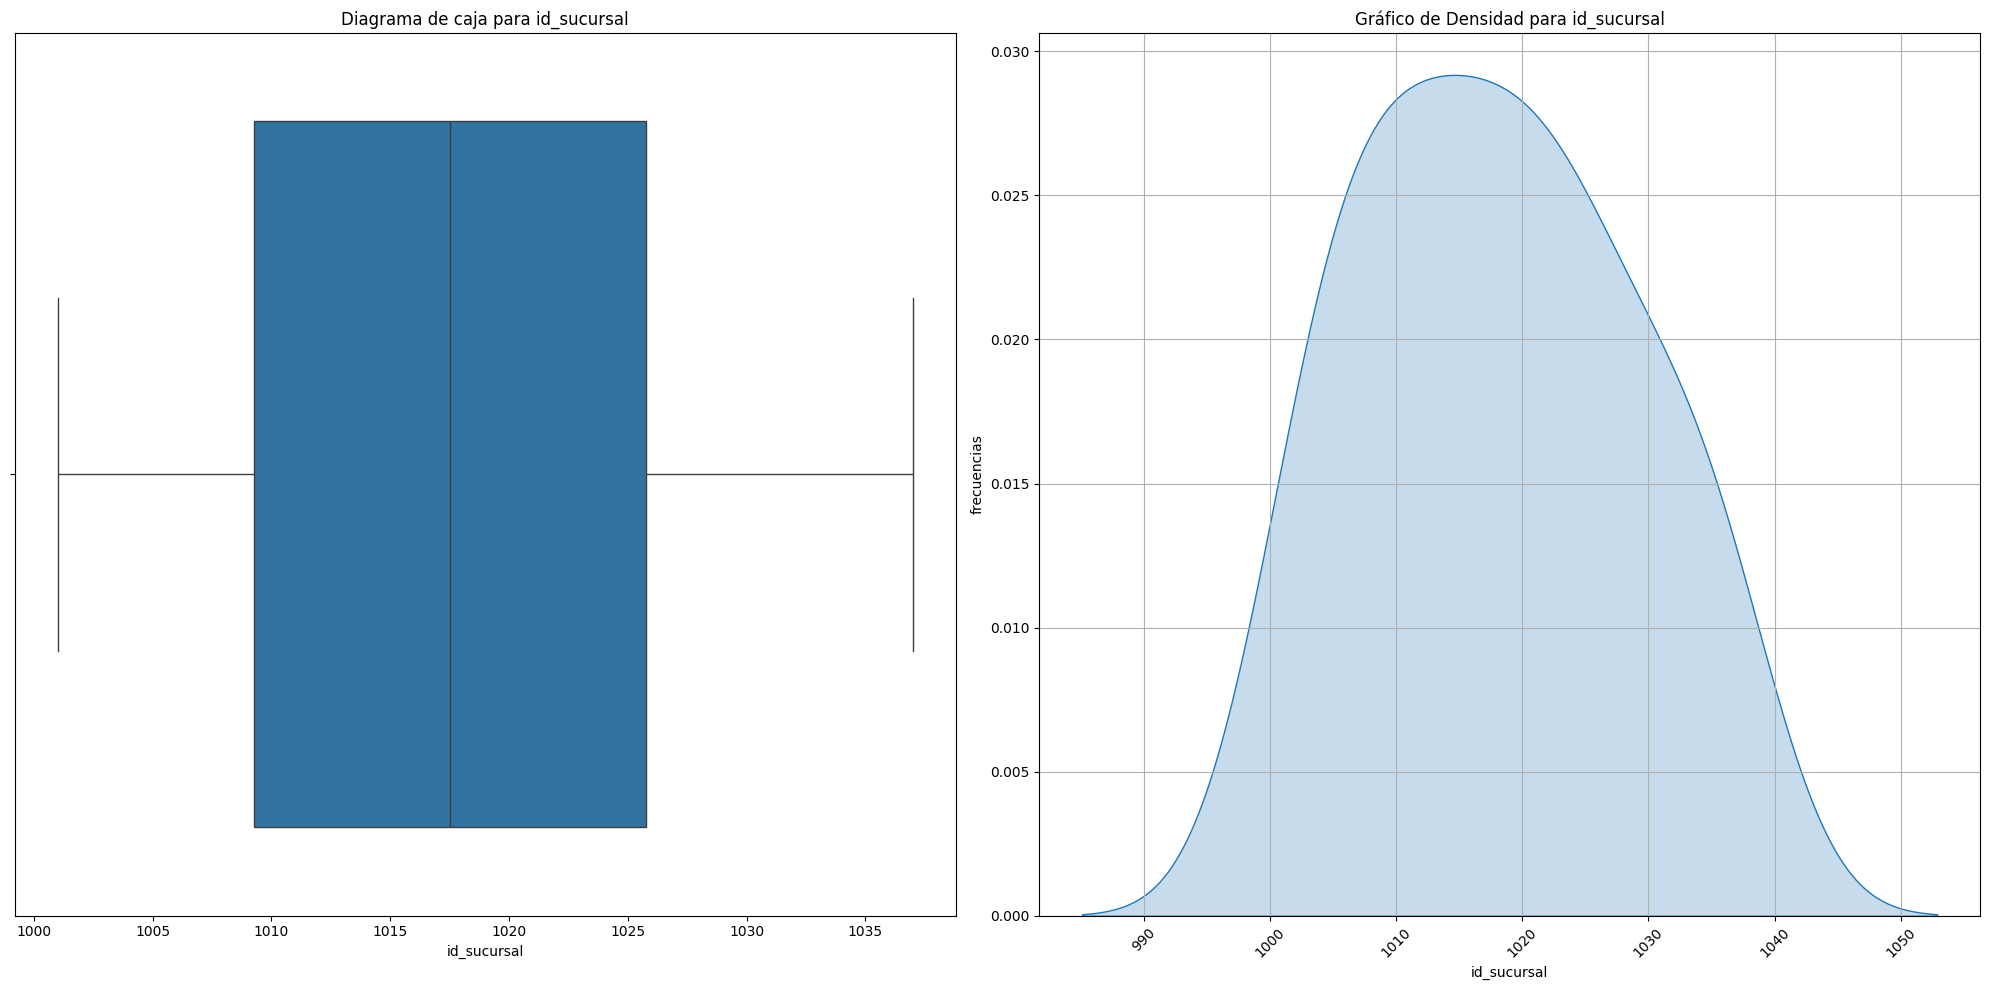



Estadísticas Básicas


count      34.000000
mean     1018.000000
std        10.716739
min      1001.000000
25%      1009.250000
50%      1017.500000
75%      1025.750000
max      1037.000000
Name: id_sucursal, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




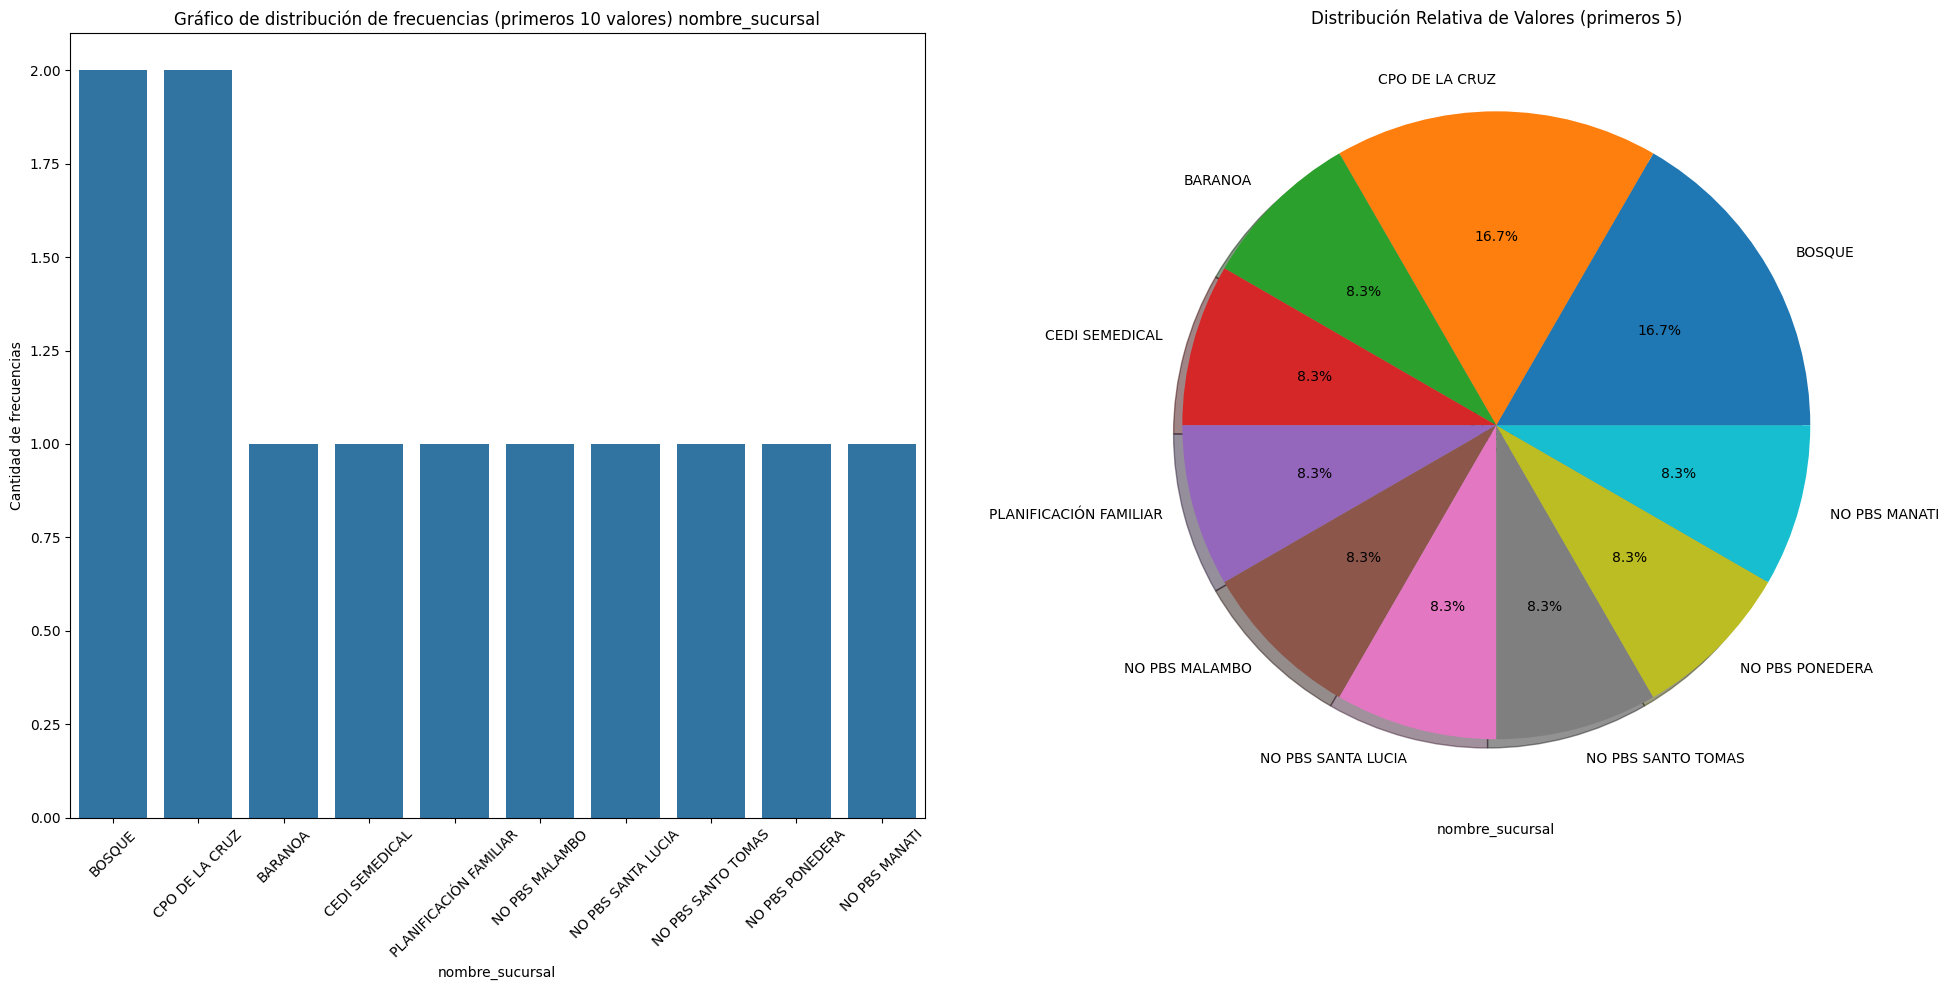



Estadísticas Básicas


count         34
unique        32
top       BOSQUE
freq           2
Name: nombre_sucursal, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




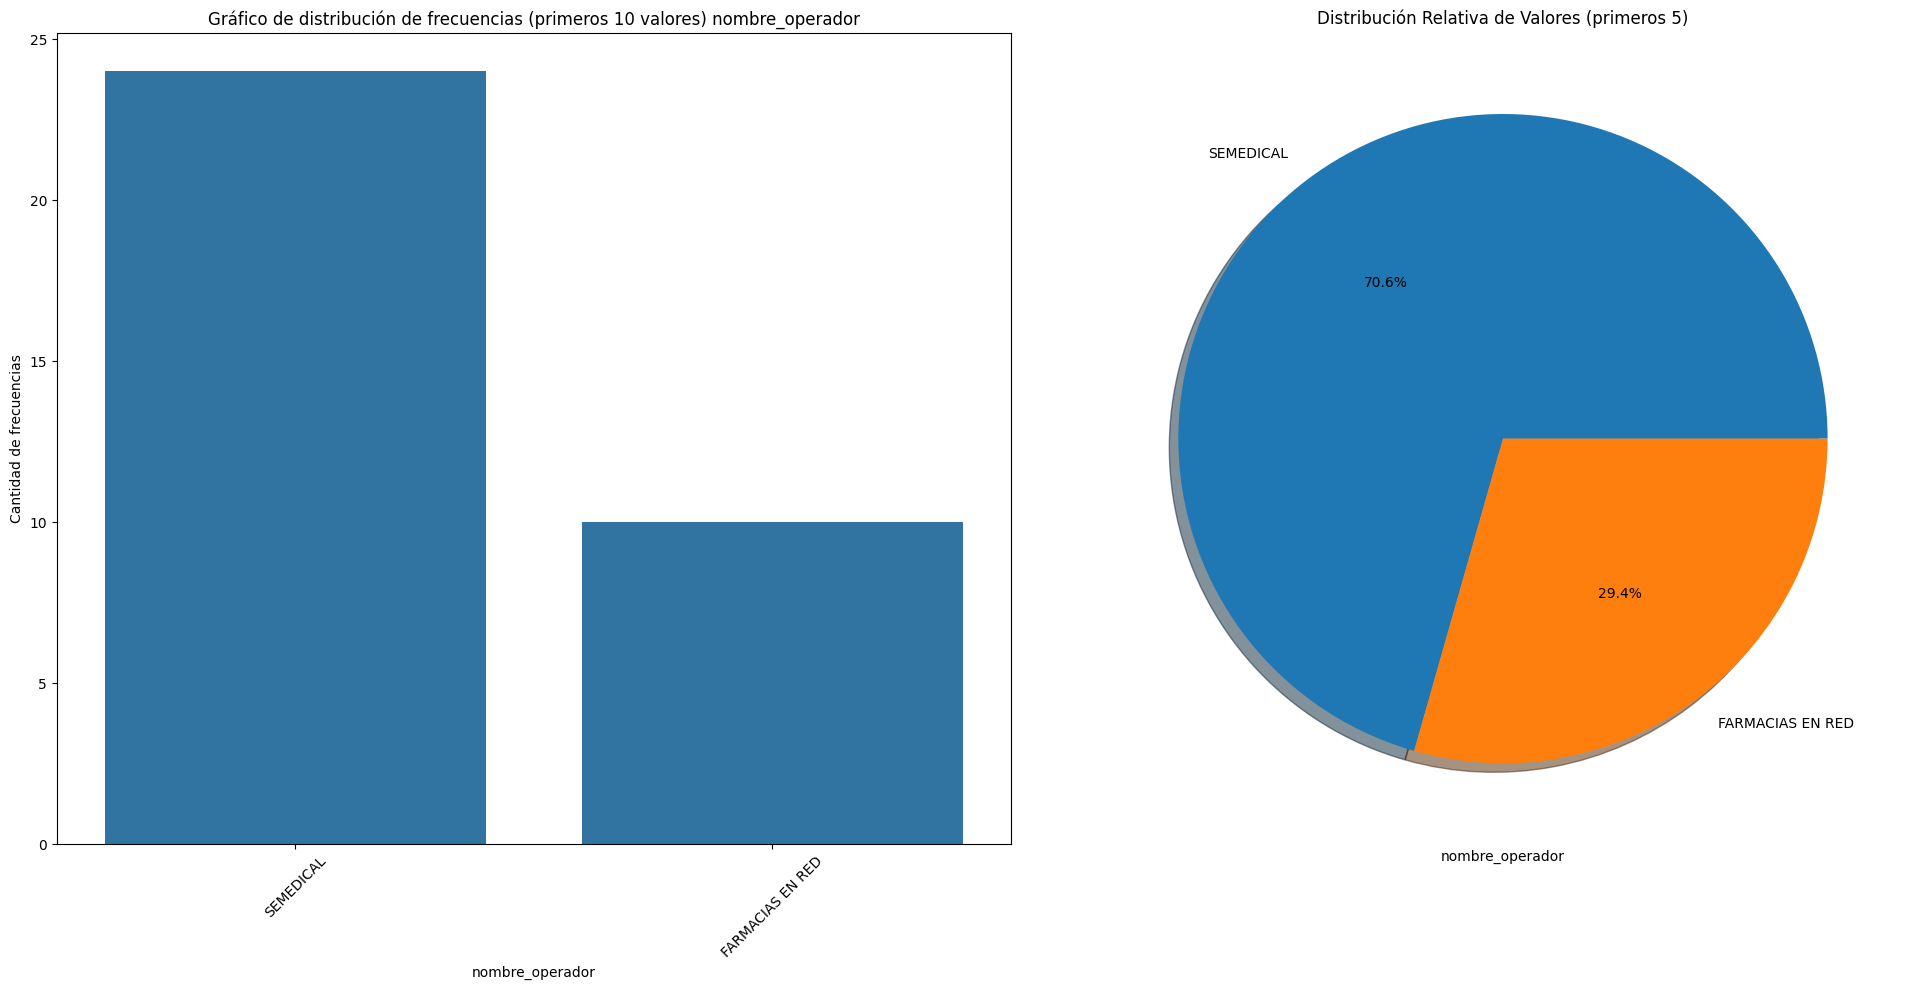



Estadísticas Básicas


count            34
unique            2
top       SEMEDICAL
freq             24
Name: nombre_operador, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




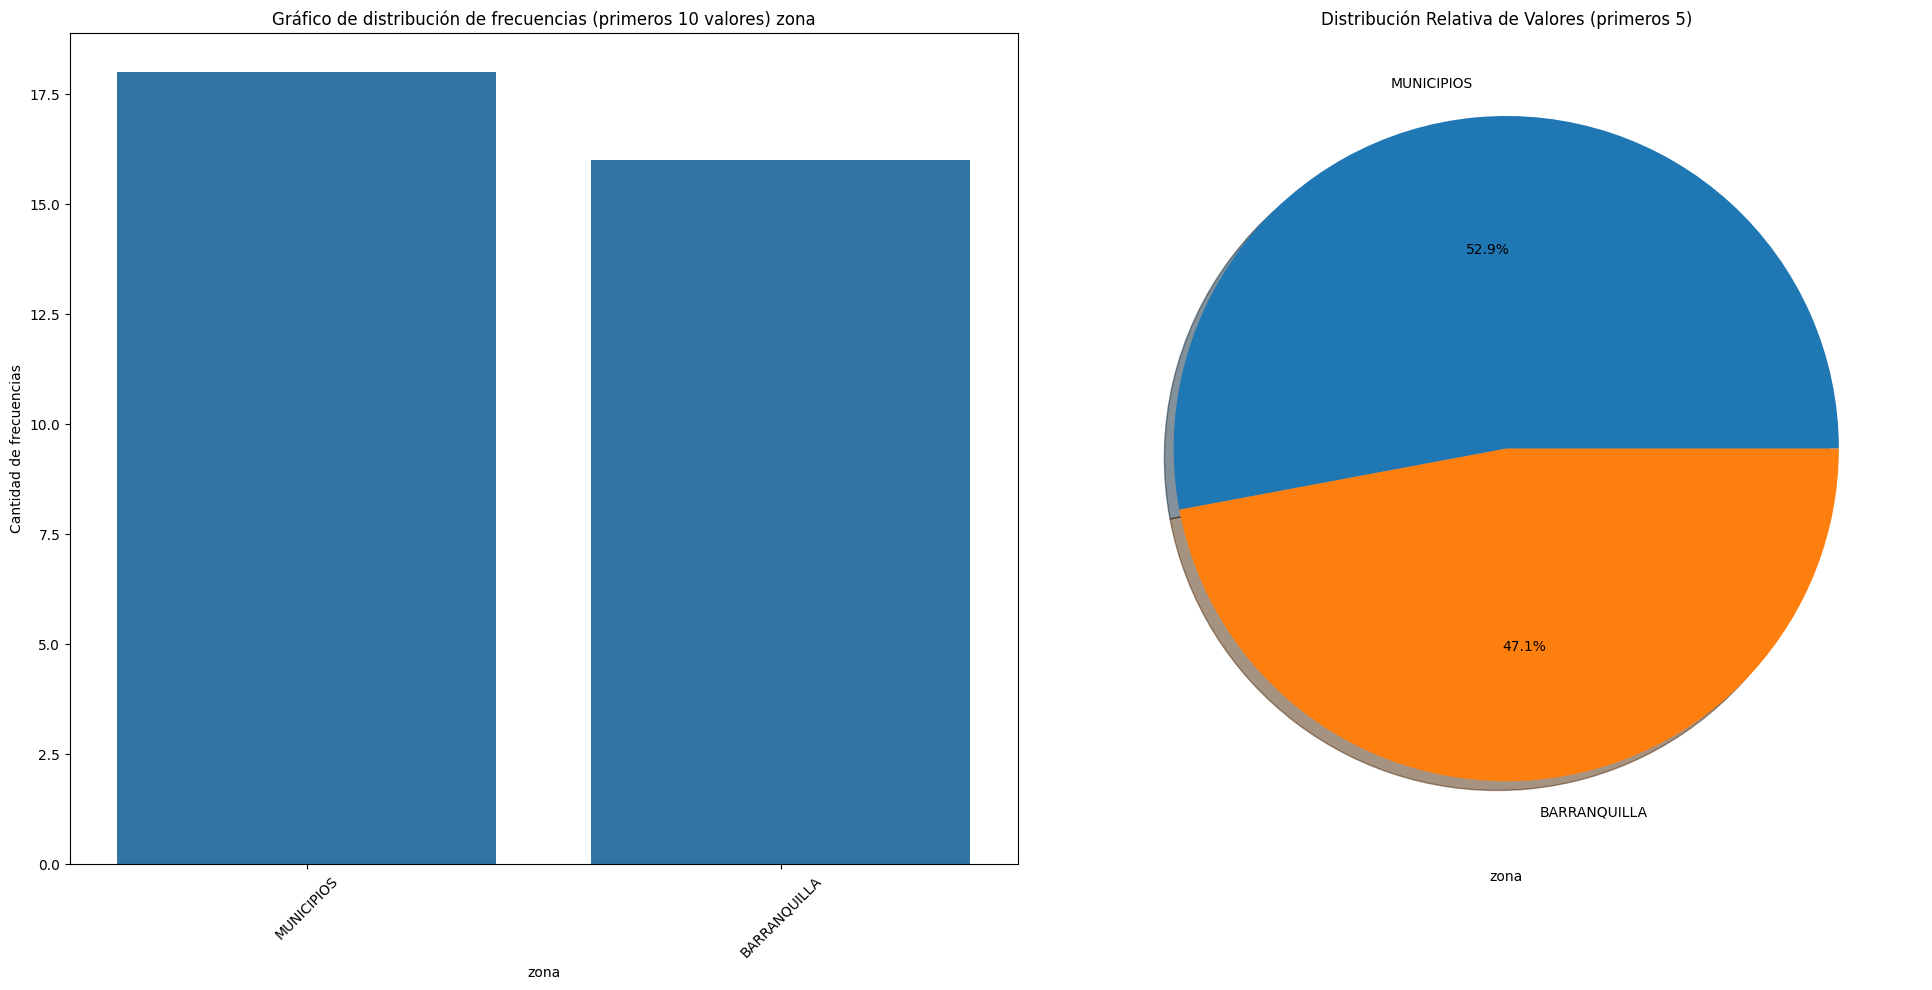



Estadísticas Básicas


count             34
unique             2
top       MUNICIPIOS
freq              18
Name: zona, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




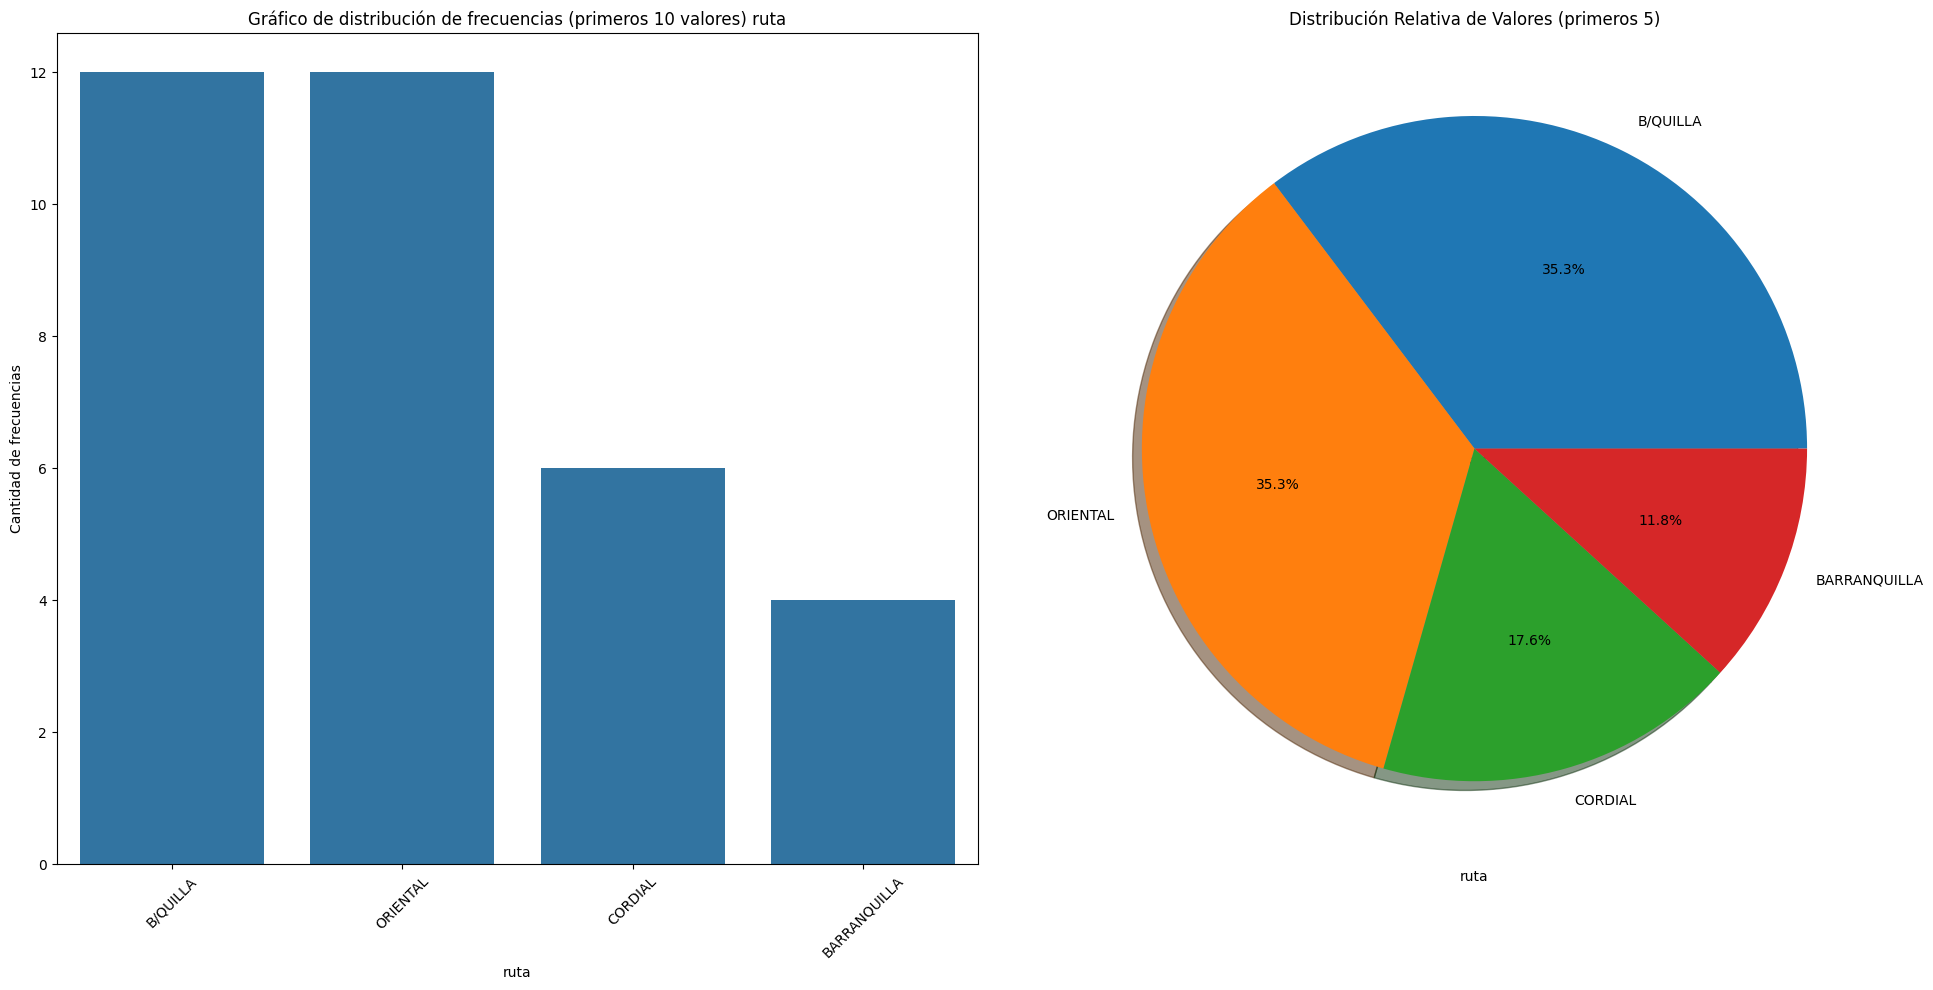



Estadísticas Básicas


count           34
unique           4
top       B/QUILLA
freq            12
Name: ruta, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




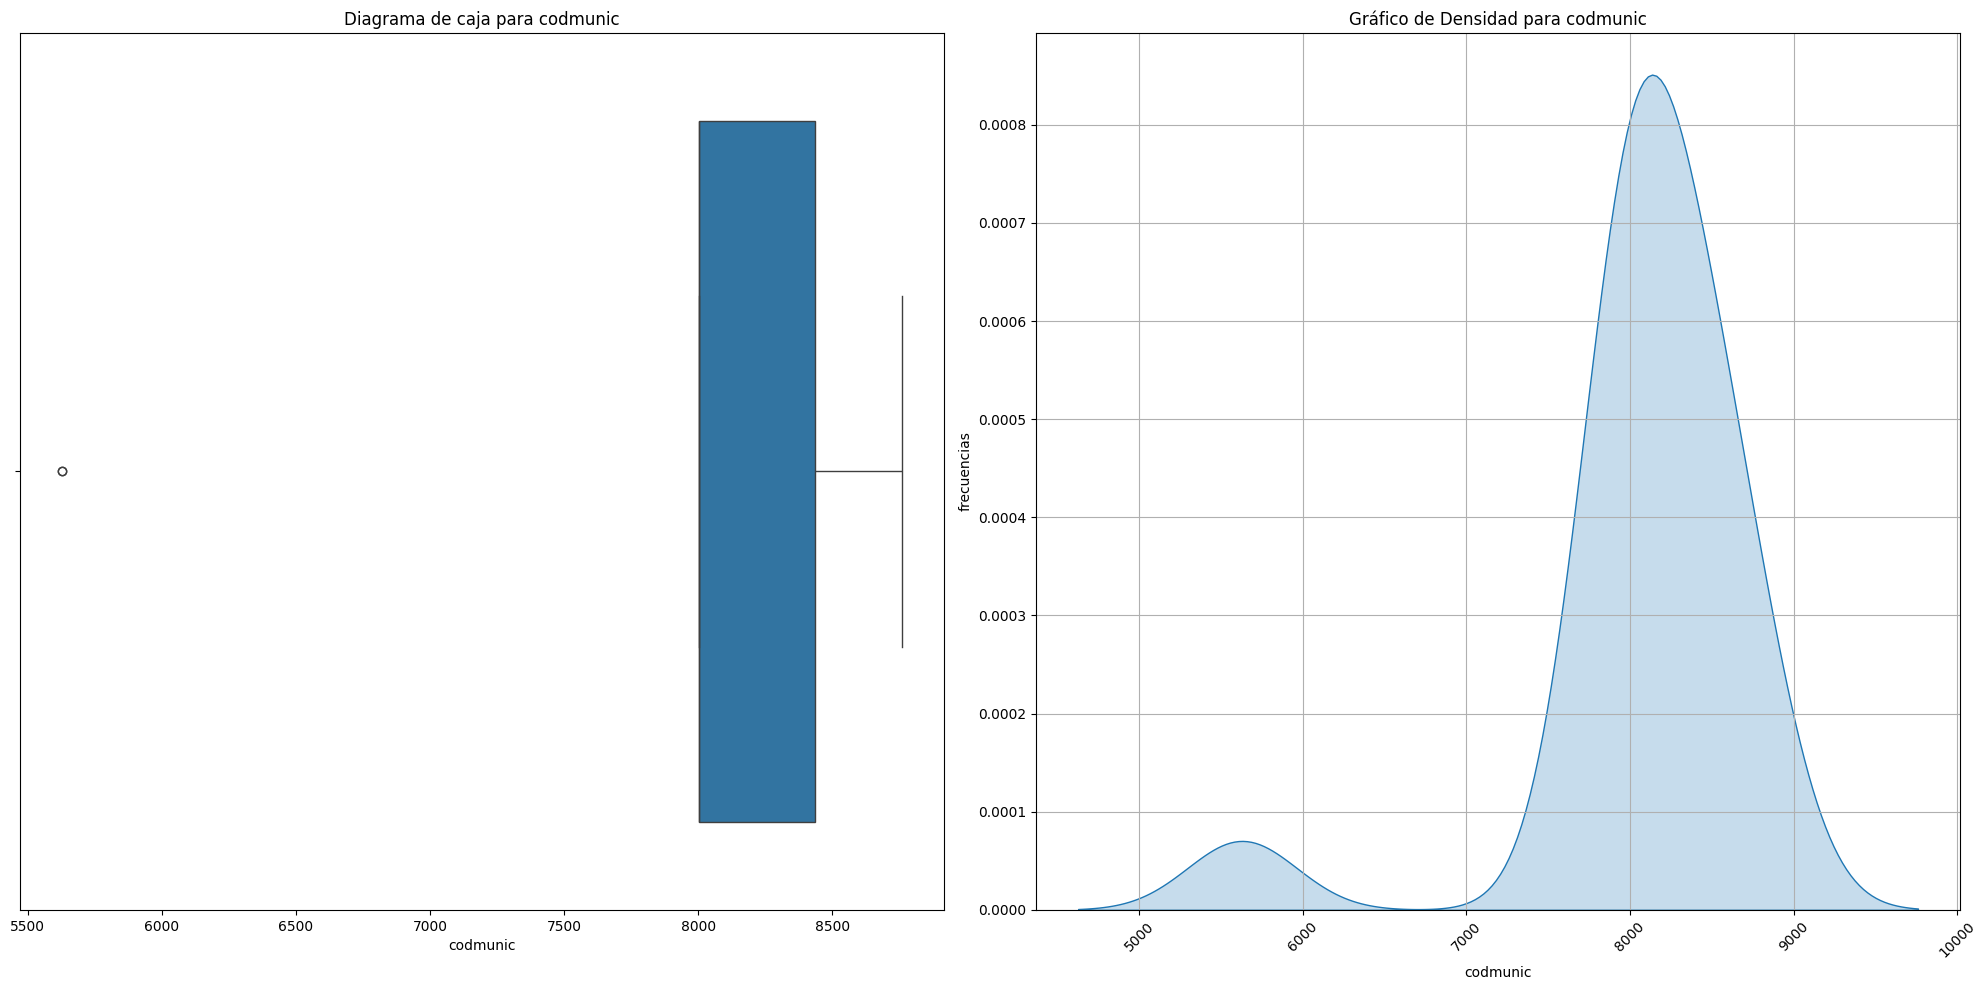



Estadísticas Básicas


count      34.000000
mean     8074.058824
std       676.724954
min      5628.000000
25%      8001.000000
50%      8001.000000
75%      8435.250000
max      8758.000000
Name: codmunic, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




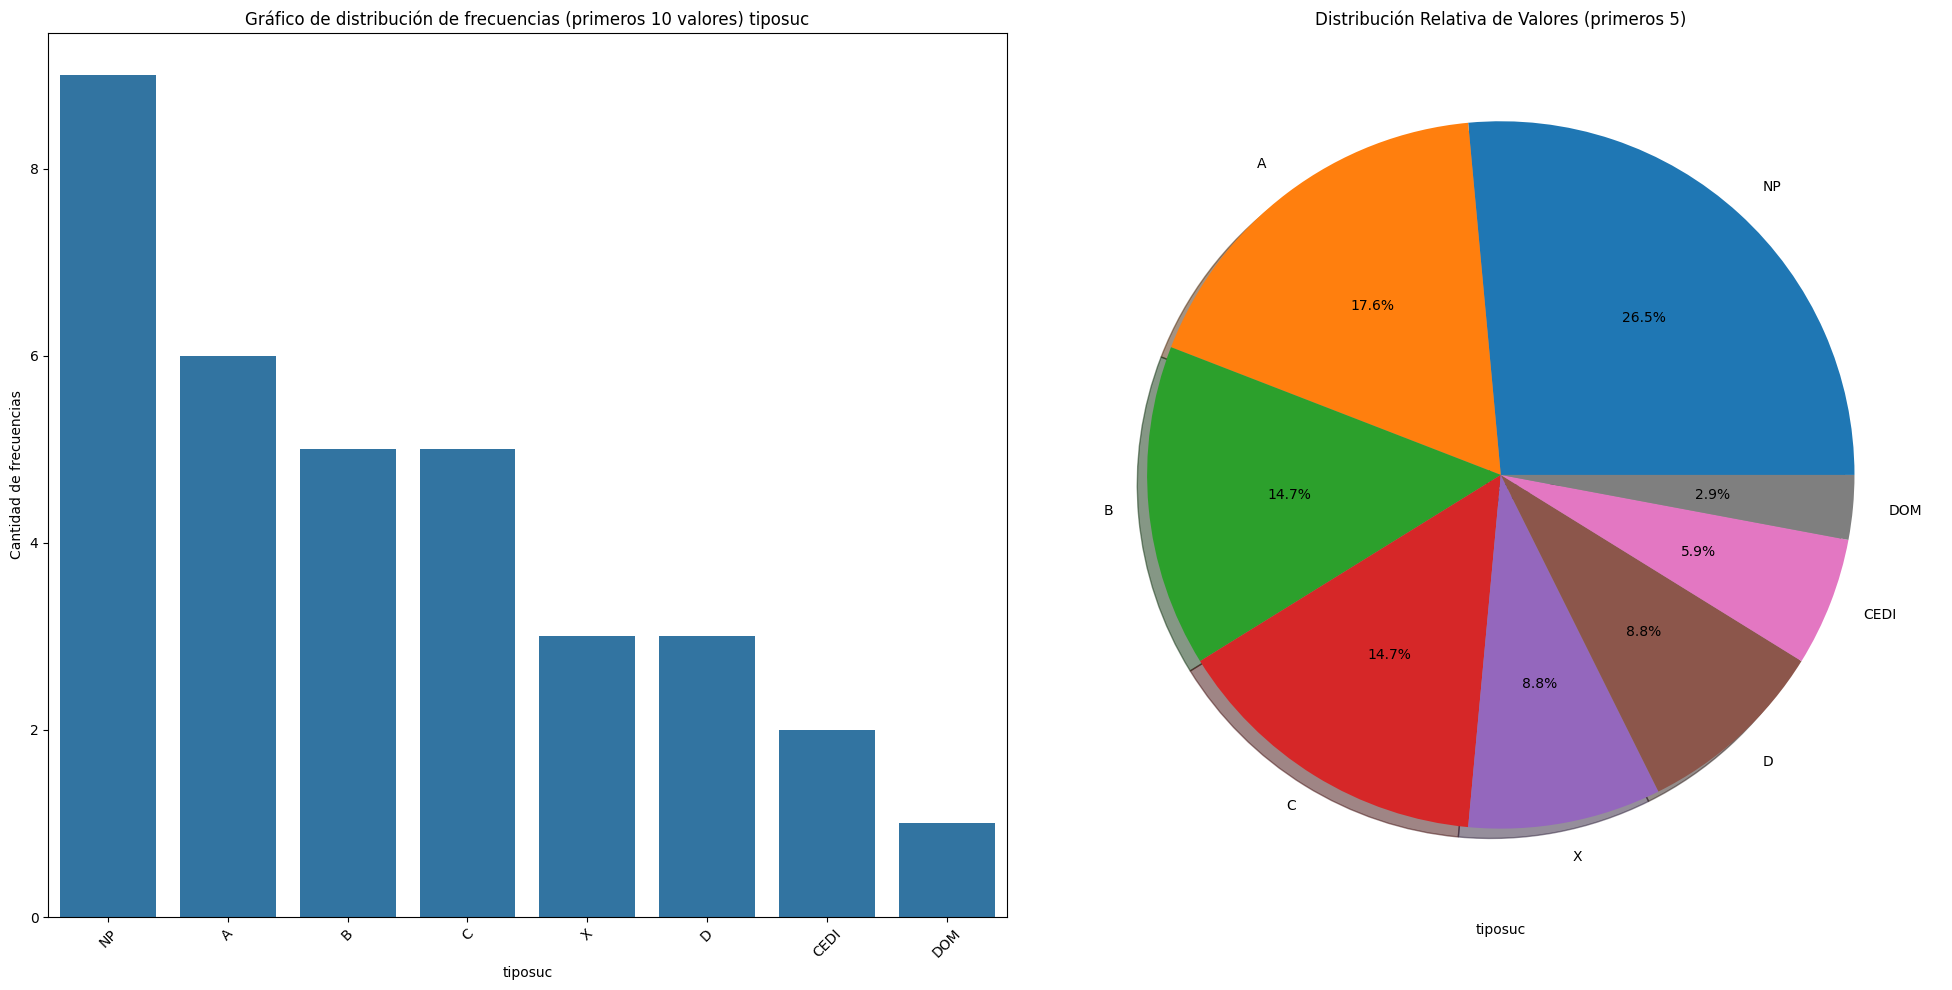



Estadísticas Básicas


count     34
unique     8
top       NP
freq       9
Name: tiposuc, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
r.descripcion_distribucion(df_sucursales)

### Usuarios

In [ ]:
df_usuarios.head()

id_paciente tipoid              nombre_completo  fechanacim  edad
0  1001799609     TI  Aaron Aaron Escobar Barrera  2001-11-14  23.0
1  1001799768     TI    Aaron Aaron Flores Torres  2001-11-17  23.0
2  1001799934     TI     Aaron Aaron Franco Ayala  2002-06-20  22.0
3  1001800099     CC  Aaron Aaron Hurtado Estrada  1996-11-05  28.0
4  1001800288     TI    Aaron Aaron Macías Zavala  2002-06-06  22.0

Observaciones


*   Se presentan algunos valores nan y None en las columnas "fechanacim" y "edad"
*   Es necesario normalizar los tipos de datos y cambiar el tipo de dato de la columna edad por int



#### Informe General

In [ ]:
r.informe_dataframe(df_usuarios)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 426874
Columnas: 5

--Numero de datos--
2134368

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 426873
Columnas: ['id_paciente', 'tipoid', 'nombre_completo', 'fechanacim', 'edad']

--Tipo de columnas--
id_paciente         object
tipoid              object
nombre_completo     object
fechanacim          object
edad               float64
dtype: object
--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [ ]:
r.verificar_tipo_datos(df_usuarios)

nombre_campo                           tipo_datos  no_nulos_%  nulos_%  nulos
0      id_paciente                      [<class 'str'>]       100.0      0.0      0
1           tipoid                      [<class 'str'>]       100.0      0.0      0
2  nombre_completo                      [<class 'str'>]       100.0      0.0      0
3       fechanacim  [<class 'str'>, <class 'NoneType'>]       100.0      0.0      1
4             edad                    [<class 'float'>]       100.0      0.0      1

#### Informe Particular

In [ ]:
for column in df_usuarios.columns:
    r.informe_columna(df_usuarios, column)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE id_paciente:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
426874

--Valores unicos en la columna (Primeros 5 valores)--
['1001799609' '1001799768' '1001799934' '1001800099' '1001800288']

--Moda de la columna especificada--
Valor modal -----> 1001799609
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 id_paciente
1001799609    1
1066730133    1
1065857275    1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE tipoid:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
14

--Valores unicos en la columna (Primeros 5 valores)--
['TI' 'CC' 'RC' 'PE' 'PT']

--Moda de la

#### Informe Descriptivo

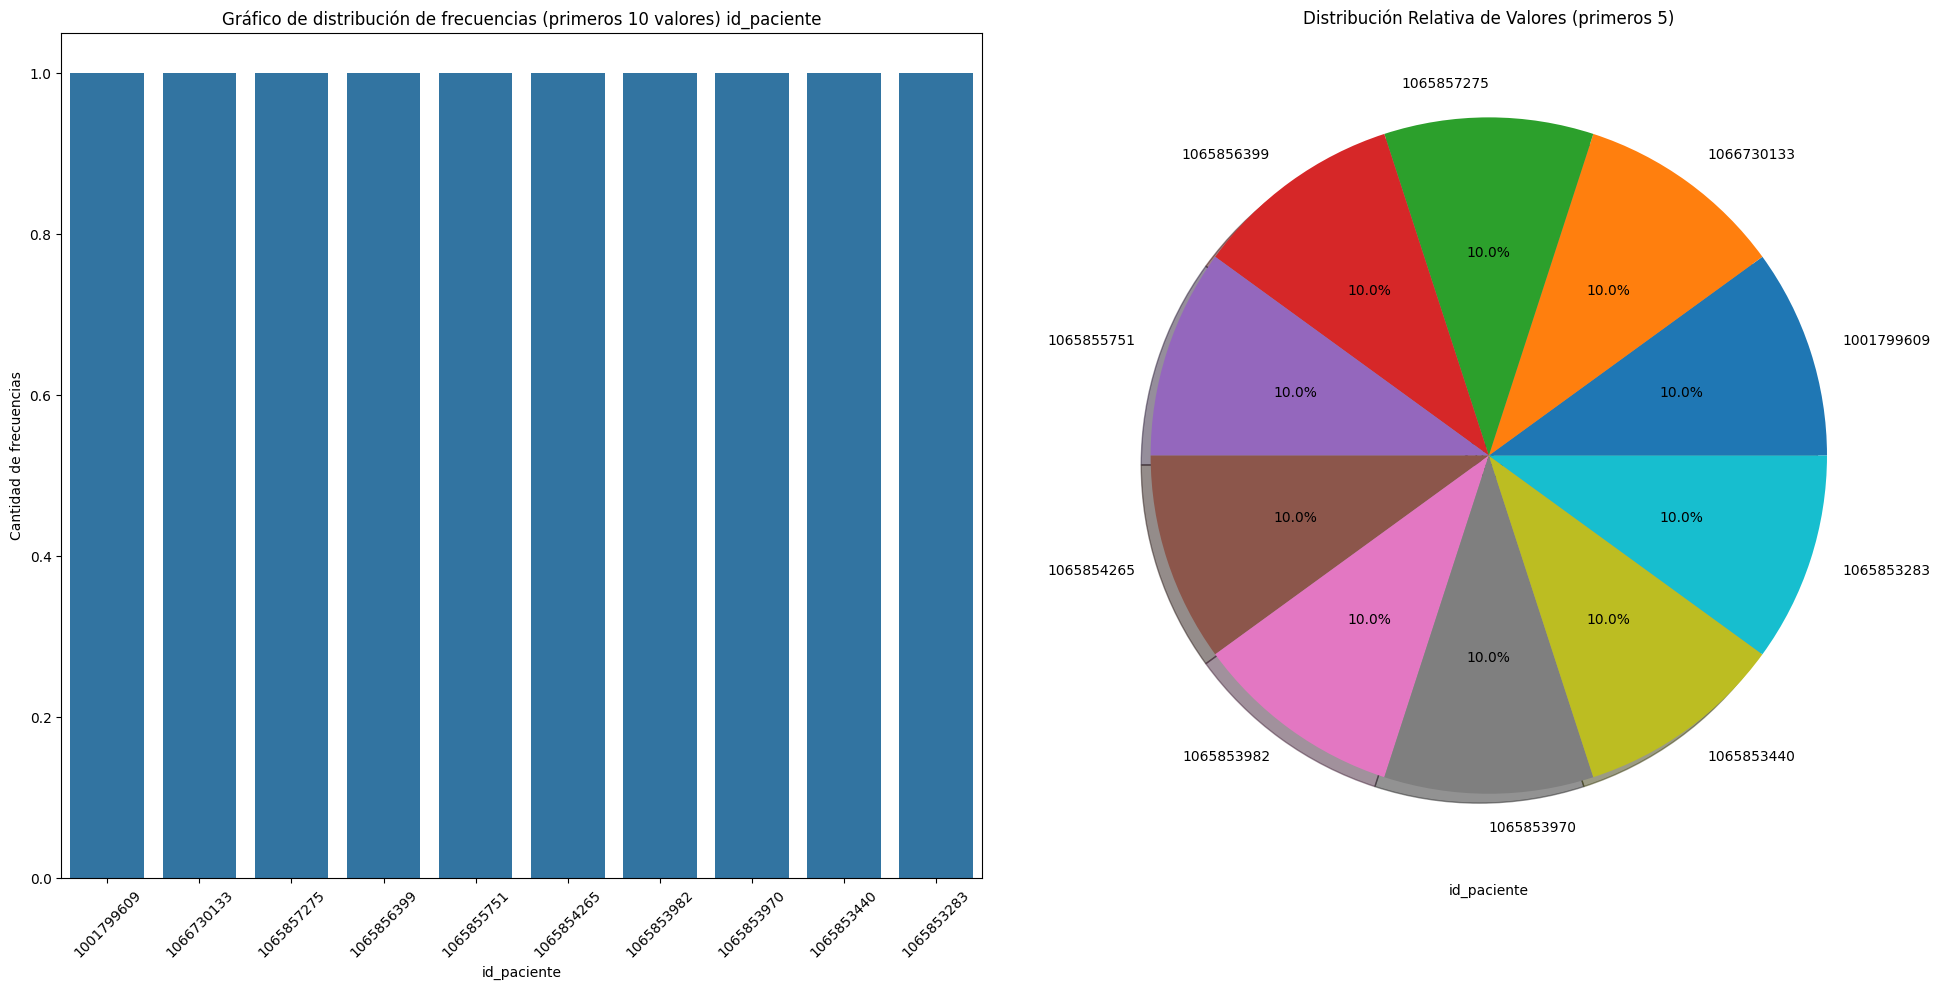



Estadísticas Básicas


count         426874
unique        426874
top       1001799609
freq               1
Name: id_paciente, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




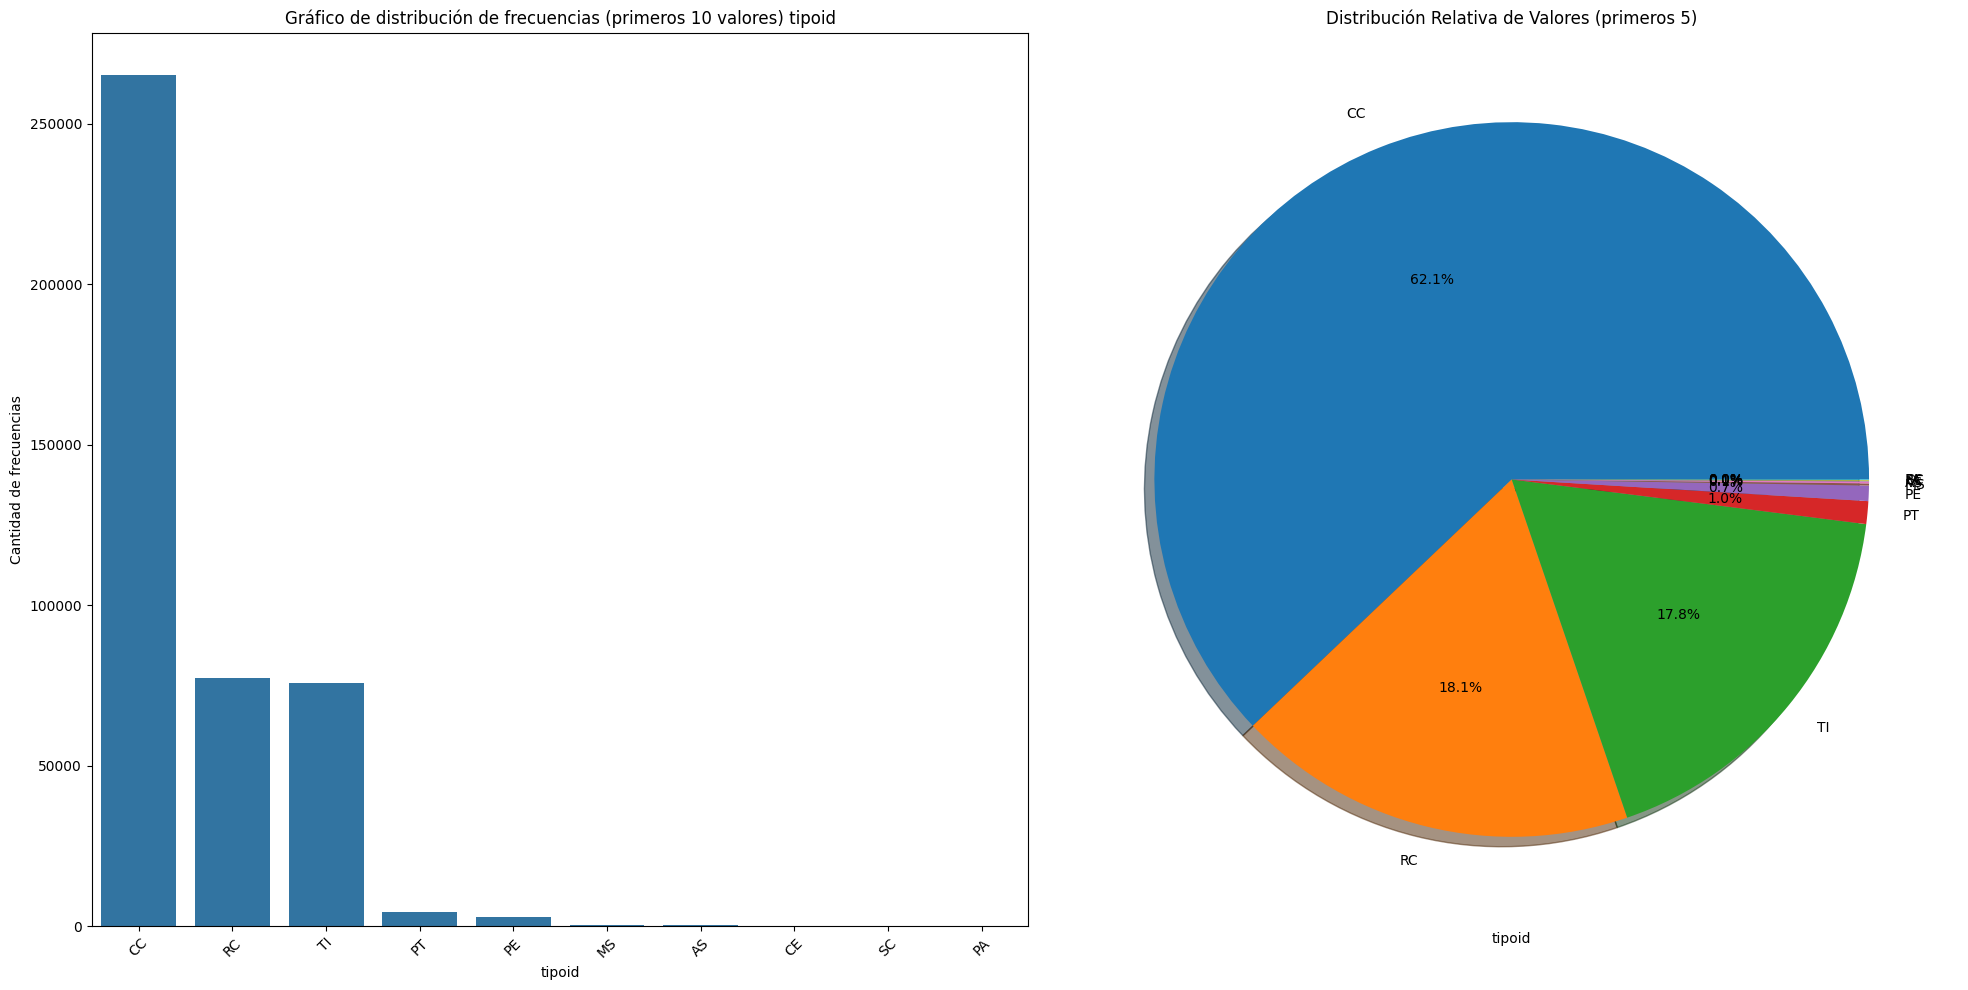



Estadísticas Básicas


count     426874
unique        14
top           CC
freq      265007
Name: tipoid, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




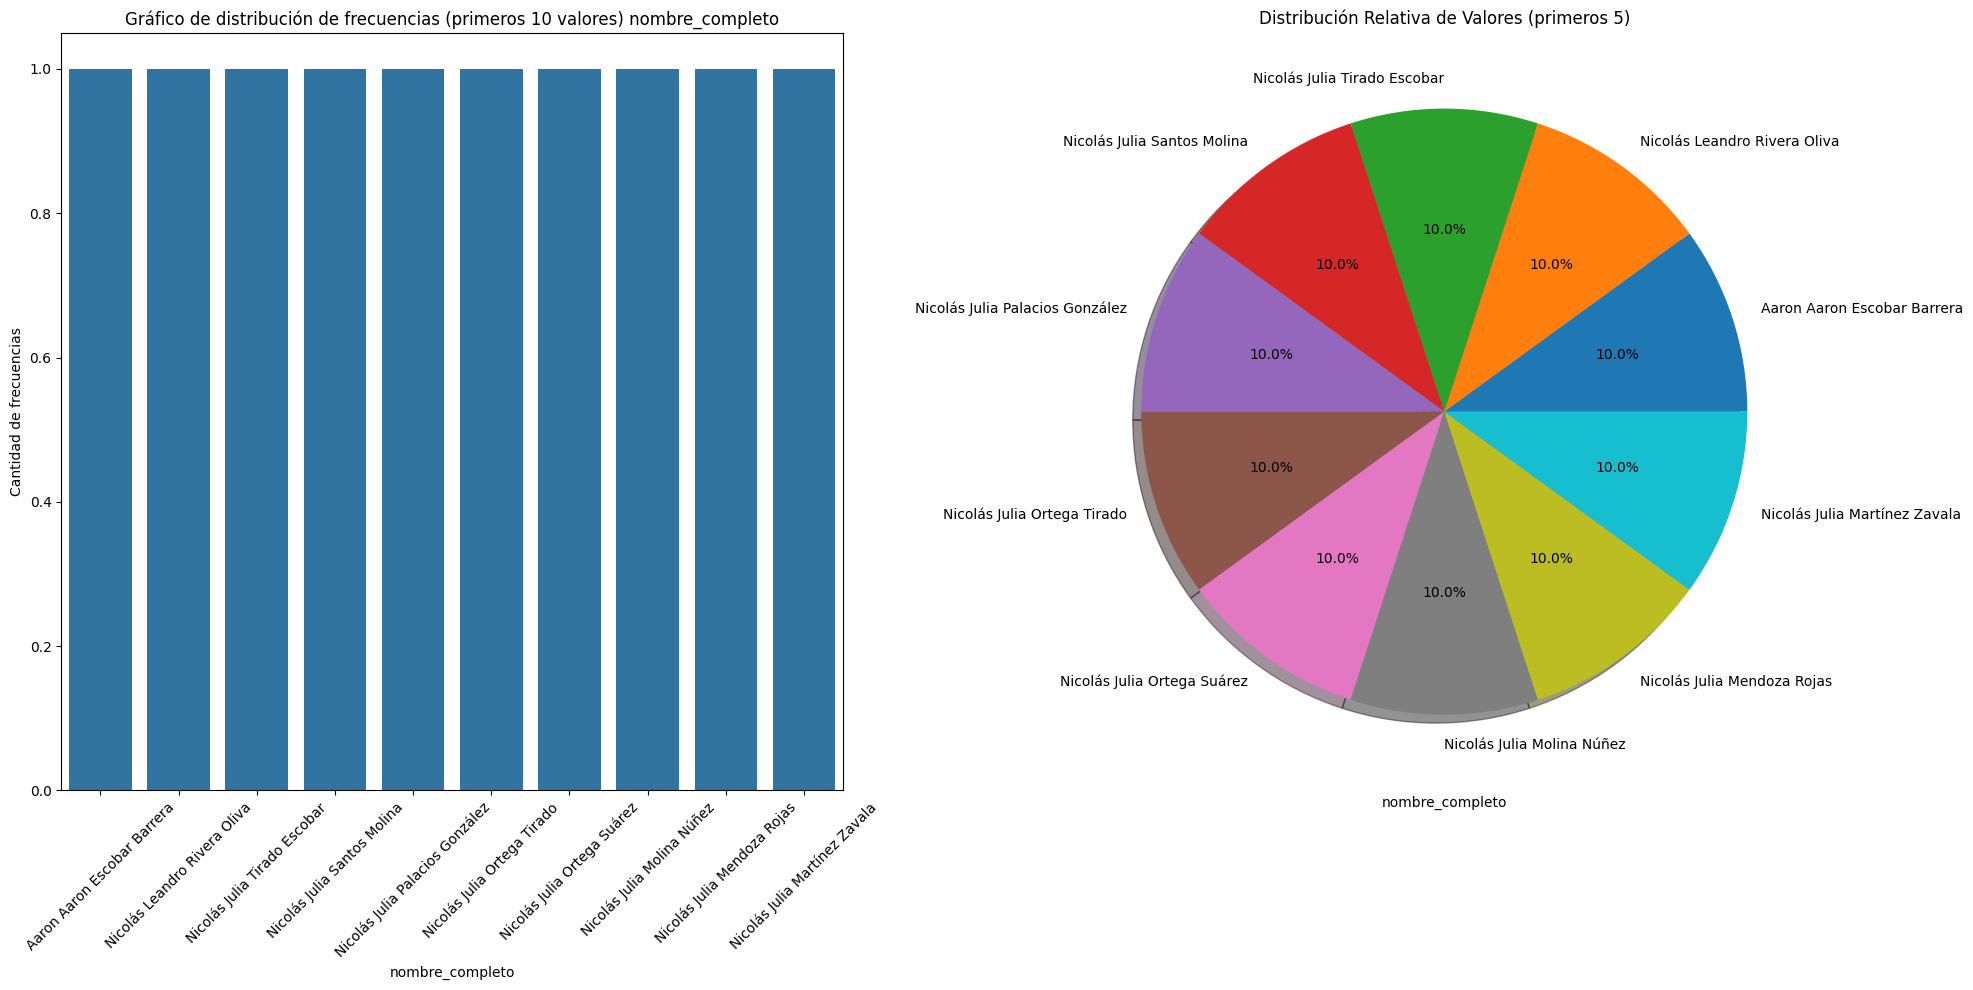



Estadísticas Básicas


count                          426874
unique                         426874
top       Aaron Aaron Escobar Barrera
freq                                1
Name: nombre_completo, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




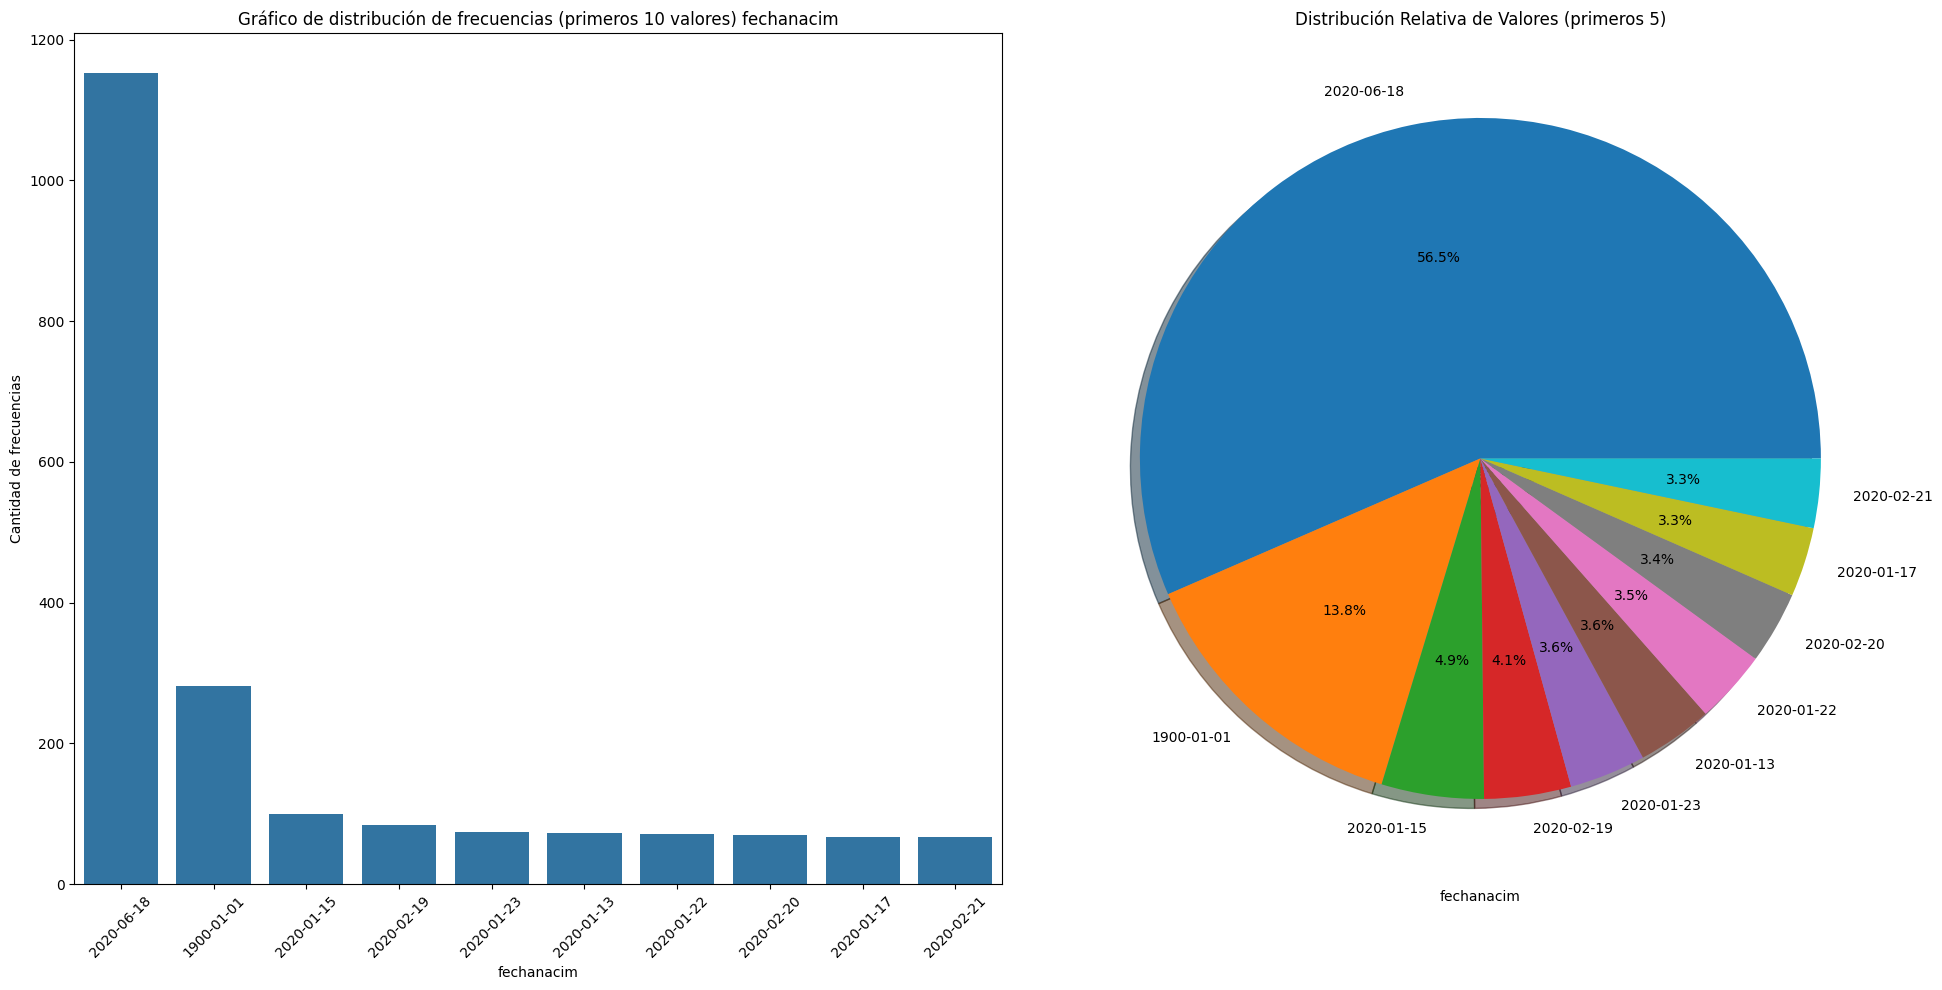



Estadísticas Básicas


count         426873
unique         34787
top       2020-06-18
freq            1152
Name: fechanacim, dtype: object
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




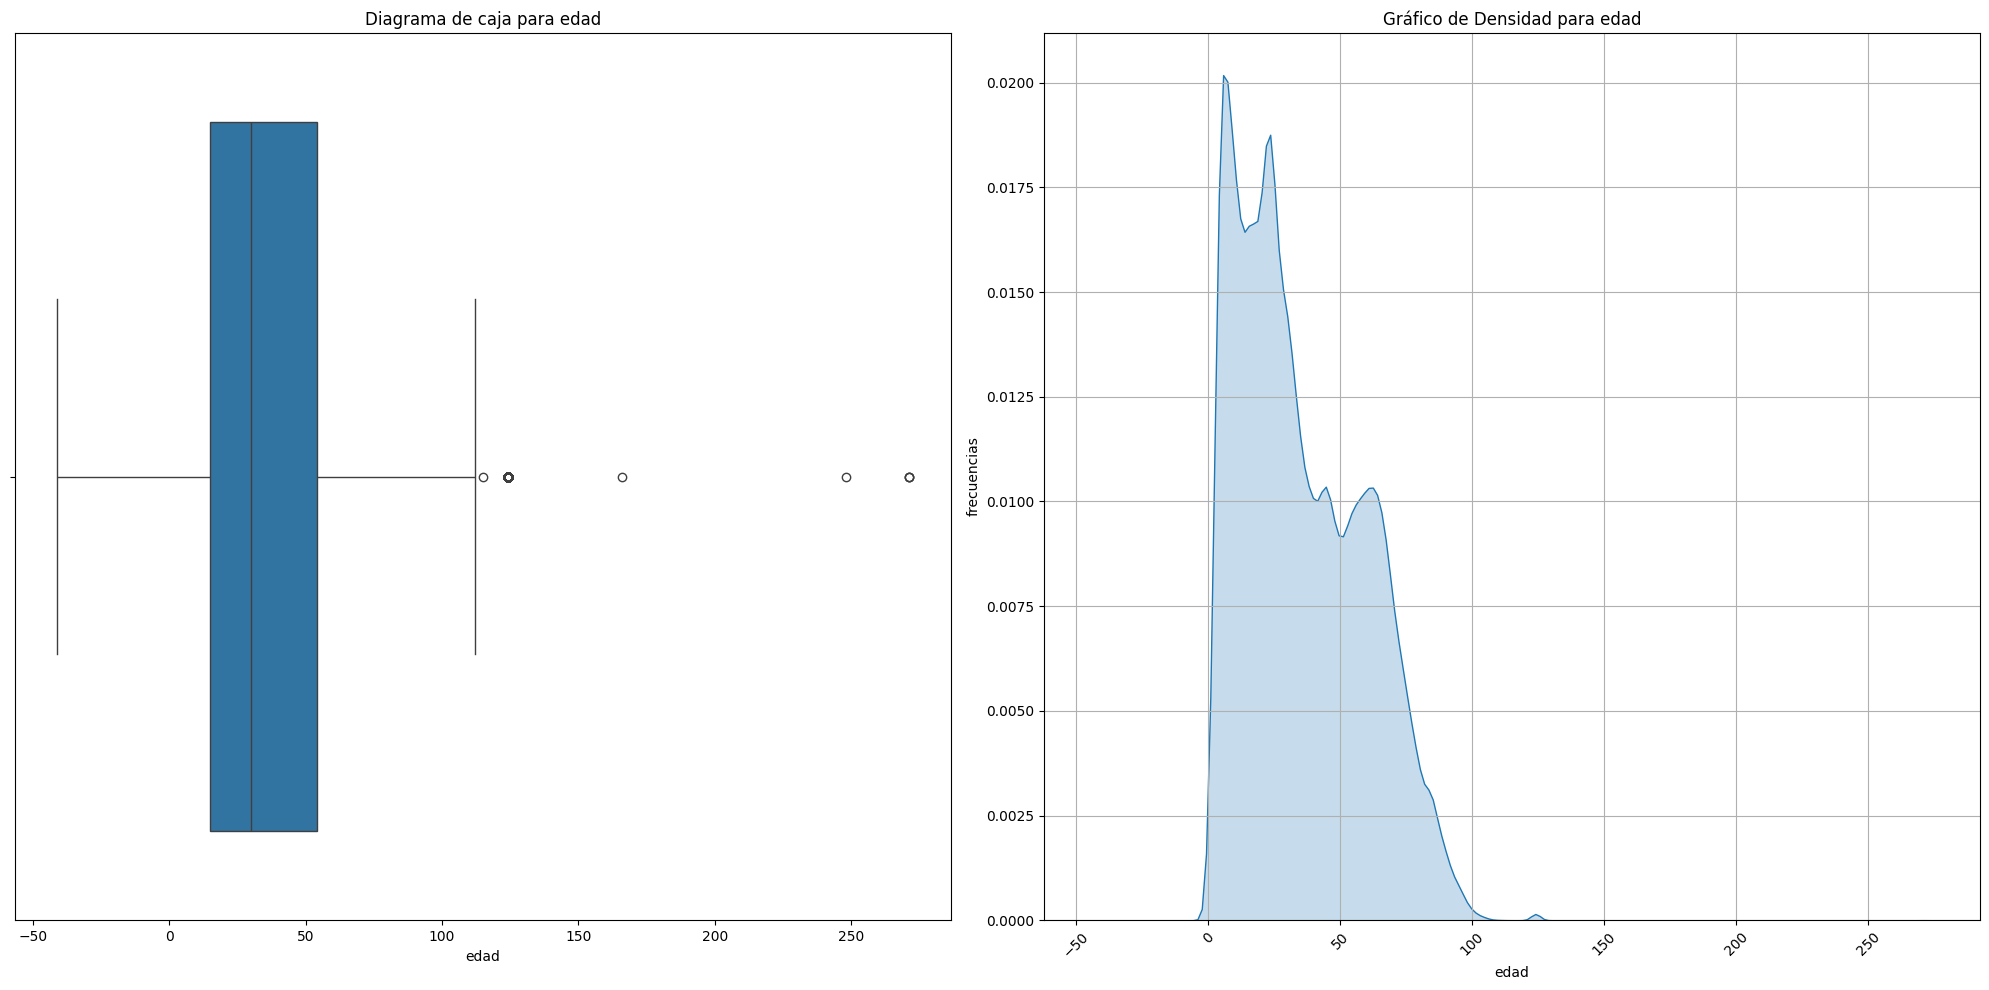



Estadísticas Básicas


count    426873.000000
mean         35.081408
std          23.503750
min         -41.000000
25%          15.000000
50%          30.000000
75%          54.000000
max         271.000000
Name: edad, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
r.descripcion_distribucion(df_usuarios)

## <h2 align= 'center'><strong>Análisis Diagnostico</strong></h2>

## <h2 align= 'center'><strong>Análisis Predictivo</strong></h2>

## <h2 align= 'center'><strong>Análisis Prescriptivo</strong></h2>

# Conclusiones